In [1]:
source("Main.R")
source("Conf.R")
source("Utilities.R")
source("DAVID_query.R")
library("factoextra")
library("maptree")
library("ggpubr")
library(NMF)
library("ica")
library(ICtest)

library(repr)
fileDir = "/home/beraslan/jovian-work/analysisSingle/"
geneCutOff=4
targetCutOff=15
nFactors=15

corrplot 0.84 loaded


********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************



Attaching package: ‘pls’


The following object is masked from ‘package:corrplot’:

    corrplot


The following object is masked from ‘package:stats’:

    loadings


Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following o

In [2]:
writePathwayFile <- function(pathwayGenes, fileName, cNames=F){
  maxlen <- max(lengths(pathwayGenes))
  pathwayGenes2 <- lapply(pathwayGenes, function(lst) c(lst, rep(NA, maxlen - length(lst))))

  pathwayGenes.df <- do.call("cbind", lapply(pathwayGenes2, as.data.frame)) 
  colnames(pathwayGenes.df) <- names(pathwayGenes)

  write.table(pathwayGenes.df,  fileName, sep=",", row.names = F, na = " ", quote = F, col.names = cNames)
}

# dcGenes <- read.csv("/home/beraslan/jovian-work/analysisSingle/PositiveControls/DC_genes.csv", row.names = 1, stringsAsFactors=FALSE)
                          
# k = dcGenes[1,"Genes"]
# length(strsplit(k, ",")[[1]])
                          
# dcList = list()
# for(i in 1:nrow(dcGenes)){
#     dcList <- lappend(dcList, strsplit(dcGenes[i,"Genes"],",")[[1]])
# }
# names(dcList) <- rownames(dcGenes)
                          
# writePathwayFile(pathwayGenes=dcList, fileName="/home/beraslan/jovian-work/analysisSingle/PositiveControls/DC_cellstate_genes.csv", cNames=names(dcList))                          

In [3]:
selCoefs <- read.csv("/home/beraslan/jovian-work/analysisSingle/SignificantCoefMatrix.csv", row.names = 1)
selCoefs <- t(selCoefs)
KOGenes <-  colnames(selCoefs)
KOGenes <- sapply(KOGenes, function(x){strsplit(x,"_")[[1]][2]})
colnames(selCoefs) <- KOGenes

In [4]:
dim(selCoefs)

[1] 1041  329

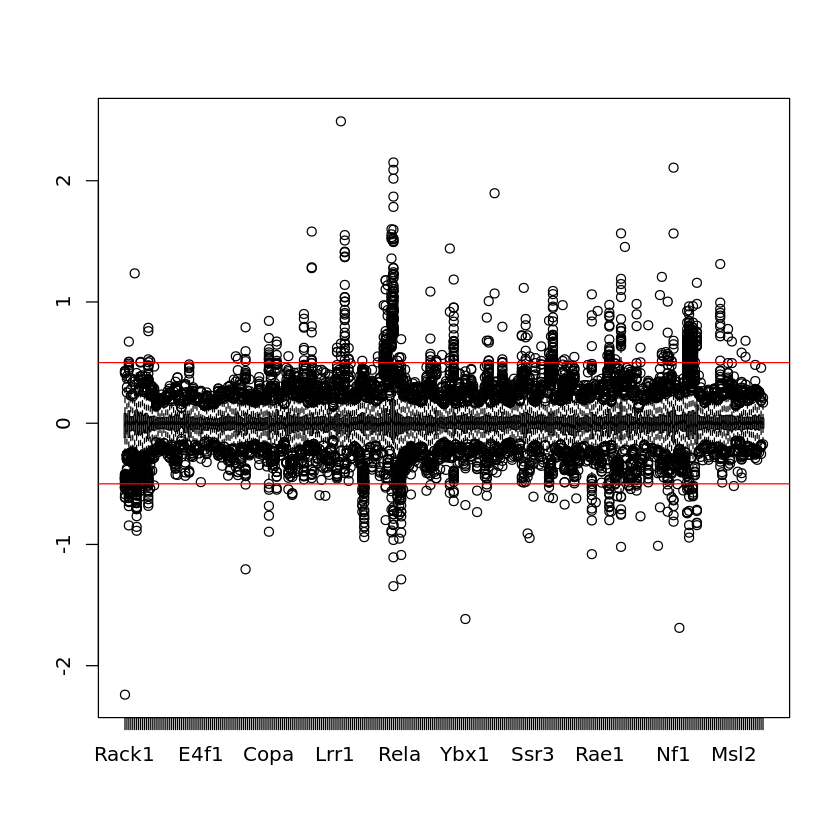

In [5]:
boxplot(selCoefs)
abline(h=0.5, col="red")
abline(h= -0.5, col="red")

In [6]:
#guideModulesN <- data.frame(read.csv("/home/beraslan/jovian-work/analysisSingle/ME_GuideModules_7_Modules.csv", row.names = 1))
#guideModulesN$GuideName <- sapply(guideModulesN$GuideName, function(x){strsplit(as.character(x),"_")[[1]][2]})

guideModulesN <- data.frame(read.csv("/home/beraslan/jovian-work/analysisSingle/ME_GuideModules_leiden_6_Modules.csv"),  row.names = 1)
rownames(guideModulesN) <- guideModulesN$GuideName 
guideModulesN$GuideName <- NULL
guideModulesN$GuideGroup <- factor(guideModulesN$GuideGroup)

head(guideModulesN)

GuideGroup GuideColor
Aamp   4          #aa40fc   
Bop1   4          #aa40fc   
Cirh1a 4          #aa40fc   
Dcaf13 4          #aa40fc   
Grb2   4          #aa40fc   
Myc    4          #aa40fc

In [7]:
#geneModulesN <- data.frame(read.csv("/home/beraslan/jovian-work/analysisSingle/ME_GeneModules_6_Modules.csv", row.names = 1))
geneModulesN <- data.frame(read.csv("/home/beraslan/jovian-work/analysisSingle/ME_GeneModules_leiden_8_Modules.csv"), row.names = 1)
rownames(geneModulesN) <- geneModulesN$GeneName
geneModulesN$GeneName <- NULL
geneModulesN$GeneGroup <- factor(geneModulesN$GeneGroup)

head(geneModulesN)

GeneGroup GeneColor
AI314180 3         #E7298A  
Abcc1    3         #E7298A  
Acod1    3         #E7298A  
Akr1a1   3         #E7298A  
Alas1    3         #E7298A  
Alox5ap  3         #E7298A

In [8]:
head(selCoefs)

Rack1  Utp15  Wdr43  Raf1   Rrp9   Uhrf1  Myc    Wdr3   Aamp   Dcaf13 ⋯
Eef1a1 -0.052 -0.147 -0.238 -0.125 -0.135  0.063 -0.397  0.028 -0.052 -0.101 ⋯
Tpt1   -0.255 -0.096 -0.261 -0.026 -0.079 -0.218 -0.158 -0.159 -0.323 -0.190 ⋯
Rps27  -0.289 -0.235 -0.094 -0.097 -0.104 -0.116 -0.167 -0.087 -0.081 -0.159 ⋯
Rplp0  -0.328 -0.076 -0.110 -0.130 -0.008 -0.134 -0.586 -0.017 -0.031 -0.064 ⋯
Denr   -0.140 -0.042 -0.027 -0.047 -0.070 -0.208 -0.079 -0.098  0.140 -0.104 ⋯
Hmgb2  -0.078  0.024 -0.019 -0.001 -0.032 -0.083 -0.089  0.054  0.011 -0.039 ⋯
       Acaca Trim45 Rnf135 Dcaf10 Traf7 Zmiz2  Klhl30 Wdr91 Efcab8 Wdr81
Eef1a1 0.158 -0.042  0.004  0.038 0.025 -0.066 -0.016 0.061 -0.033 0.085
Tpt1   0.104  0.112  0.068  0.024 0.099  0.095  0.119 0.104  0.119 0.050
Rps27  0.075  0.087  0.070 -0.003 0.061  0.024  0.060 0.028  0.077 0.035
Rplp0  0.113  0.017 -0.018  0.145 0.103  0.105  0.017 0.015  0.082 0.047
Denr   0.086  0.103 -0.057 -0.118 0.049  0.149  0.198 0.042  0.070 0.017
Hmgb2  0.029 -0.011  0.013 -0.003 0.018  0.045  0.183 0.007  0.124 0.020

In [9]:
# k <- prcomp(selCoefs, rank. = 100)
# summary(k)

In [10]:
dim(selCoefs)

[1] 1041  329

In [11]:
#FOBIasymp(X = as.matrix(selCoefs), k = 4, model = "ICA", type = "S1")


In [12]:
#res0 <- NGPPsim(selCoefs, k = 20, N = 400)


In [13]:
#FOBIboot(selCoefs, k = 10, s.boot = "B1")

In [11]:
k <- icaimax(selCoefs, nc = 15, center = T)

In [12]:
dim(k$S)

[1] 1041   15

In [13]:
dim(k$M)

[1] 329  15

In [14]:
myH <- t(k$S)
myW <- k$M

In [15]:
dim(myH)

[1]   15 1041

In [16]:
dim(myW)

[1] 329  15

In [17]:
rownames(myH) <- 1:nrow(myH)
colnames(myW) <- 1:ncol(myW)


In [18]:
rownames(myW) <- KOGenes
colnames(myH) <- rownames(selCoefs)

In [19]:
head(myW)

1           2            3            4          5            
Rack1 -0.11425104 -0.002495527 -0.017995214 0.03908922 -0.0063104024
Utp15 -0.06254236 -0.008198569 -0.000107824 0.02520034  0.0001340951
Wdr43 -0.11792290 -0.017700007 -0.020263470 0.04625220  0.0105318970
Raf1  -0.04757783 -0.010057413  0.011437100 0.01697823 -0.0006109214
Rrp9  -0.04362583 -0.009883180 -0.005219740 0.01419997 -0.0025919491
Uhrf1 -0.06229805 -0.005861565  0.009586501 0.00455408  0.0056814875
      6             7           8           9             10         
Rack1 -0.0008215928 -0.06461337 0.035158939 -0.0119796606 0.005899726
Utp15 -0.0089160969 -0.02303970 0.036267664 -0.0044266647 0.006746389
Wdr43 -0.0048682855 -0.03565721 0.070486378 -0.0033235179 0.021316408
Raf1   0.0104685925 -0.02628383 0.017740418  0.0093873077 0.008921589
Rrp9   0.0089806369 -0.01725733 0.026208052 -0.0002979331 0.008715793
Uhrf1  0.0120015843 -0.03099238 0.006187791 -0.0073501124 0.012097394
      11           12           13          14           15          
Rack1 -0.007927171 -0.040151048 -0.03137743 -0.003171587  0.018579446
Utp15 -0.004649197 -0.021295972 -0.01871927 -0.001776063  0.002111360
Wdr43  0.004518461 -0.010893773 -0.02645732  0.001879468 -0.016909227
Raf1  -0.007288546 -0.028734956 -0.02003138 -0.001335916  0.009107825
Rrp9  -0.001316550 -0.008543533 -0.02901888  0.006176182  0.001421949
Uhrf1 -0.009010211 -0.025557494  0.00557510 -0.005697481  0.010626155

In [20]:
head(myH)

Eef1a1     Tpt1       Rps27      Rplp0      Denr        Hmgb2      
1  3.2076303  3.4941689  2.3147870  2.3548663  0.13145289  0.15163832
2  1.3438743  0.9892448  0.3363645  0.4475879  0.93870851  0.40335173
3  0.1653060 -1.4858057 -0.3363701 -0.6097158 -0.79478578 -1.46223340
4 -0.5062820  0.9475707  0.5633123  0.3716254  0.08716493  0.24766068
5 -0.4093474  0.4116365  0.4034873  0.7055475 -0.91757088 -0.10449570
6 -0.6163282  0.4989975  0.4470048  0.2002831  0.16918332 -0.08194704
  Eif3f      Eif3e       Eif3k     Eif1        ⋯ Tle3       Btg1      
1  1.1575341  0.84926134 0.9660467  0.85877113 ⋯ -0.2548985 -0.6364086
2  0.1836661  0.50959873 0.6745979  0.97788802 ⋯  0.4976138  2.5599561
3 -0.5657665 -1.03771422 0.1019503  0.83473829 ⋯  0.1839294 -0.3542594
4  0.2598739  0.29173562 0.7647395 -0.36979943 ⋯  0.1259374  0.8771774
5  0.1324261  0.36236222 0.4668080 -0.49105931 ⋯ -0.3997473 -0.1918703
6  1.2524505 -0.03322989 0.1093392 -0.01013459 ⋯  0.4691525  3.1905825
  Marcks     Ddhd1      H2.K1      H2.D1      Ifi211      Clec2d     
1 -0.4804725 -0.3944194 -1.5019089 -1.1793376 -0.07541893 -0.24537327
2  0.9543989  1.0120543  1.2020082  0.8561780  0.39782440  0.96782991
3  1.6552705  3.0739363  0.3721248  0.7701792  0.09200781 -0.11914652
4  0.9288648  3.1236619  2.7359233  2.4313035  1.05546445  0.08543904
5 -2.4885823 -0.2108157  1.2470014  1.7550616 -1.05611866  0.31230022
6  1.5461413 -0.2767513  0.8510050  0.7248766 -0.30691338  0.25386234
  Cdkn1a     Cd274     
1 -0.8714658 -0.3123086
2  0.3482773  1.0044161
3 -0.9074467  0.5754254
4  2.7635650  2.1743303
5  2.0267301  1.0349607
6  1.1890351  0.6546635

In [21]:
head(selCoefs)

Rack1  Utp15  Wdr43  Raf1   Rrp9   Uhrf1  Myc    Wdr3   Aamp   Dcaf13 ⋯
Eef1a1 -0.052 -0.147 -0.238 -0.125 -0.135  0.063 -0.397  0.028 -0.052 -0.101 ⋯
Tpt1   -0.255 -0.096 -0.261 -0.026 -0.079 -0.218 -0.158 -0.159 -0.323 -0.190 ⋯
Rps27  -0.289 -0.235 -0.094 -0.097 -0.104 -0.116 -0.167 -0.087 -0.081 -0.159 ⋯
Rplp0  -0.328 -0.076 -0.110 -0.130 -0.008 -0.134 -0.586 -0.017 -0.031 -0.064 ⋯
Denr   -0.140 -0.042 -0.027 -0.047 -0.070 -0.208 -0.079 -0.098  0.140 -0.104 ⋯
Hmgb2  -0.078  0.024 -0.019 -0.001 -0.032 -0.083 -0.089  0.054  0.011 -0.039 ⋯
       Acaca Trim45 Rnf135 Dcaf10 Traf7 Zmiz2  Klhl30 Wdr91 Efcab8 Wdr81
Eef1a1 0.158 -0.042  0.004  0.038 0.025 -0.066 -0.016 0.061 -0.033 0.085
Tpt1   0.104  0.112  0.068  0.024 0.099  0.095  0.119 0.104  0.119 0.050
Rps27  0.075  0.087  0.070 -0.003 0.061  0.024  0.060 0.028  0.077 0.035
Rplp0  0.113  0.017 -0.018  0.145 0.103  0.105  0.017 0.015  0.082 0.047
Denr   0.086  0.103 -0.057 -0.118 0.049  0.149  0.198 0.042  0.070 0.017
Hmgb2  0.029 -0.011  0.013 -0.003 0.018  0.045  0.183 0.007  0.124 0.020

In [22]:
M_targets = cor(t(myH), method = "pearson")
M_genes = cor((myW), method = "pearson")

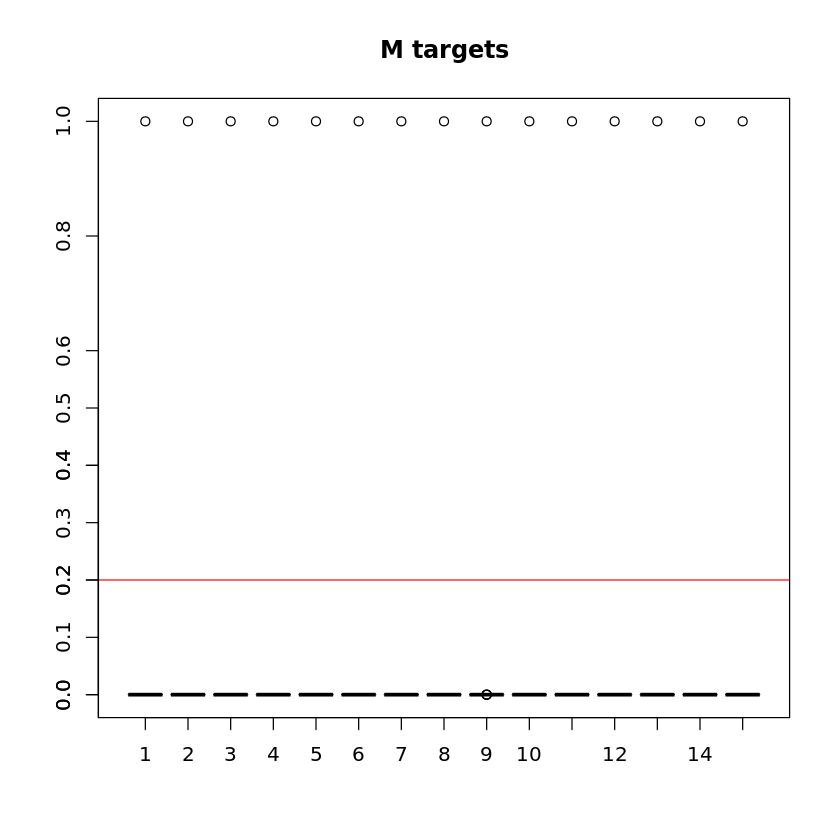

In [23]:
boxplot(M_targets, main="M targets")
abline(h=0.2, col="red")
abline(h= -0.2, col="red")
axis(2, at = seq(-0.5,0.5,0.1))


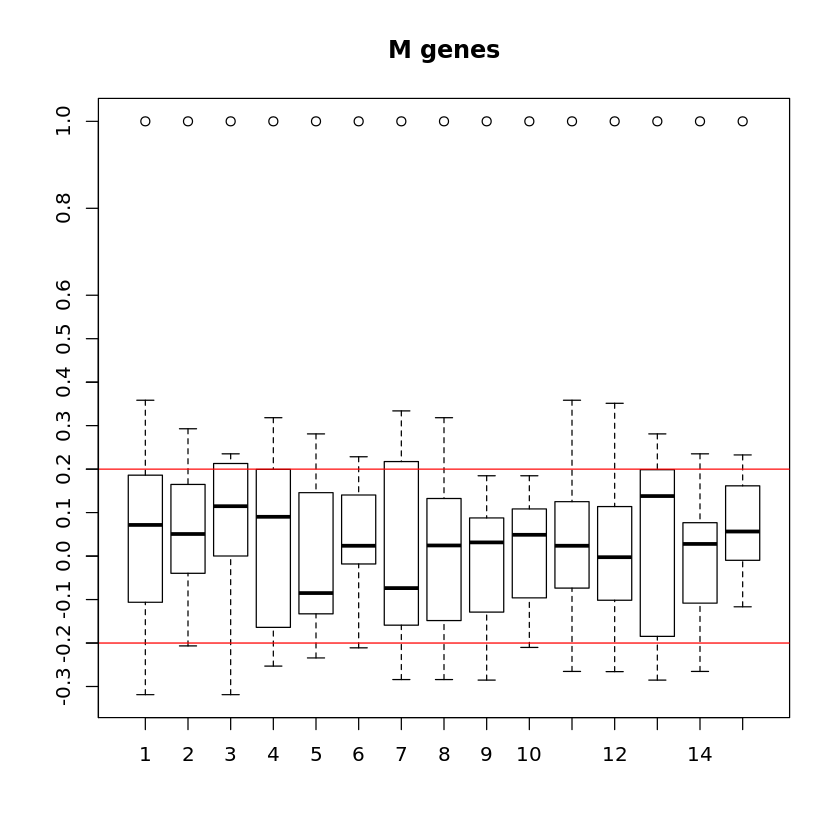

In [24]:
boxplot(M_genes, main="M genes")
abline(h=0.2, col="red")
abline(h= -0.2, col="red")
axis(2, at = seq(-0.5,0.5,0.1))

In [25]:
M_targets[M_targets > 0.2] = 0.2
M_targets[M_targets < -0.2] = -0.2

M_genes[M_genes > 0.3] = 0.3
M_genes[M_genes < -0.3] = -0.3

In [27]:
# diag(M_targets) <- NA
# diag(M_genes) <- NA

In [28]:
#fviz_nbclust(M_targets, kmeans, method = "wss", k.max = 19)+ggtitle("Optimal number of clusters in of factor covariance based on target loadings")


In [29]:
#fviz_nbclust(M_genes, kmeans, method = "wss", k.max = 19)+ggtitle("Optimal number of clusters in of factor covariance based on gene loadings")


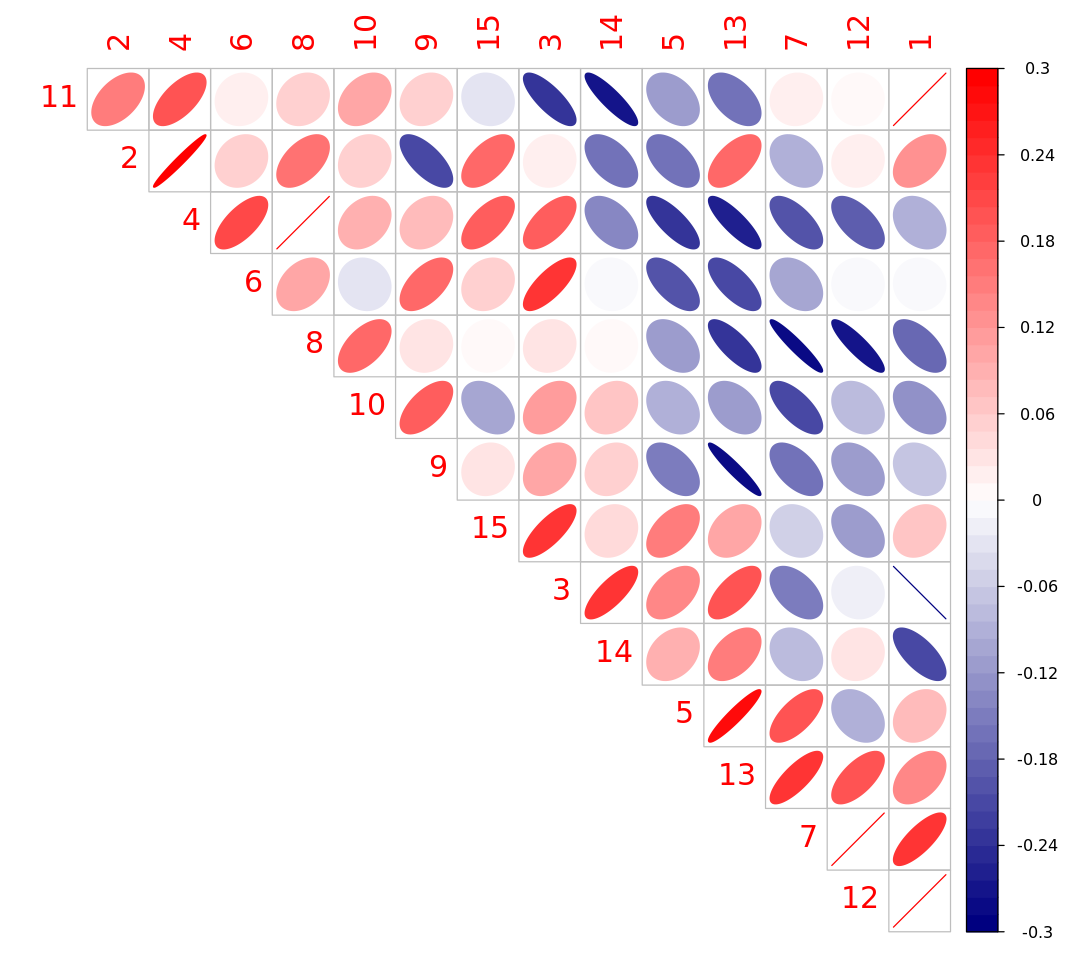

In [26]:
options(repr.plot.width=9, repr.plot.height=8)

col3 = colorRampPalette(c("navy", "white", "red"))(50)
corrplot::corrplot(M_genes, order = 'AOE', cl.lim=c(-0.3,0.3), col=col3, method = 'ellipse', is.corr = FALSE, tl.cex = 1.5, diag = FALSE, type = 'upper')

In [31]:
# options(repr.plot.width=10, repr.plot.height=6)

# ctree=9
# plot(hmTarget$tree_row)
# abline(h=ctree, col="red", lty=2, lwd=2)


ERROR: Error in plot(hmTarget$tree_row): object 'hmTarget' not found


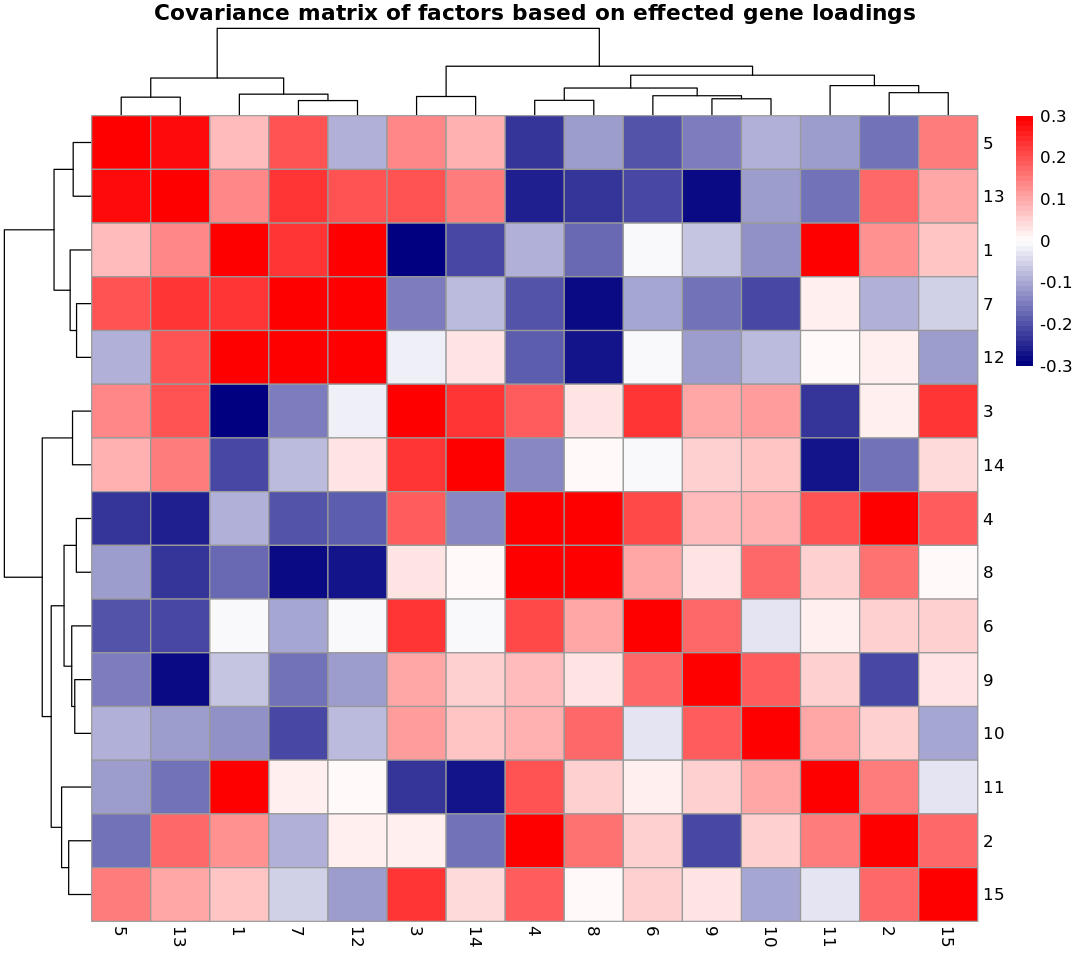

In [27]:
options(repr.plot.width=9, repr.plot.height=8)

hmGene <- pheatmap(M_genes, clustering_method="ward.D2", show_colnames = TRUE, show_rownames = TRUE, 
                clustering_distance_rows="euclidean", clustering_distance_cols="euclidean",
                   main="Covariance matrix of factors based on effected gene loadings", colorRampPalette(c("navy", "white", "red"))(50))


In [28]:
hmGene$tree_col$order


[1]  5 13  1  7 12  3 14  4  8  6  9 10 11  2 15

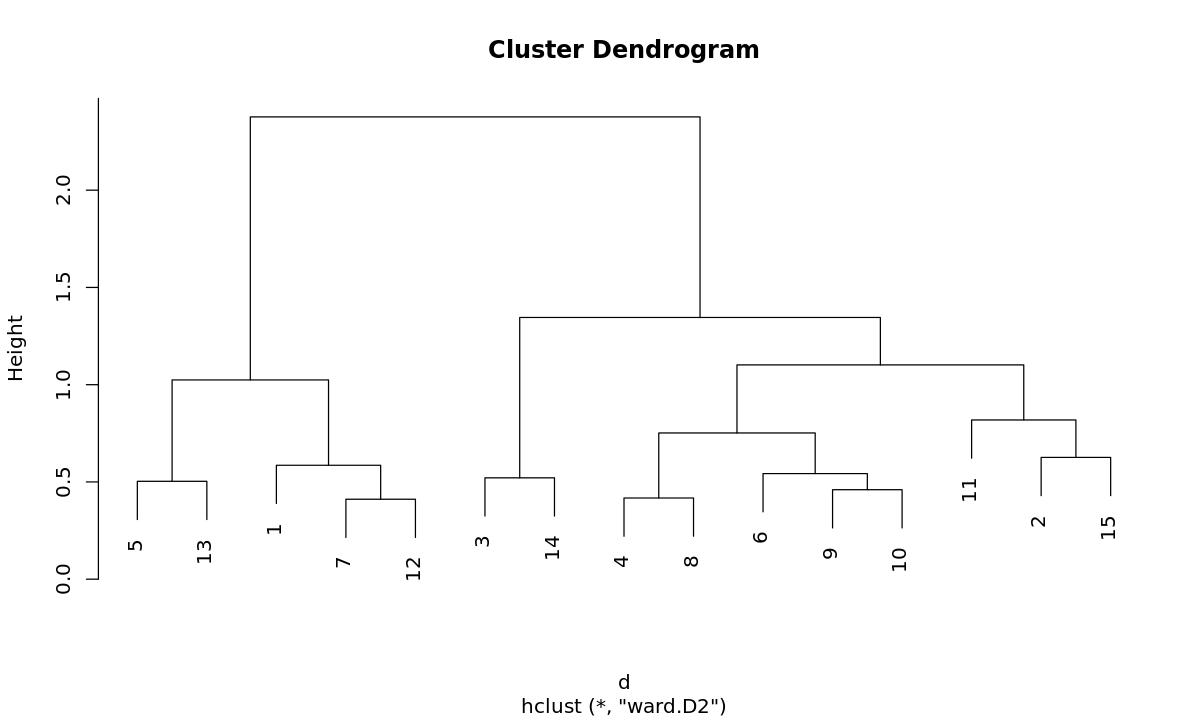

In [29]:
options(repr.plot.width=10, repr.plot.height=6)
plot(hmGene$tree_row)


Importance of components:
                           PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     0.05345 0.05345 0.05345 0.05345 0.05345 0.05345 0.05345
Proportion of Variance 0.07143 0.07143 0.07143 0.07143 0.07143 0.07143 0.07143
Cumulative Proportion  0.07143 0.14286 0.21429 0.28571 0.35714 0.42857 0.50000
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.05345 0.05345 0.05345 0.05345 0.05345 0.05345 0.05345
Proportion of Variance 0.07143 0.07143 0.07143 0.07143 0.07143 0.07143 0.07143
Cumulative Proportion  0.57143 0.64286 0.71429 0.78571 0.85714 0.92857 1.00000
                            PC15
Standard deviation     4.788e-19
Proportion of Variance 0.000e+00
Cumulative Proportion  1.000e+00

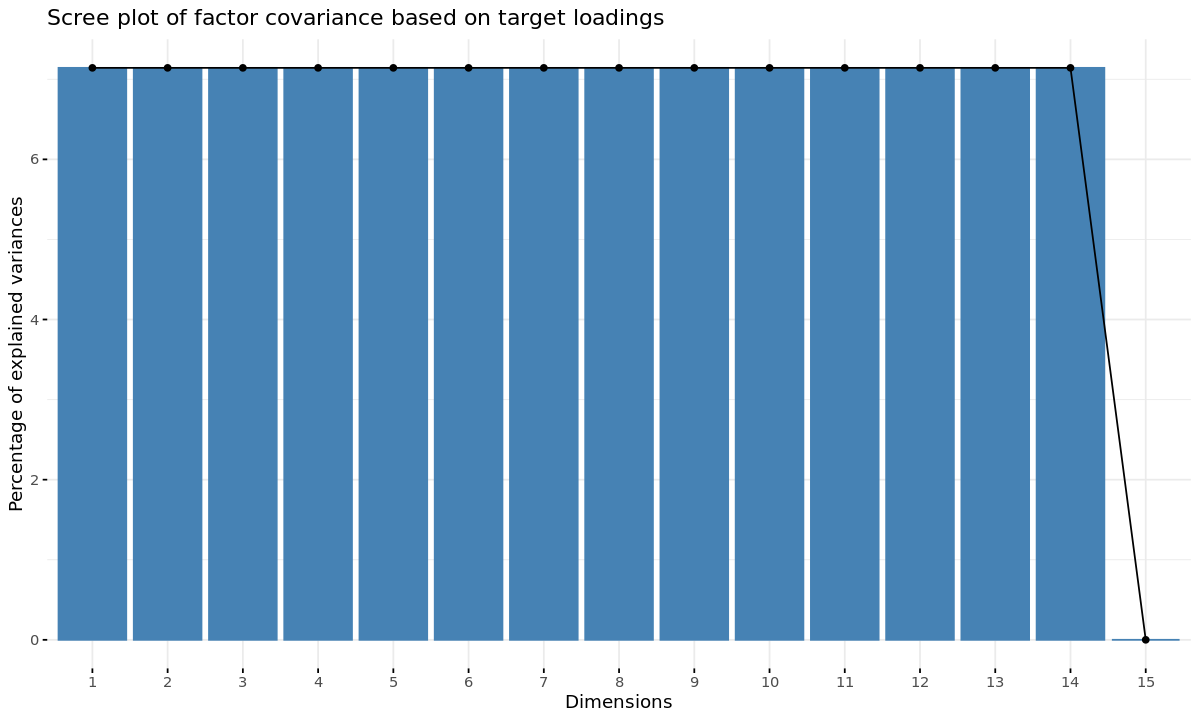

In [30]:
res.pca <- prcomp(M_targets, scale = FALSE)
summary(res.pca)
fviz_eig(res.pca, choice = 'variance', ncp = 19)+ggtitle("Scree plot of factor covariance based on target loadings")



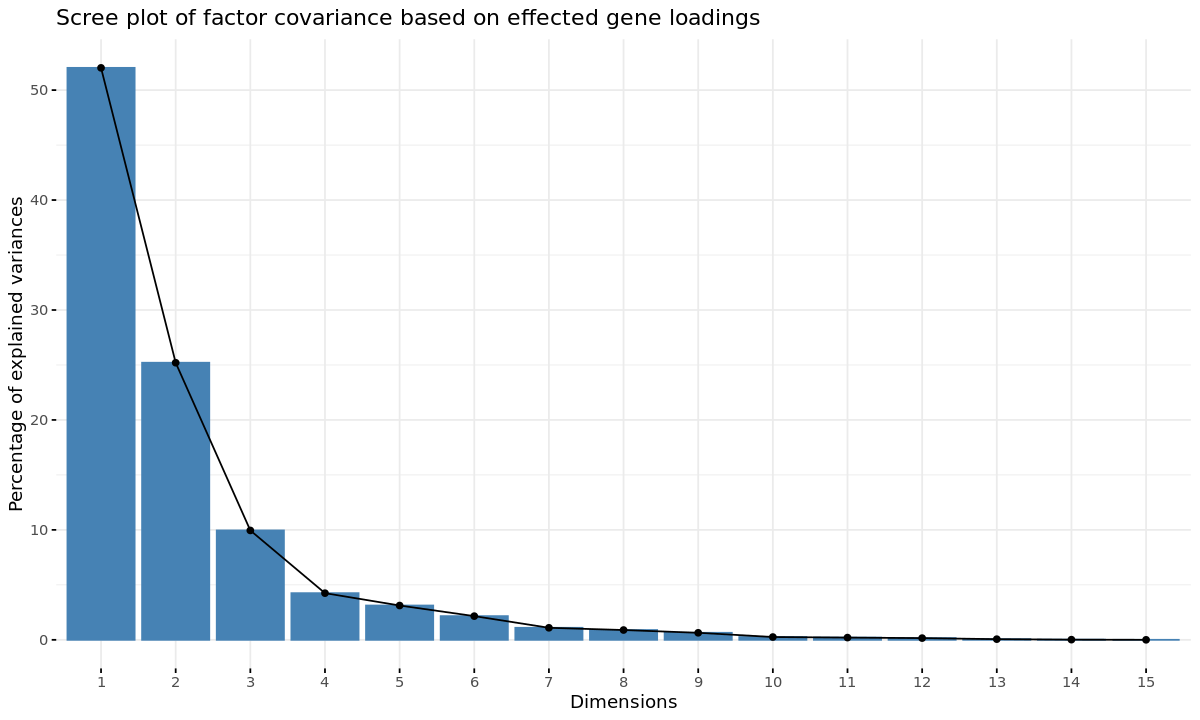

In [31]:
res.pca <- prcomp(M_genes, scale = FALSE)
fviz_eig(res.pca, ncp = 19)+ ggtitle("Scree plot of factor covariance based on effected gene loadings")


In [32]:
head(selCoefs)

Rack1  Utp15  Wdr43  Raf1   Rrp9   Uhrf1  Myc    Wdr3   Aamp   Dcaf13 ⋯
Eef1a1 -0.052 -0.147 -0.238 -0.125 -0.135  0.063 -0.397  0.028 -0.052 -0.101 ⋯
Tpt1   -0.255 -0.096 -0.261 -0.026 -0.079 -0.218 -0.158 -0.159 -0.323 -0.190 ⋯
Rps27  -0.289 -0.235 -0.094 -0.097 -0.104 -0.116 -0.167 -0.087 -0.081 -0.159 ⋯
Rplp0  -0.328 -0.076 -0.110 -0.130 -0.008 -0.134 -0.586 -0.017 -0.031 -0.064 ⋯
Denr   -0.140 -0.042 -0.027 -0.047 -0.070 -0.208 -0.079 -0.098  0.140 -0.104 ⋯
Hmgb2  -0.078  0.024 -0.019 -0.001 -0.032 -0.083 -0.089  0.054  0.011 -0.039 ⋯
       Acaca Trim45 Rnf135 Dcaf10 Traf7 Zmiz2  Klhl30 Wdr91 Efcab8 Wdr81
Eef1a1 0.158 -0.042  0.004  0.038 0.025 -0.066 -0.016 0.061 -0.033 0.085
Tpt1   0.104  0.112  0.068  0.024 0.099  0.095  0.119 0.104  0.119 0.050
Rps27  0.075  0.087  0.070 -0.003 0.061  0.024  0.060 0.028  0.077 0.035
Rplp0  0.113  0.017 -0.018  0.145 0.103  0.105  0.017 0.015  0.082 0.047
Denr   0.086  0.103 -0.057 -0.118 0.049  0.149  0.198 0.042  0.070 0.017
Hmgb2  0.029 -0.011  0.013 -0.003 0.018  0.045  0.183 0.007  0.124 0.020

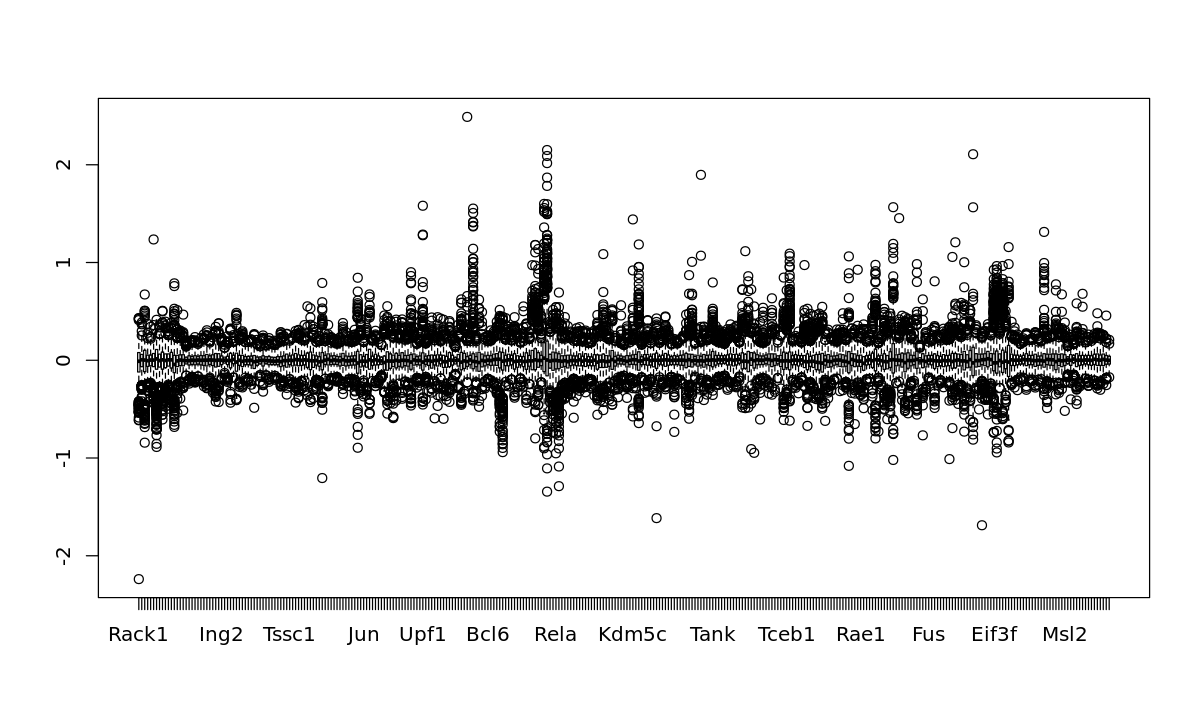

In [33]:
boxplot(selCoefs)

In [34]:
geneModulesN$GeneGroup <- paste0("GeneGroup_", geneModulesN$GeneGroup)

In [35]:
unique(geneModulesN)

GeneGroup   GeneColor
AI314180   GeneGroup_3 #E7298A  
Arf4       GeneGroup_6 #A6761D  
Ak4        GeneGroup_7 #666666  
Abracl     GeneGroup_2 #7570B3  
Cox7a2l    GeneGroup_4 #66A61E  
AC160336.1 GeneGroup_0 #1B9E77  
Aamp       GeneGroup_1 #D95F02  
AA467197   GeneGroup_5 #E6AB02

In [36]:
guideModulesN$GuideGroup <- paste0("KOGroup_", guideModulesN$GuideGroup)

In [37]:
unique(guideModulesN)

GuideGroup GuideColor
Aamp   KOGroup_4  #aa40fc   
Ago2   KOGroup_0  #1f77b4   
Akt1   KOGroup_1  #ff7f0e   
Cdc40  KOGroup_5  #8c564b   
Acaca  KOGroup_3  #d62728   
Ahctf1 KOGroup_2  #279e68

In [38]:
guideModulesN$GuideColor <- NULL
geneModulesN$GeneColor <- NULL

In [40]:
plotFactorHeatmap <- function(coefsAll, sKOGenes, sEffectGenes, elem){
  tempDF <- t(coefsAll[sEffectGenes, sKOGenes])
  #tmpPVals <- pValsAllAdj[sTargets, sGenes]
  #tempDF[tmpPVals > 0.1] <- 0
  tempDF[tempDF > 0.5] = 0.5
  tempDF[tempDF < -0.5] = -0.5
   
  annoCols<-list(GeneGroup=c(GeneGroup_0="#1B9E77", GeneGroup_1="#D95F02", GeneGroup_2="#7570B3", GeneGroup_3="#E7298A", 
                        GeneGroup_4="#66A61E", GeneGroup_5="#E6AB02", GeneGroup_6="#A6761D", GeneGroup_7="#666666"),
                 GuideGroup=c(KOGroup_0="#1f77b4", KOGroup_1="#ff7f0e", KOGroup_2="#279e68", KOGroup_3="#d62728", 
                        KOGroup_4="#aa40fc", KOGroup_5="#8c564b"))
    
    
  annotDFcol <- subset(geneModulesN, rownames(geneModulesN) %in% colnames(tempDF))
  annotDFrow <- subset(guideModulesN, rownames(guideModulesN) %in% rownames(tempDF))
    
  options(repr.plot.width=16, repr.plot.height=9)
  km2 <- pheatmap(tempDF, main = paste0("Factor ",elem),
           na_col = "grey",  
           annotation_col = annotDFcol,
                  annotation_row = annotDFrow,
            annotation_colors = annoCols,
           clustering_method="ward.D2",
           clustering_distance_rows="euclidean",
           clustering_distance_cols="euclidean", colorRampPalette(c("navy", "white", "red"))(50))
  
  geneOrder = colnames(tempDF)[km2$tree_col$order]
  koOrder = rownames(tempDF)[km2$tree_row$order]
    
  geneClusters=cutree(km2$tree_col, h=1)
  i=1
  while(length(unique(geneClusters)) > 2){
    i = (i+0.5)
    geneClusters <- cutree(km2$tree_col, h=i)
  }
  
    
  geneClusters_one <- names(geneClusters[geneClusters==1])
  geneClusters_two <- names(geneClusters[geneClusters==2])
    
    
  guideClusters=cutree(km2$tree_row, h=1)
  i=1
  while(length(unique(guideClusters)) > 2){
    i = (i+0.5)
    guideClusters <- cutree(km2$tree_row, h=i)
  }
  
  guideClusters_one <- names(guideClusters[guideClusters==1])
  guideClusters_two <- names(guideClusters[guideClusters==2])
    
  return(list("geneClusters_one"=geneClusters_one, "geneClusters_two"=geneClusters_two,
              "guideClusters_one"=guideClusters_one, "guideClusters_two"=guideClusters_two,
             "geneOrder" = geneOrder, "koOrder" = koOrder))
}


#ensemblBackground <- mapIds(org.Mm.eg.db, keys = colnames(coefsAll), keytype = "SYMBOL", column= "ENSEMBL")


In [41]:
getOutliers <- function(x){
  qX <- quantile(x)
  IQR = qX[4] - qX[2]
  minLev = qX[2] - IQR
  maxLev = qX[4] + IQR
  
  return(x[ x < minLev | x > maxLev])
}


In [42]:
getOutliers2 <- function(x){
  qX <- quantile(x)
  IQR = qX[4] - qX[2]
  minLev = qX[2] - 1.3*IQR
  maxLev = qX[4] + 1.3*IQR
  
  return(x[ x < minLev | x > maxLev])
}


[1] "############## FACTOR : 1 ##################"
[1] 31
[1] 119


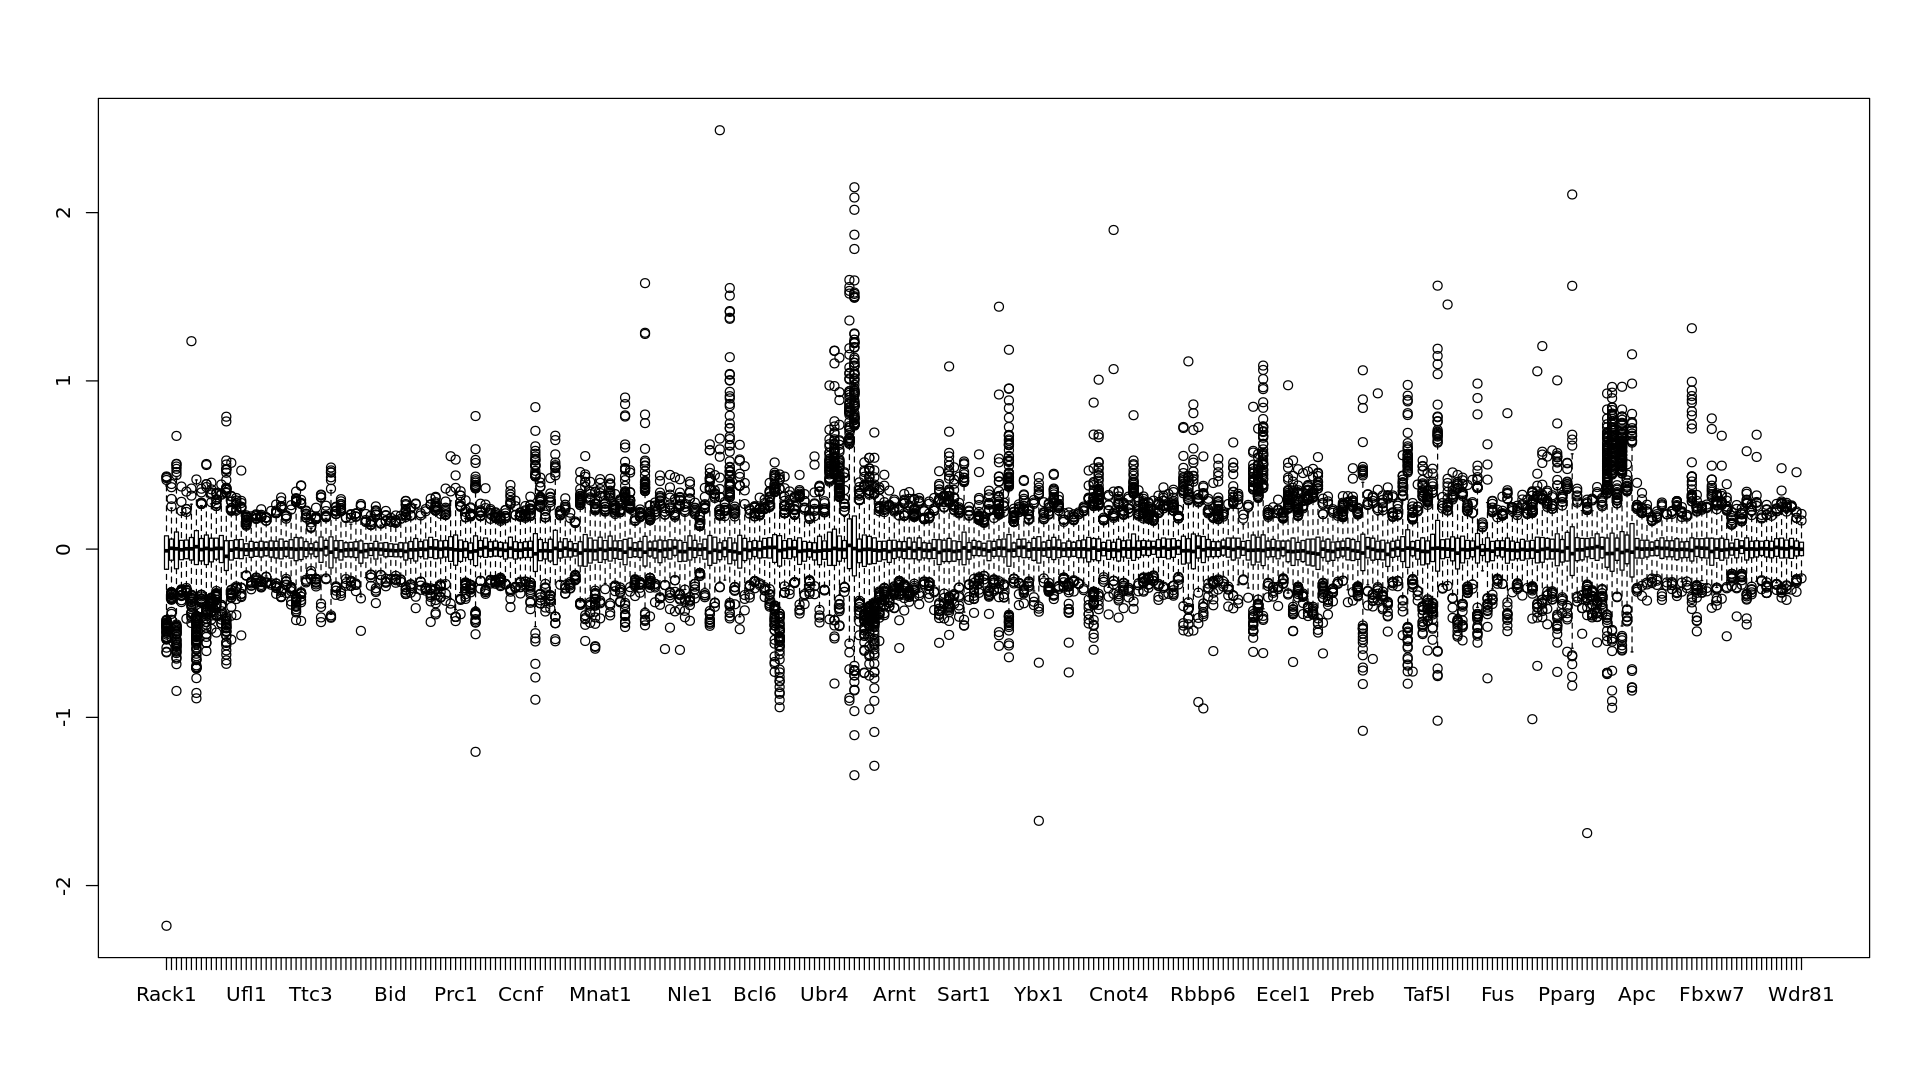

[1] "Genes in the pathway: "
[1] "############## FACTOR : 2 ##################"
[1] 40
[1] 84


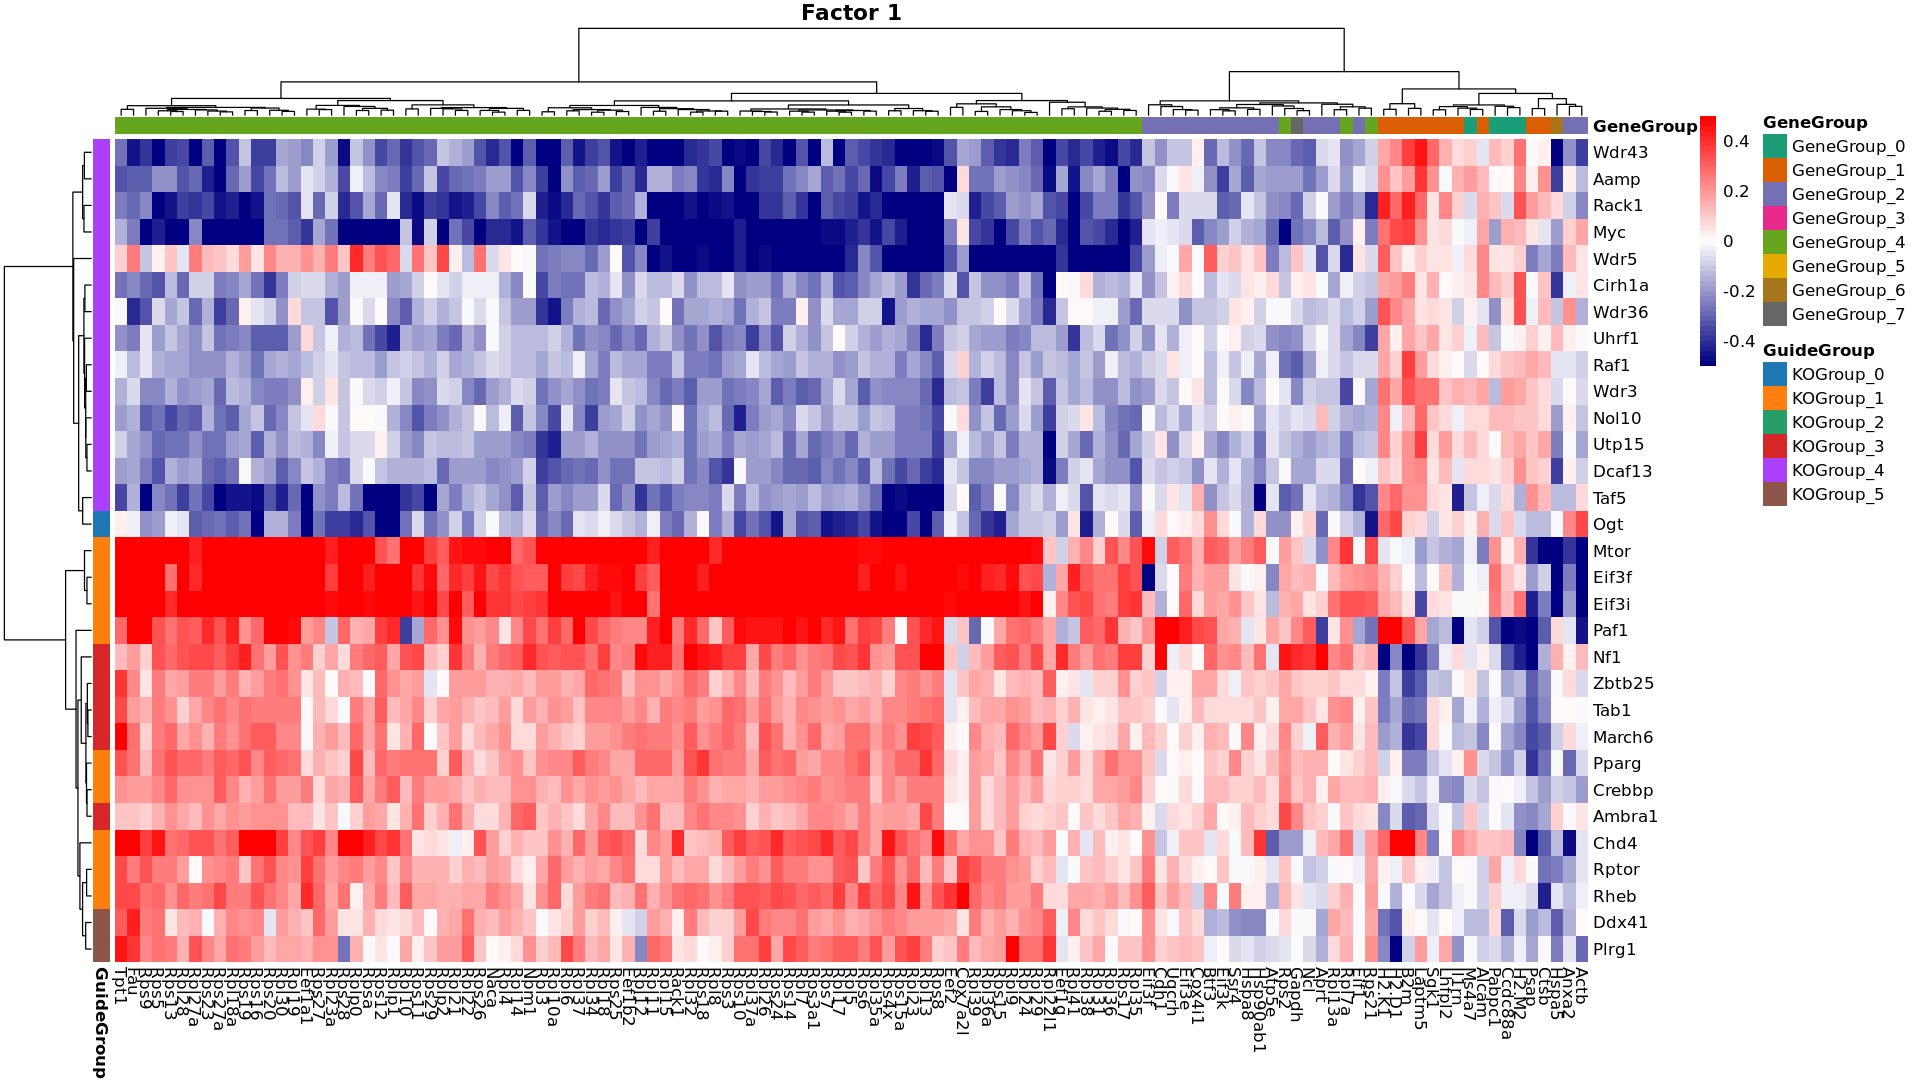

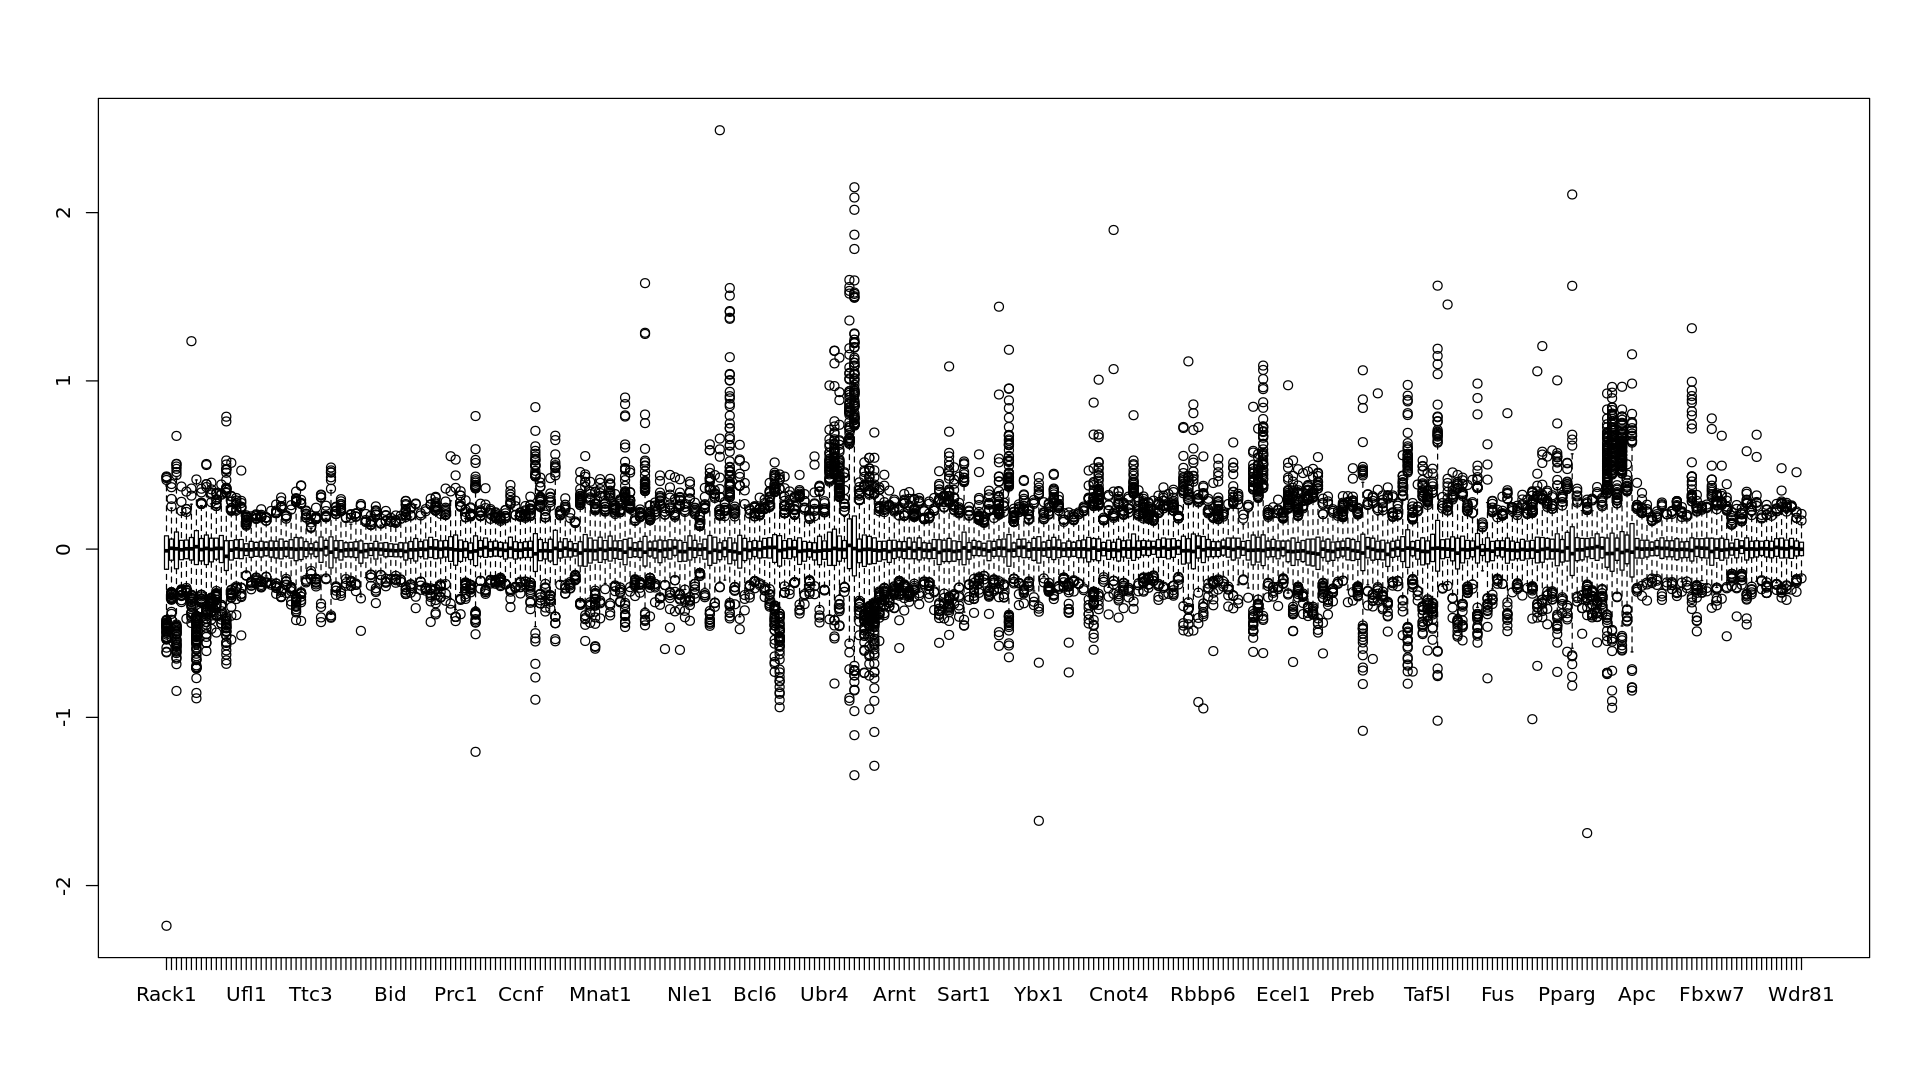

[1] "Genes in the pathway: "
[1] "############## FACTOR : 3 ##################"
[1] 30
[1] 71


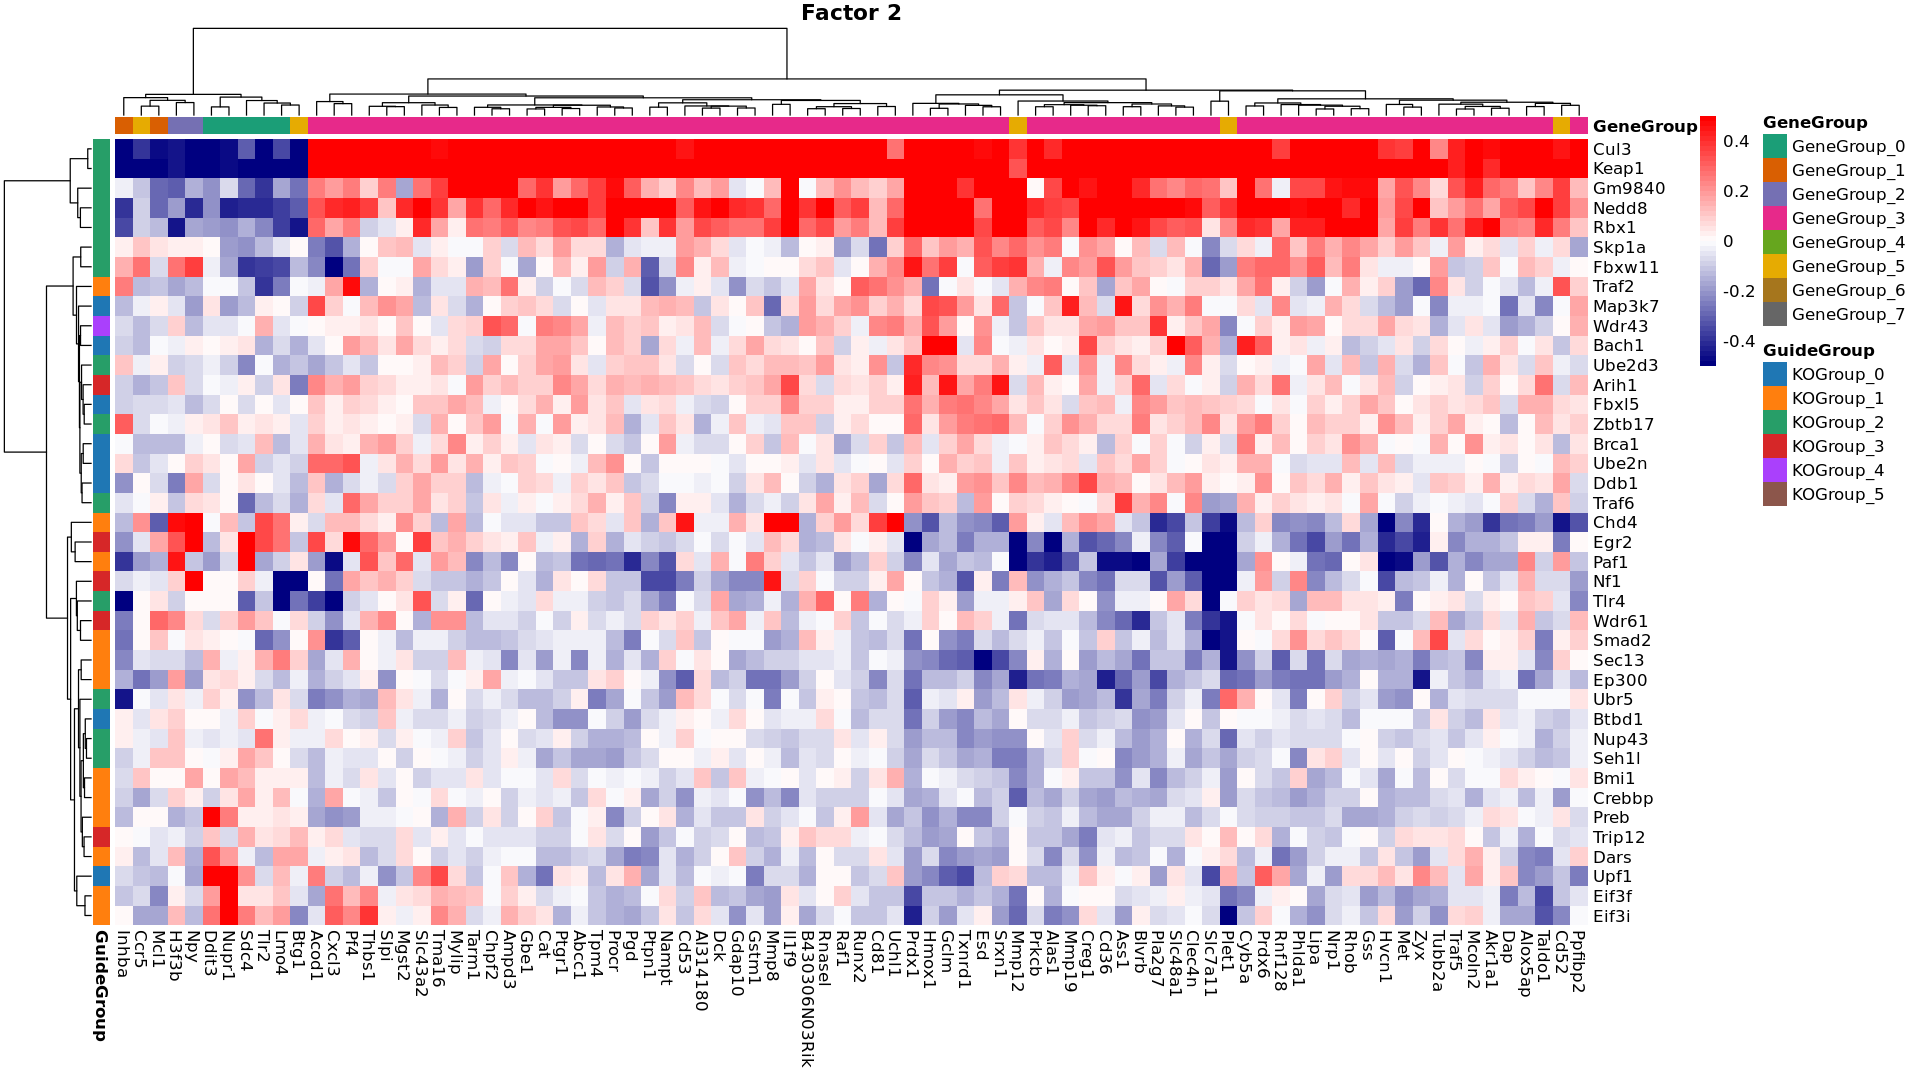

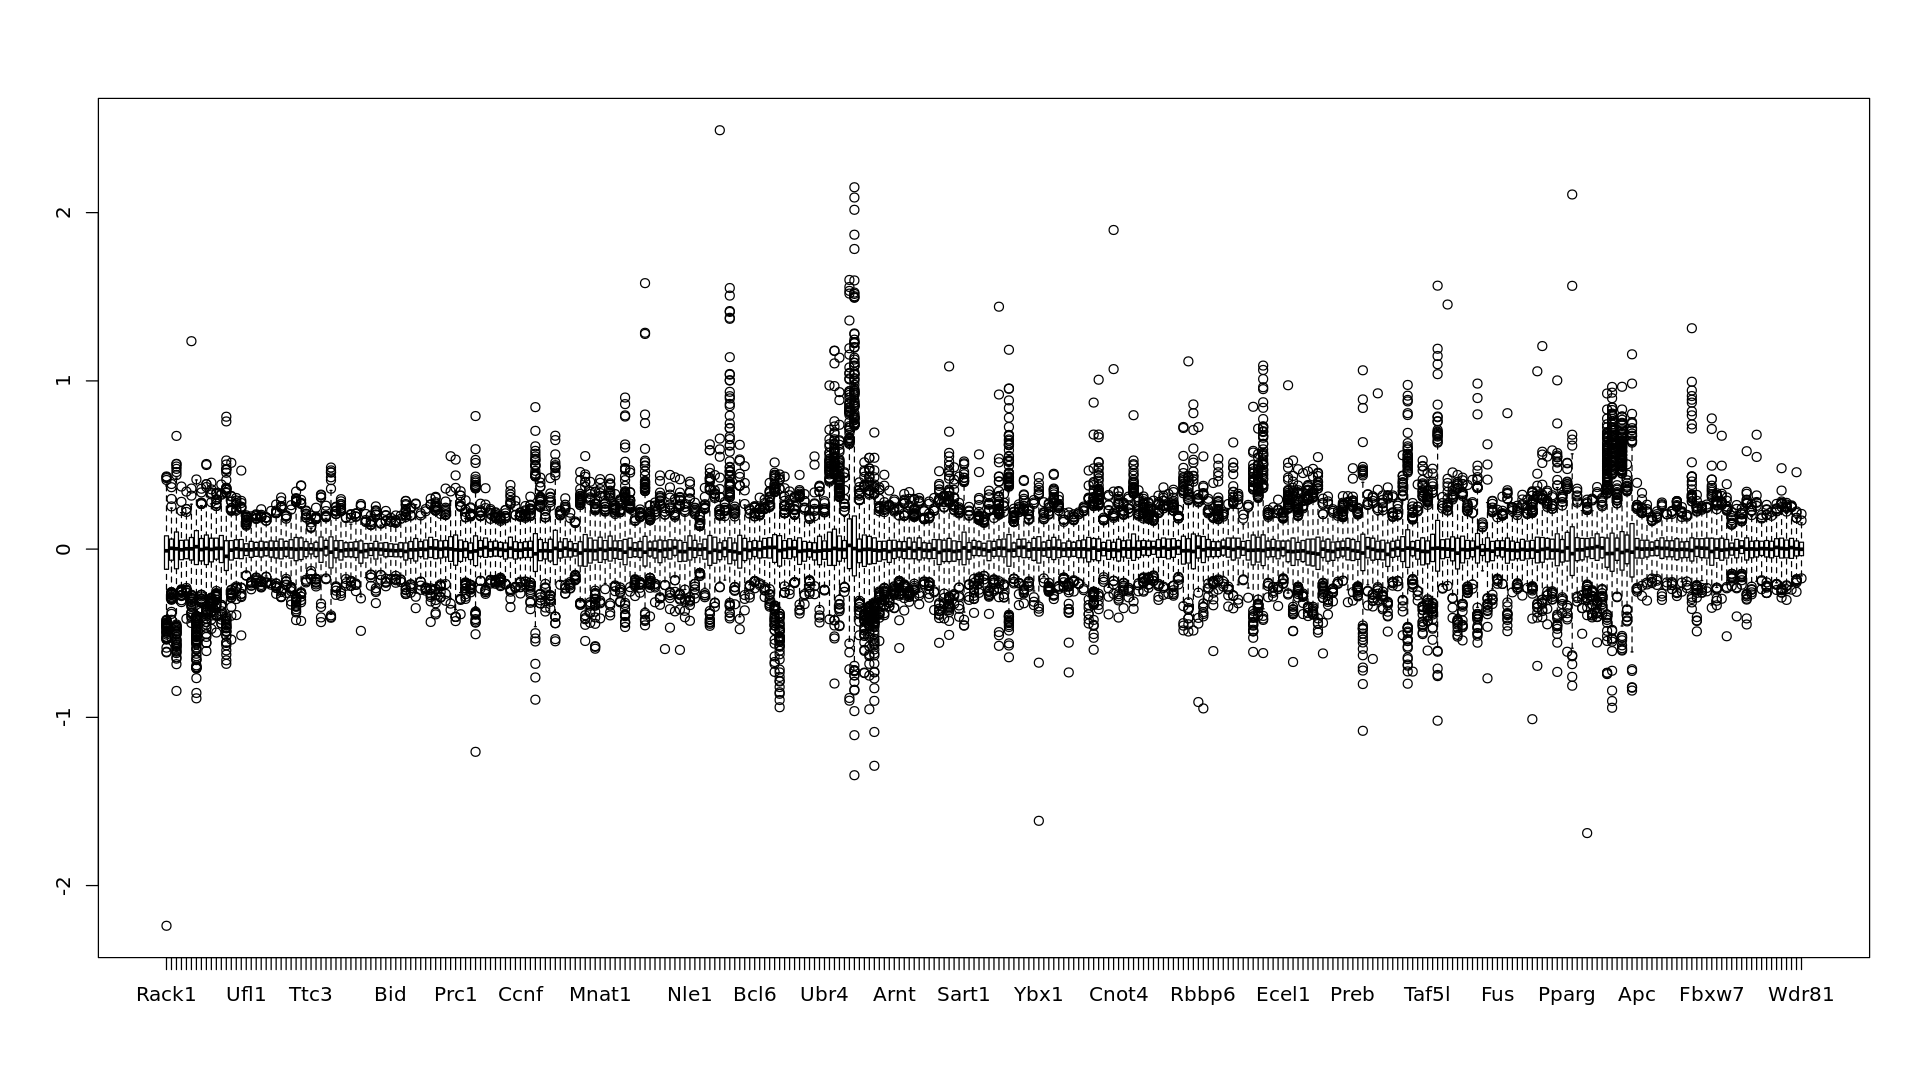

[1] "Genes in the pathway: "
[1] "############## FACTOR : 4 ##################"
[1] 39
[1] 39


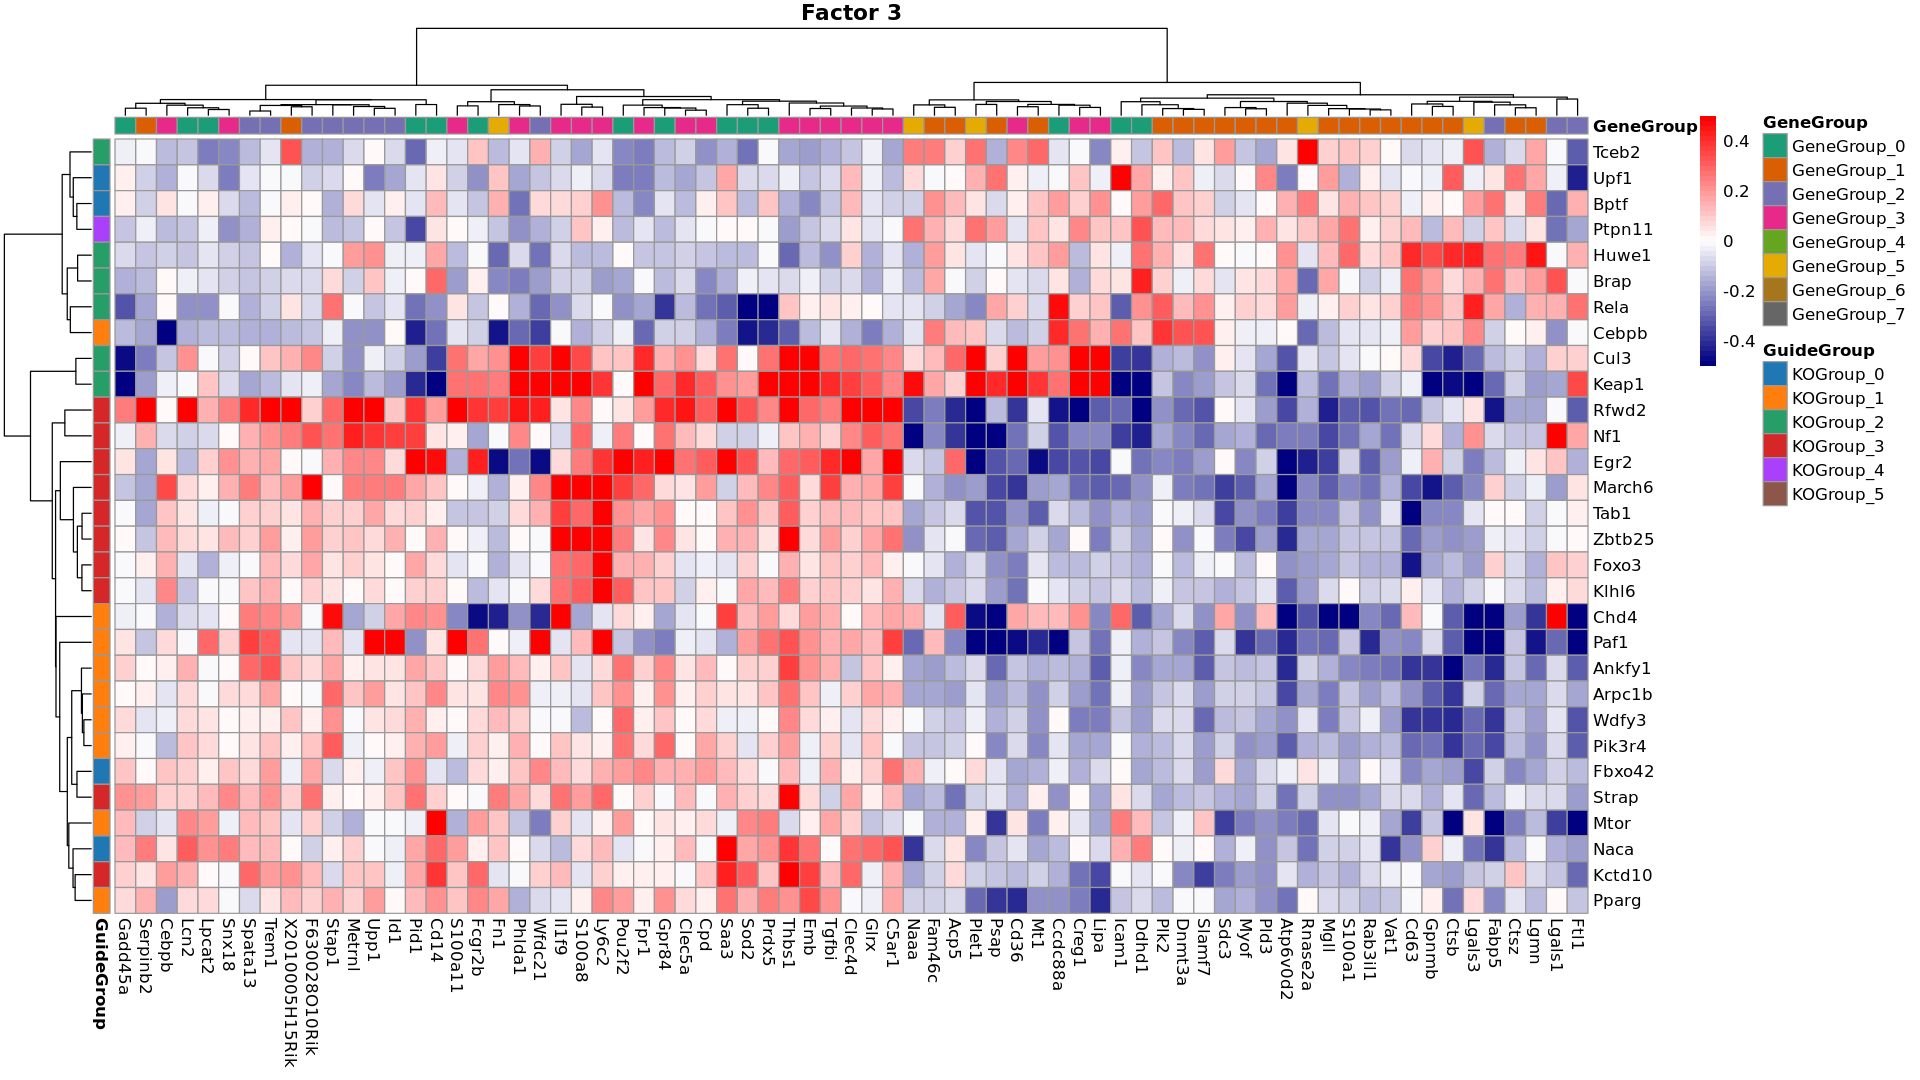

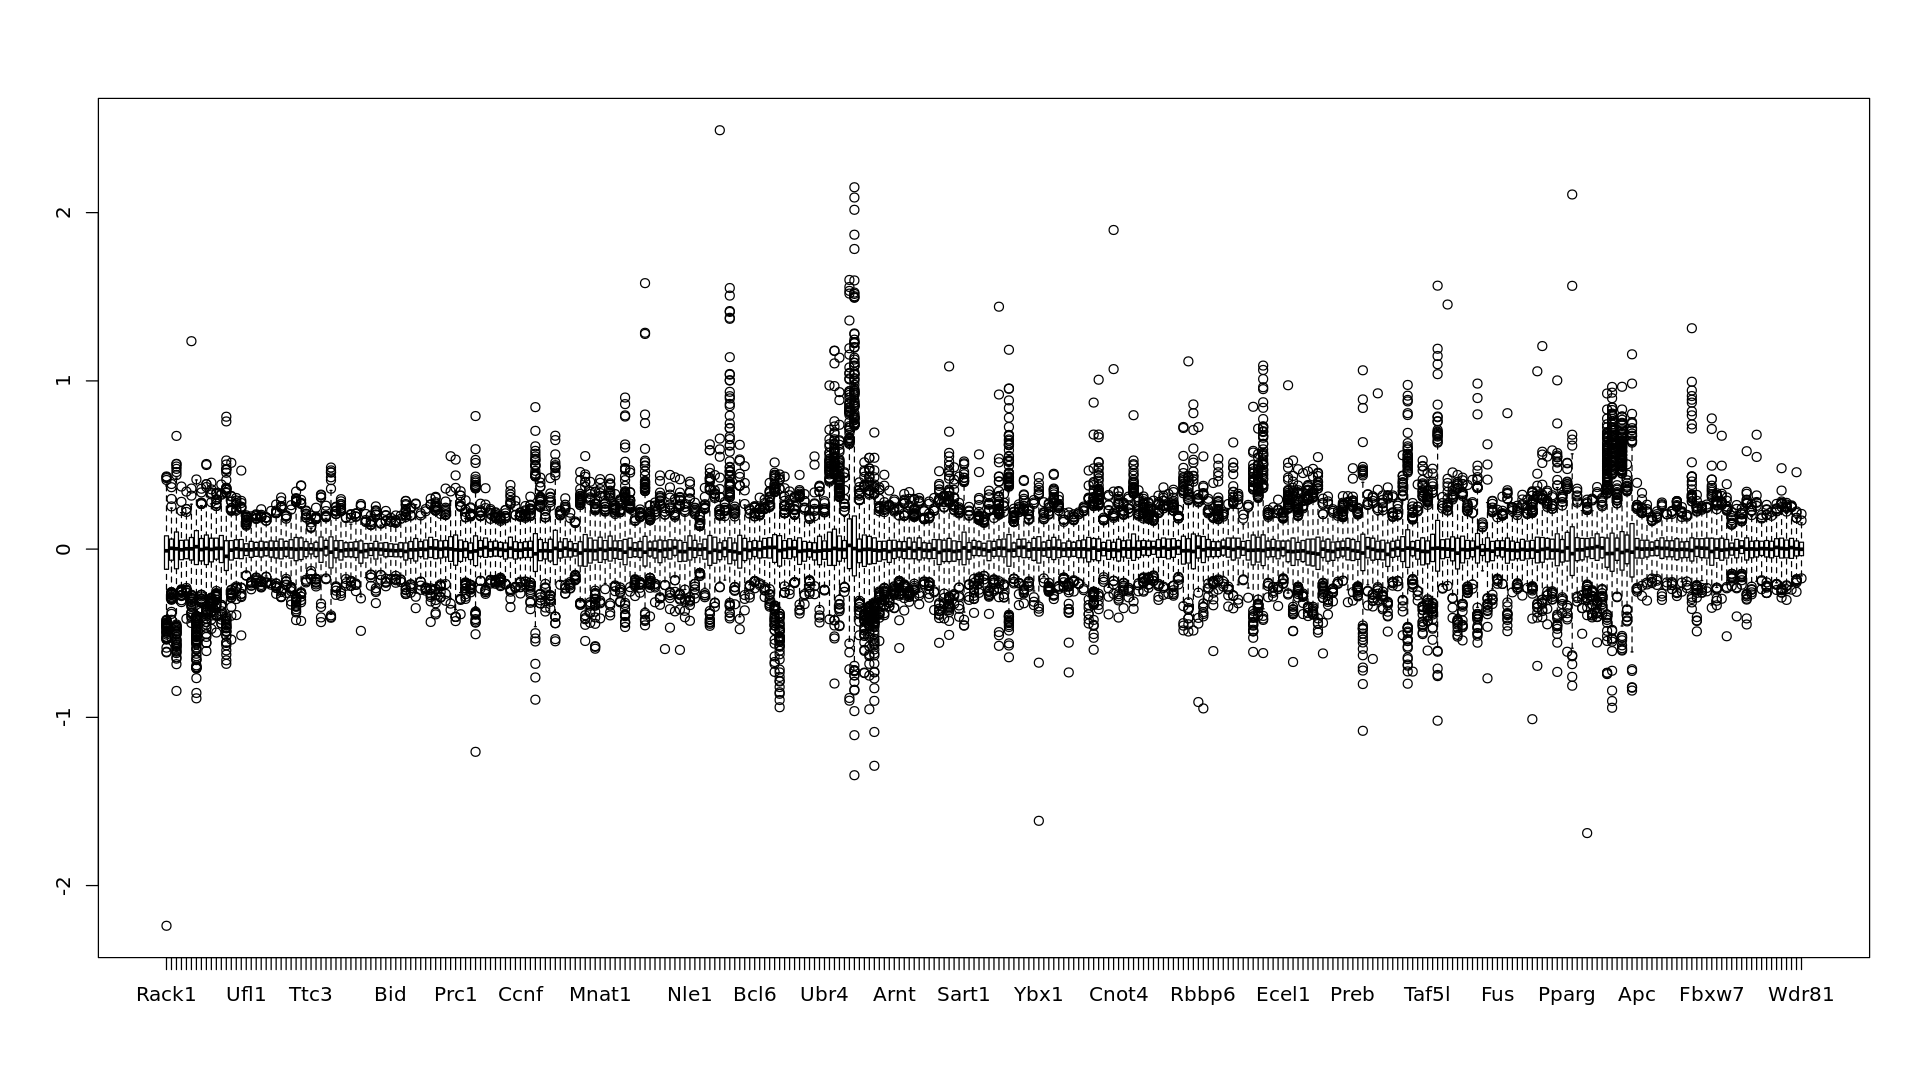

[1] "Genes in the pathway: "
[1] "############## FACTOR : 5 ##################"
[1] 39
[1] 67


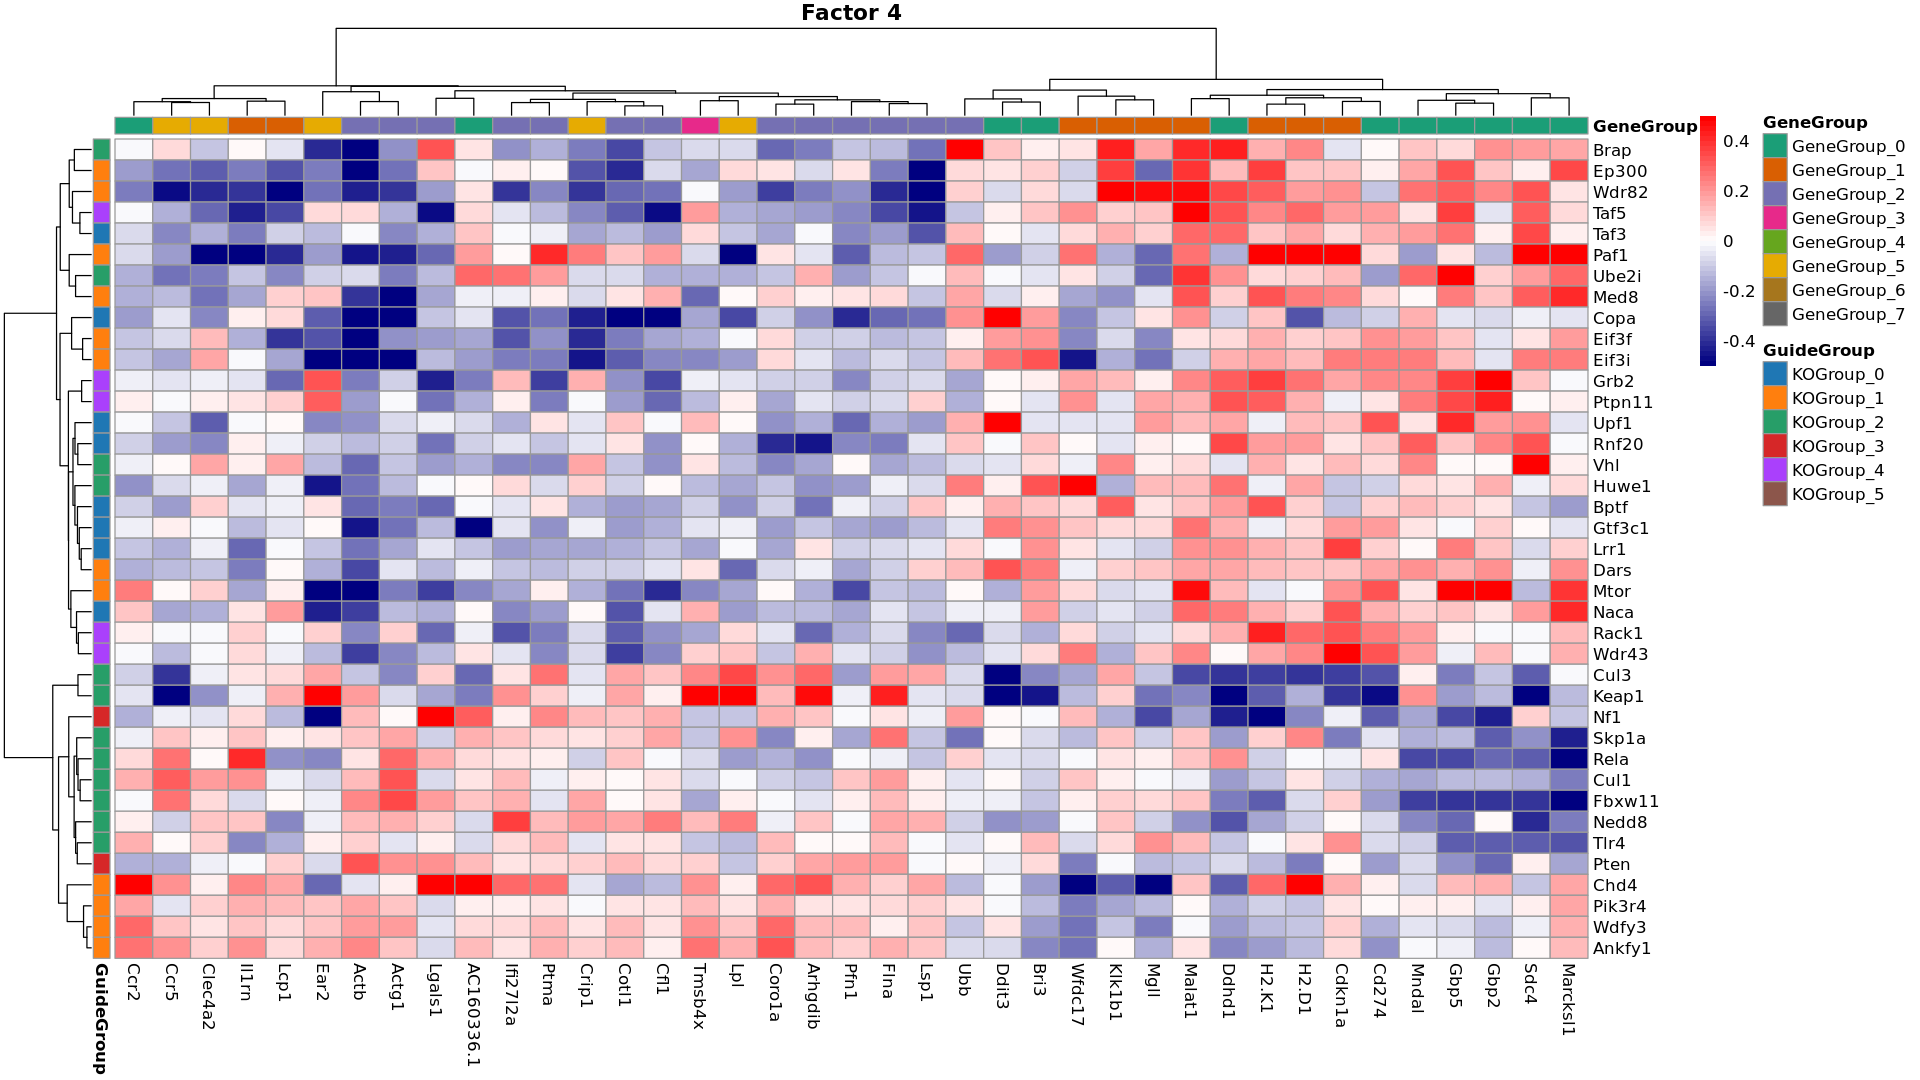

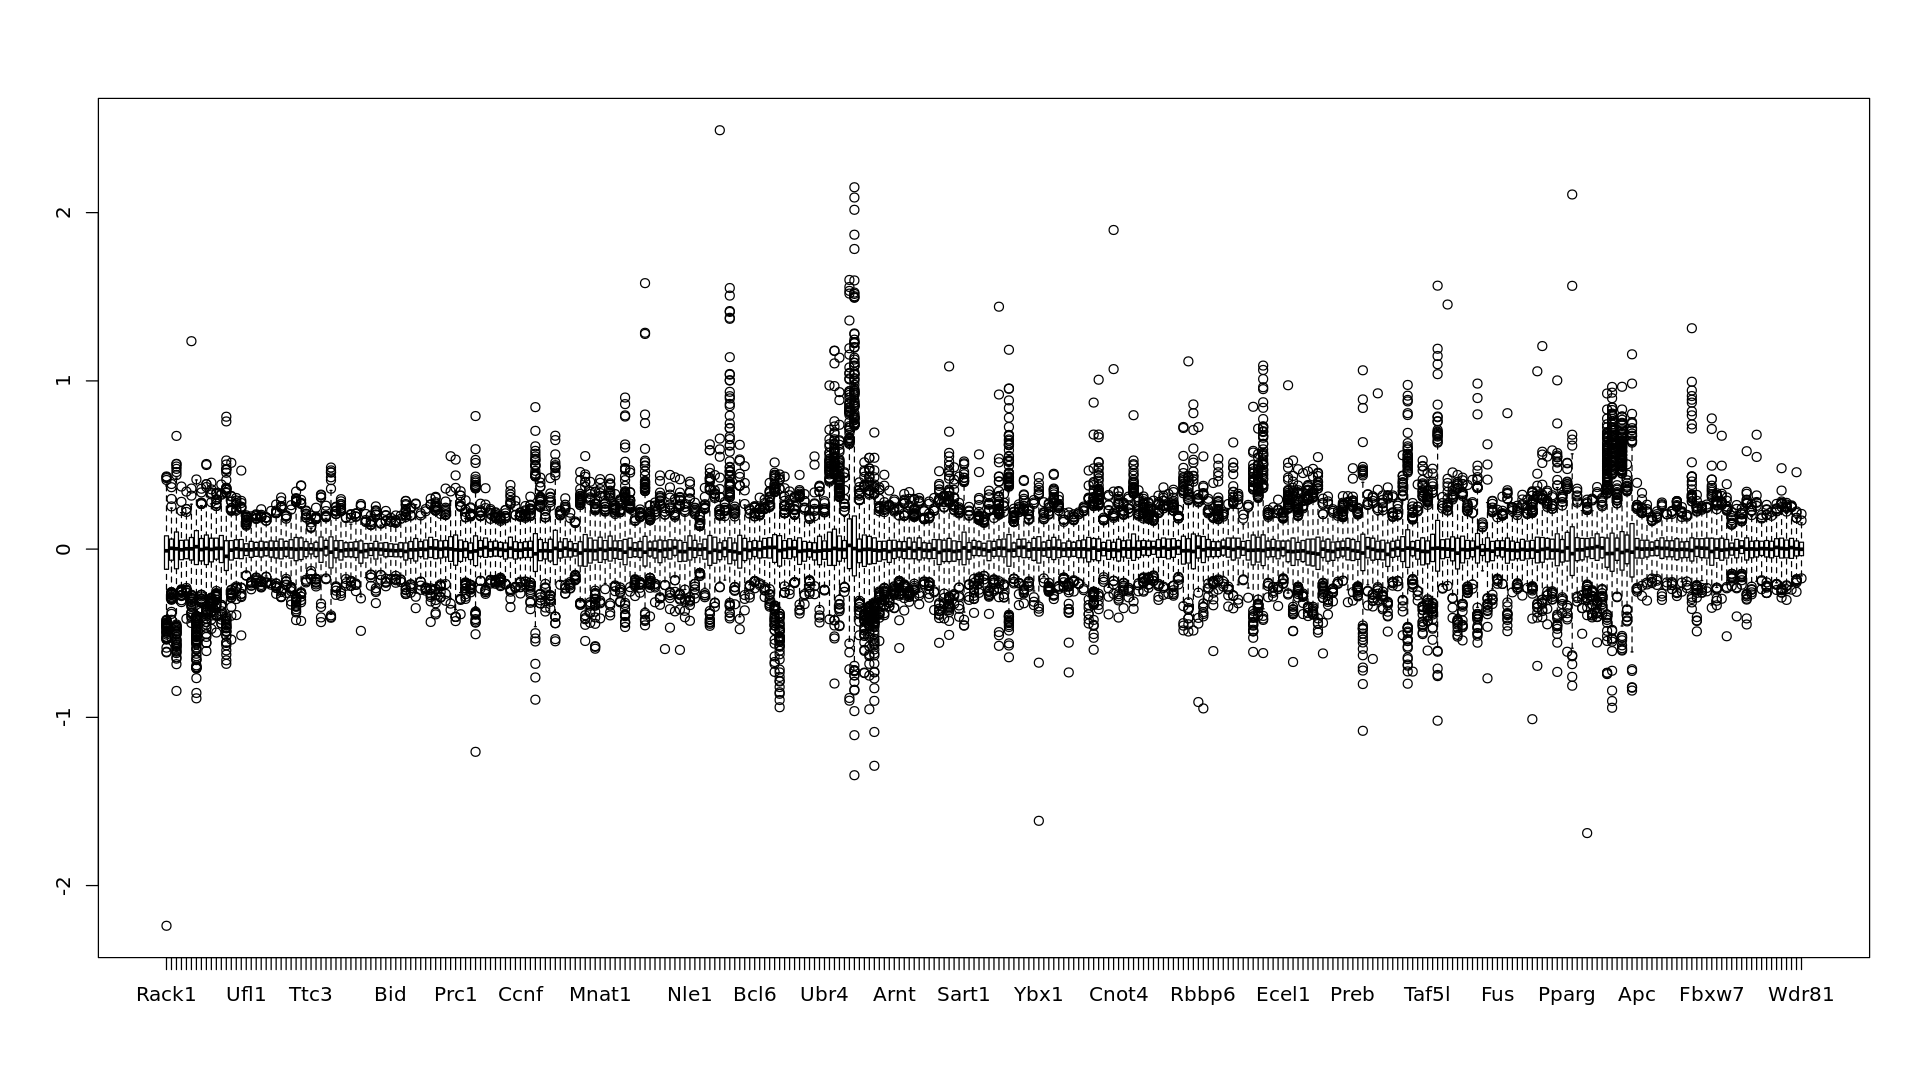

[1] "Genes in the pathway: "
[1] "############## FACTOR : 6 ##################"
[1] 40
[1] 64


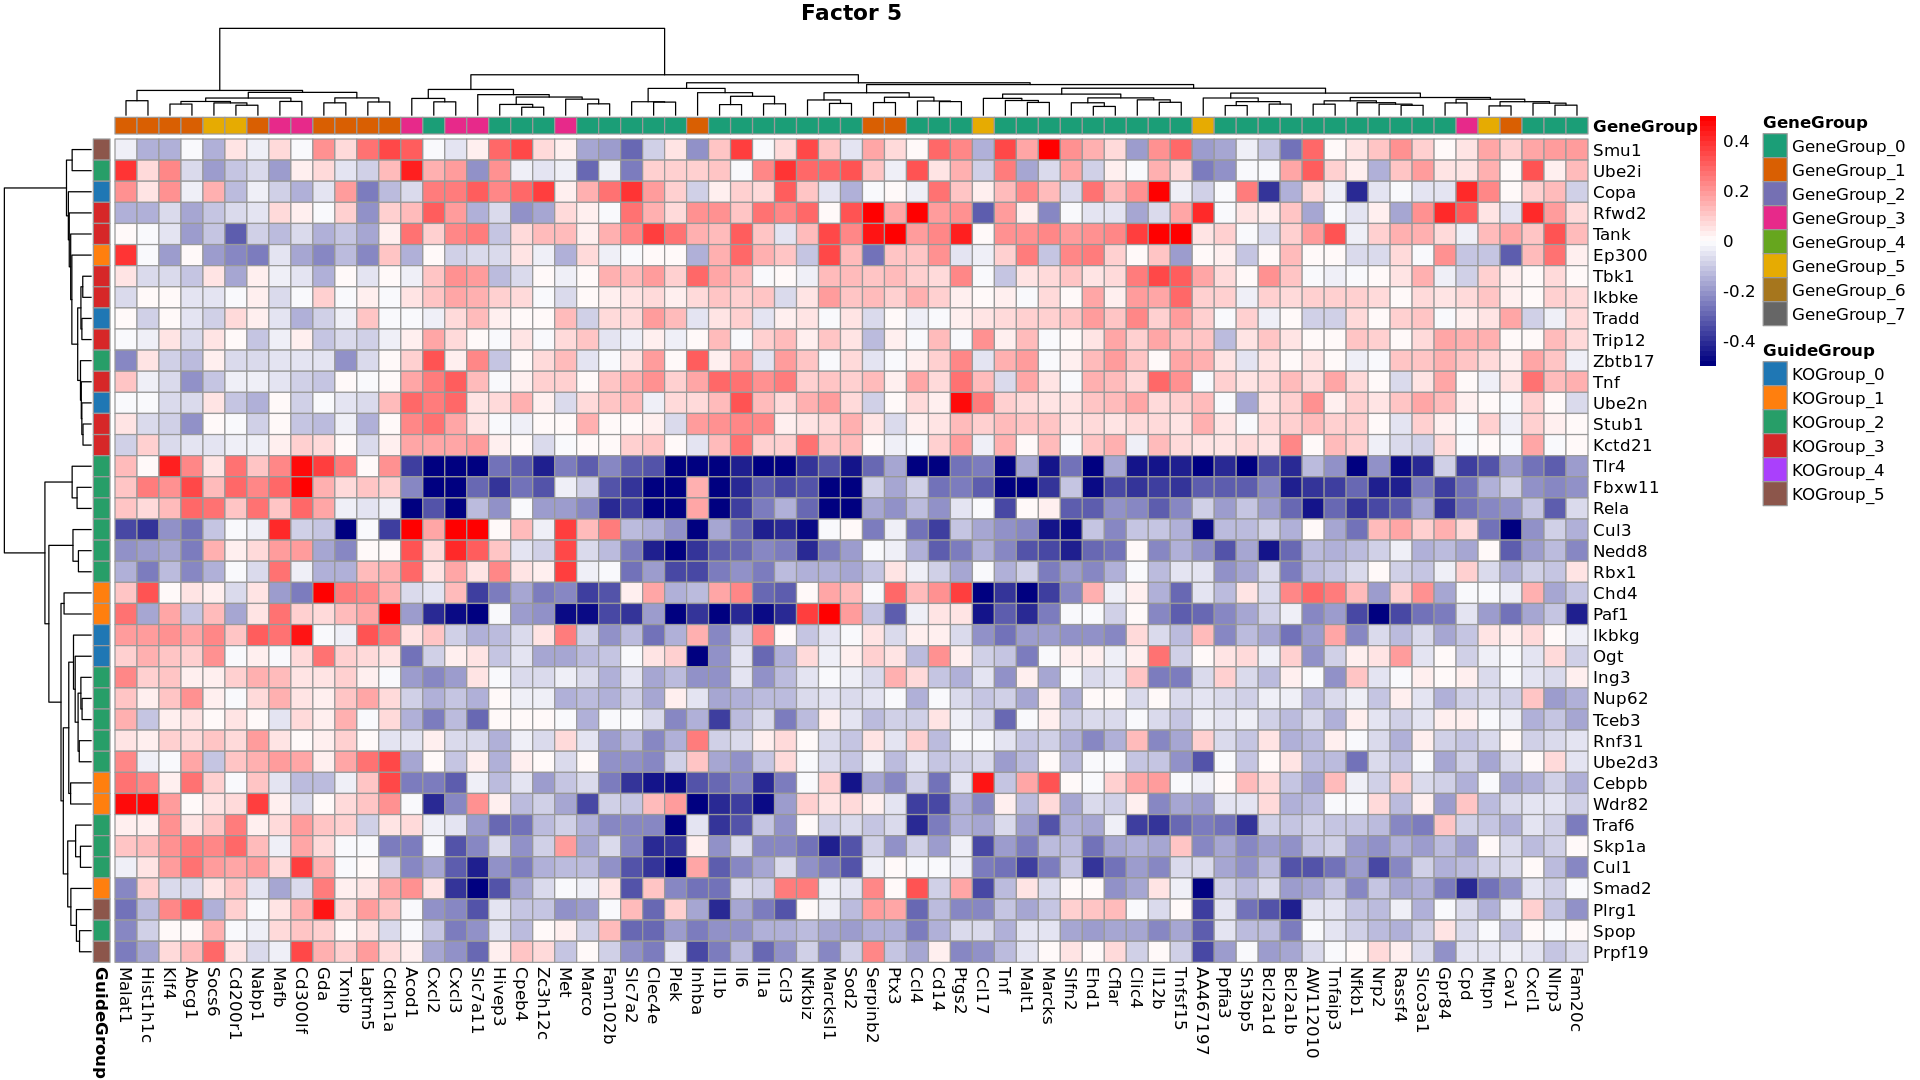

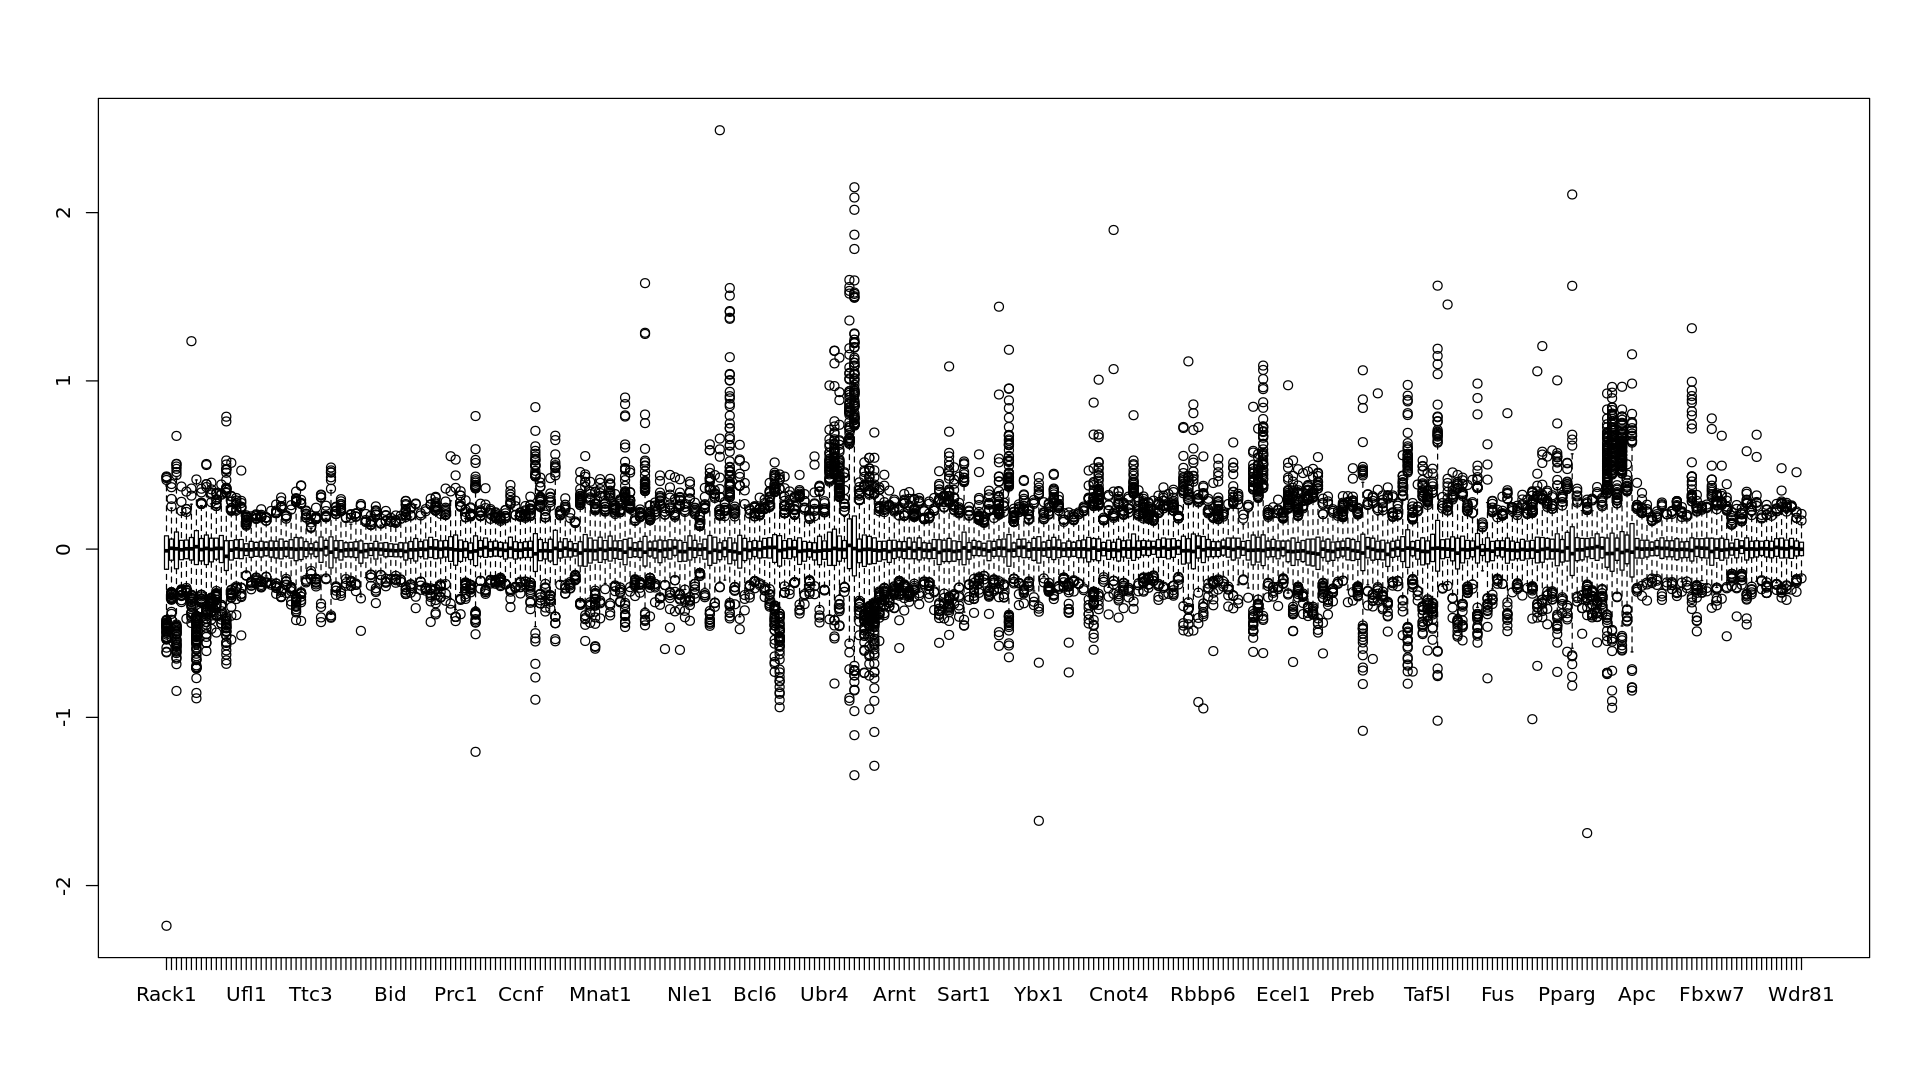

[1] "Genes in the pathway: "
[1] "############## FACTOR : 7 ##################"
[1] 30
[1] 34


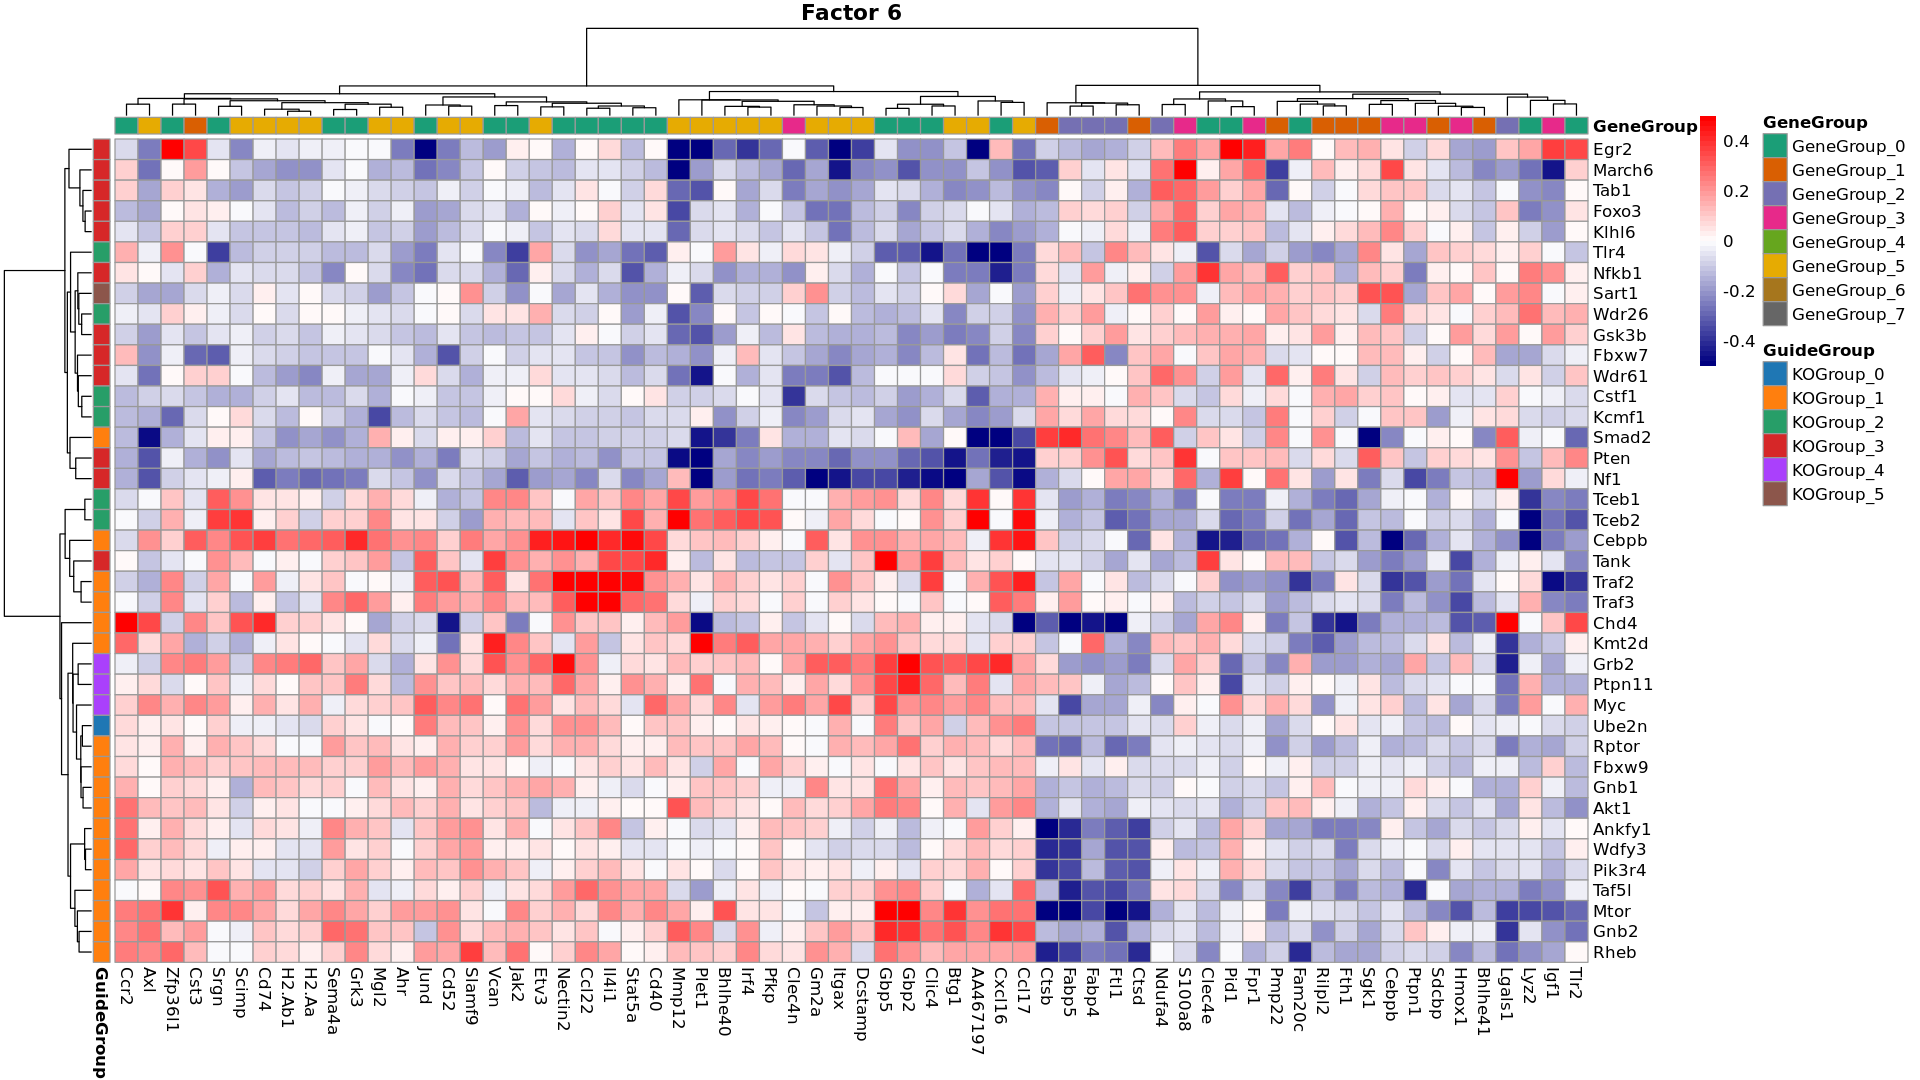

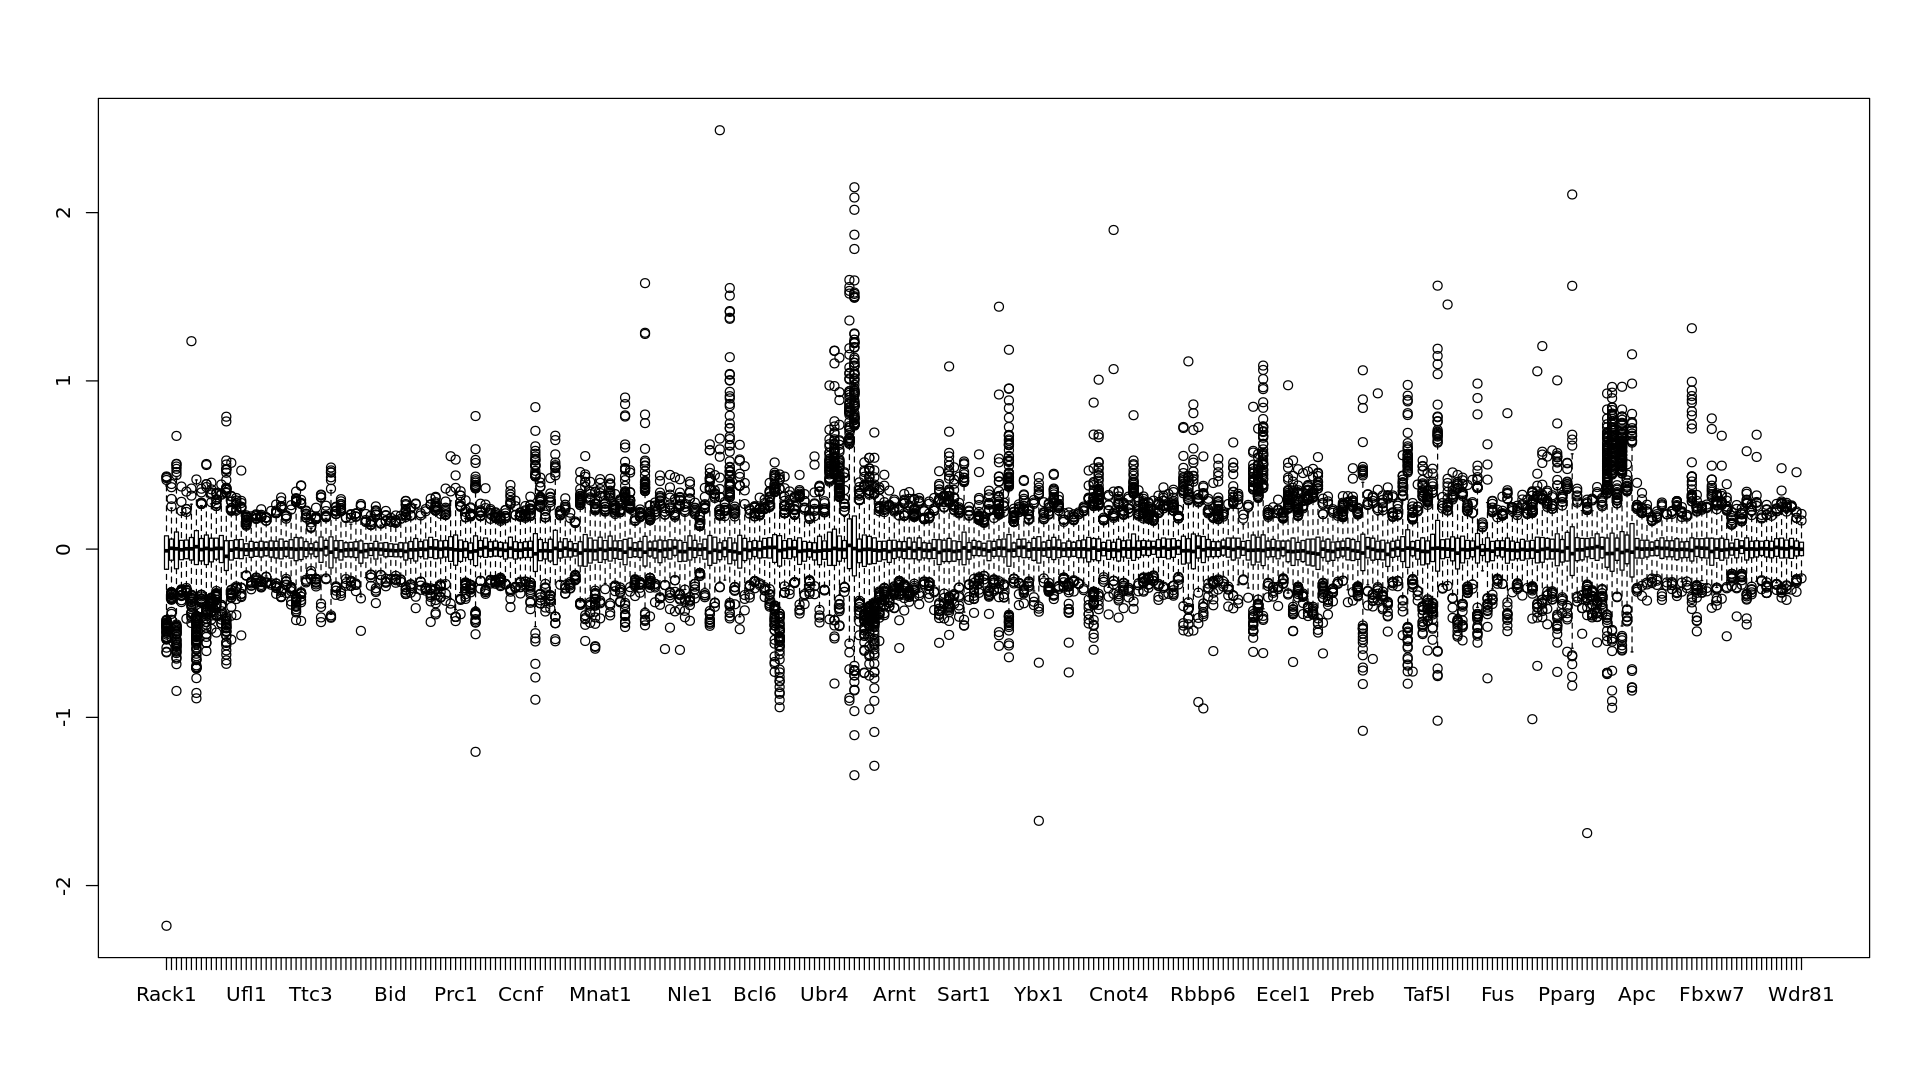

[1] "Genes in the pathway: "
[1] "############## FACTOR : 8 ##################"
[1] 53
[1] 57


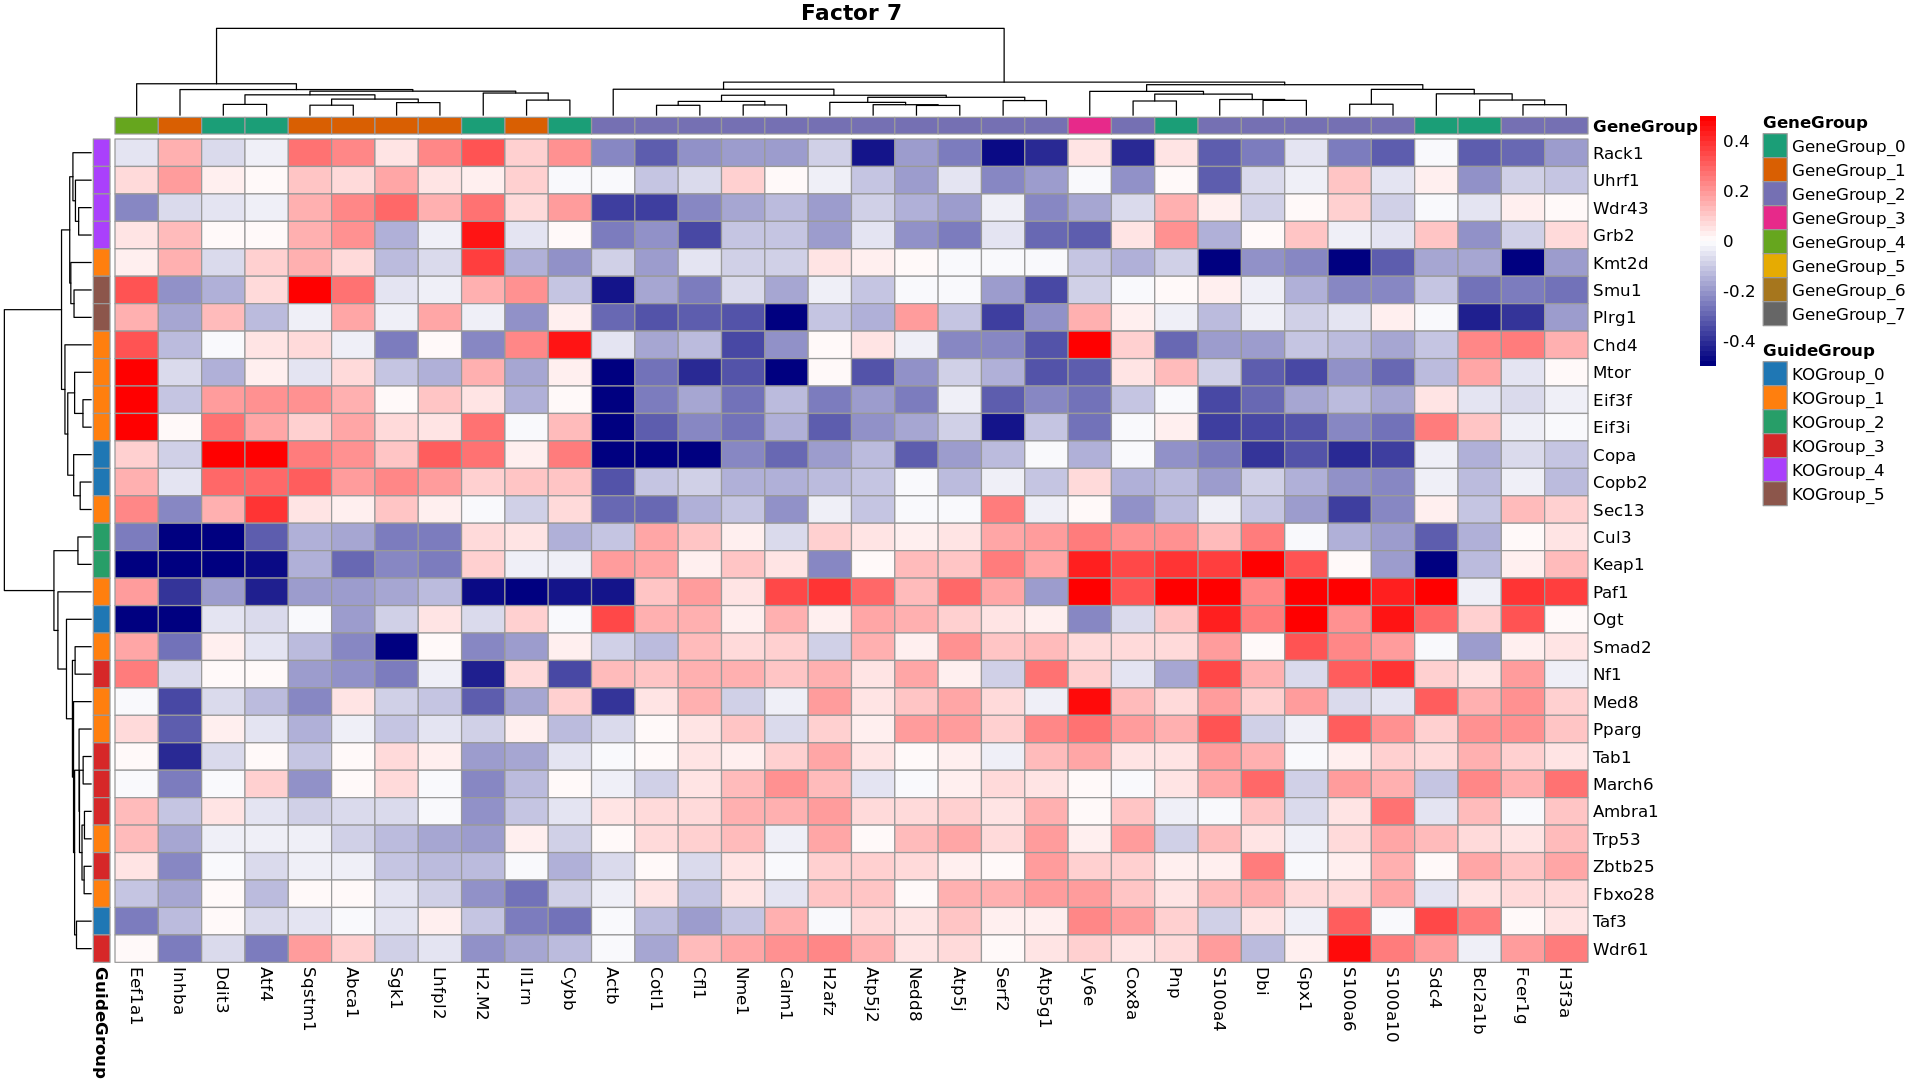

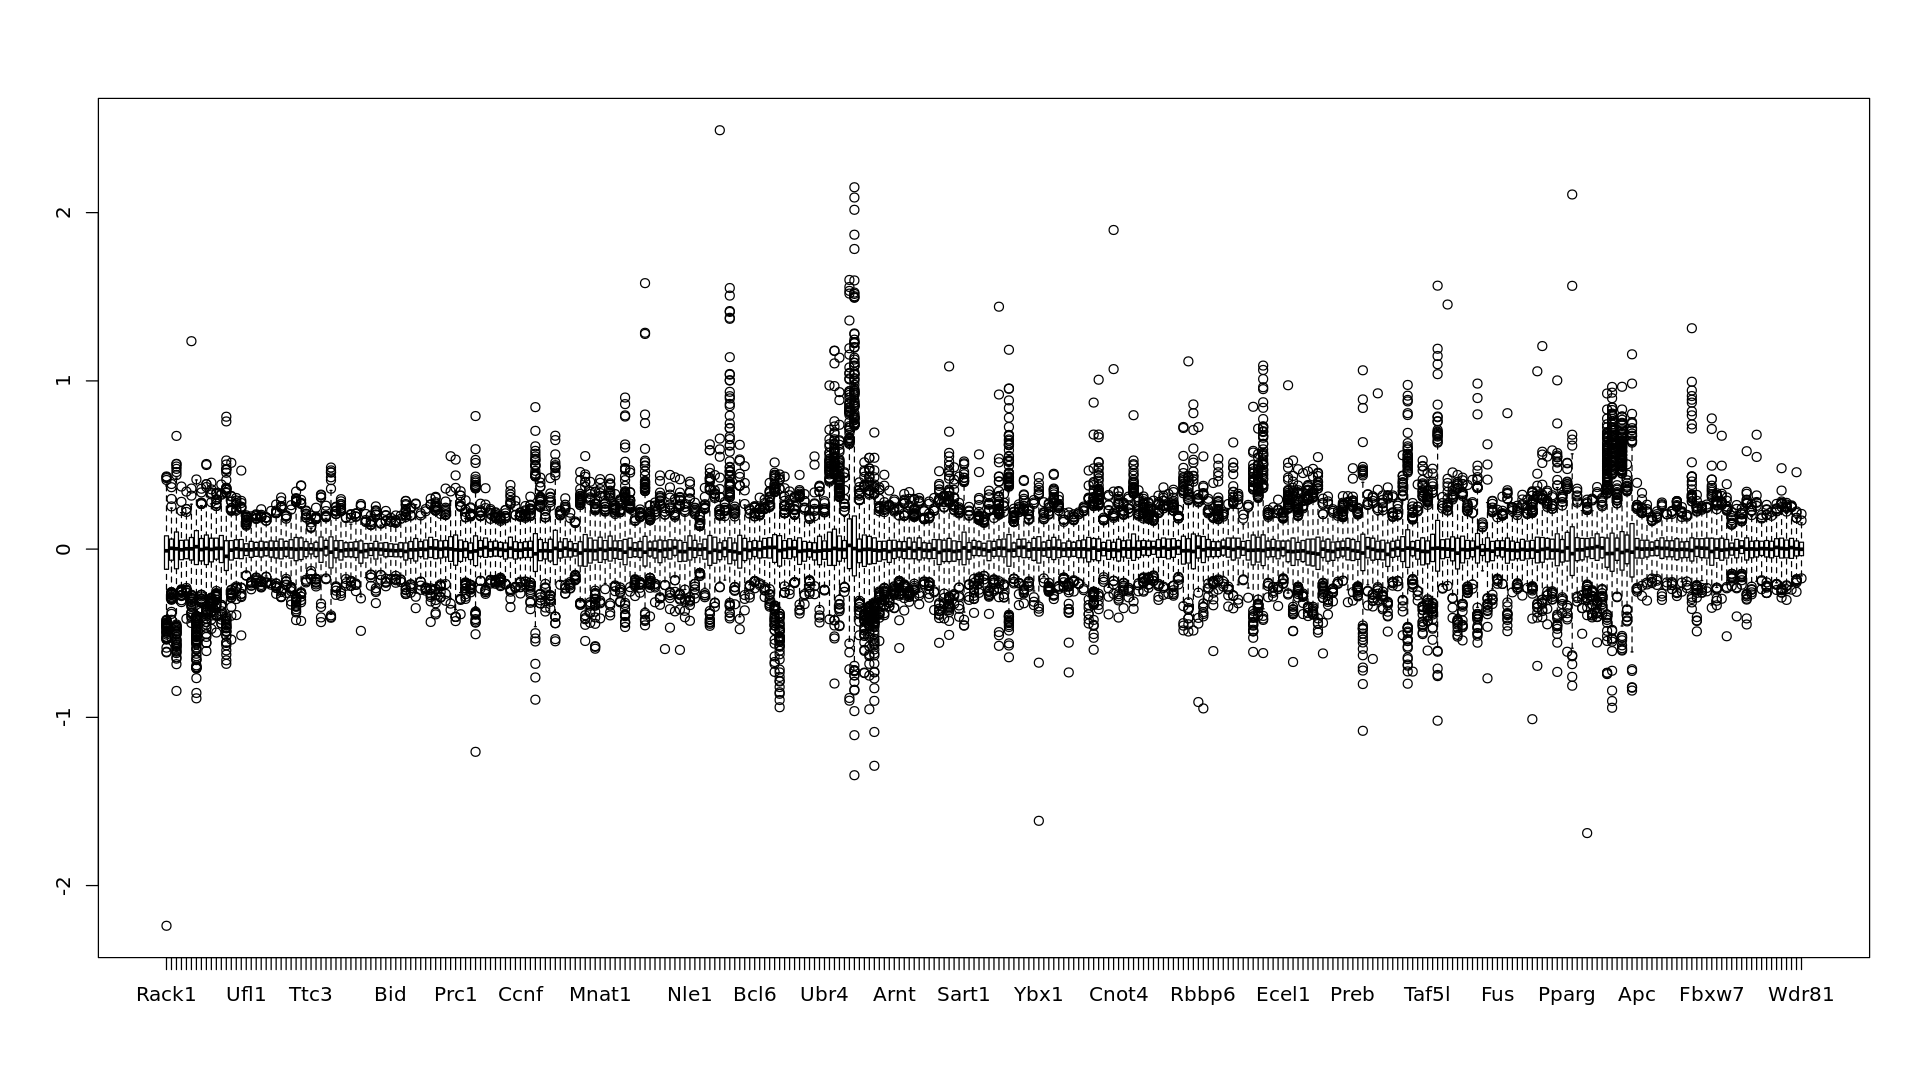

[1] "Genes in the pathway: "
[1] "############## FACTOR : 9 ##################"
[1] 40
[1] 71


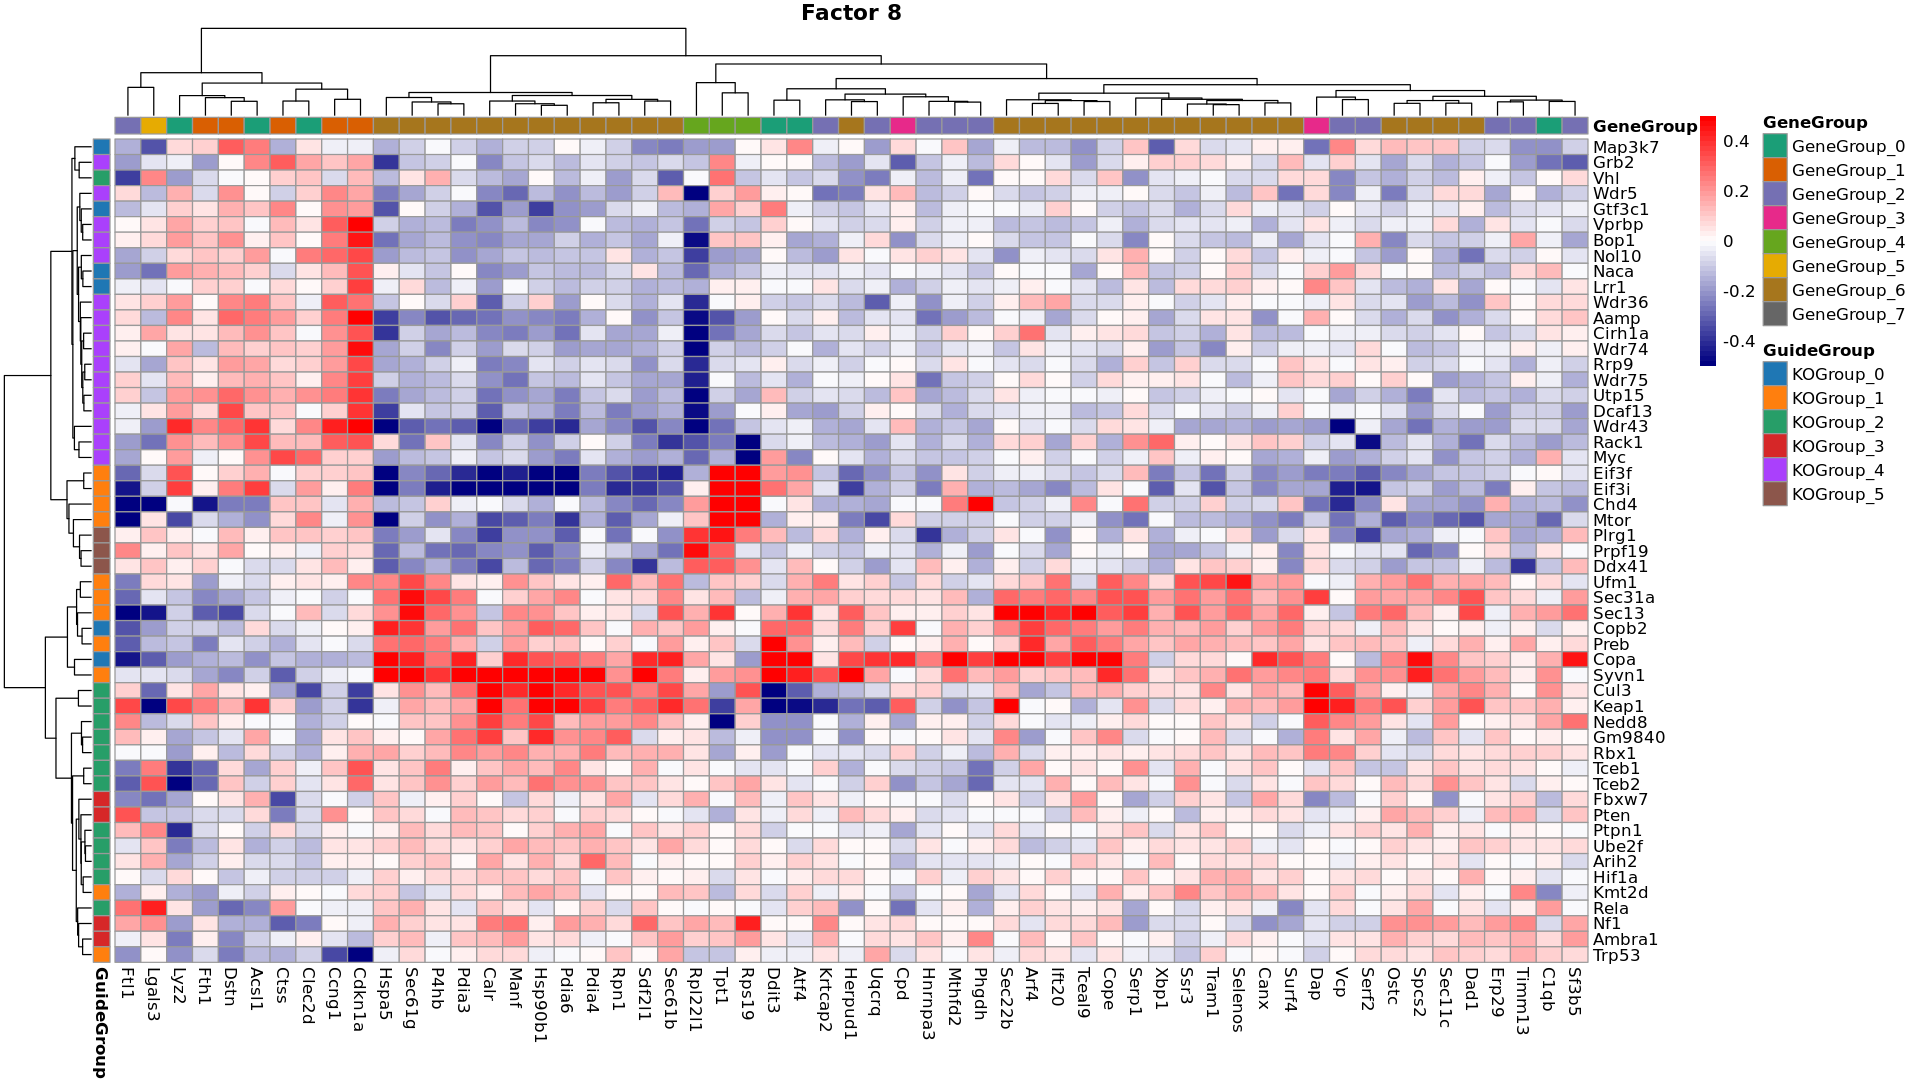

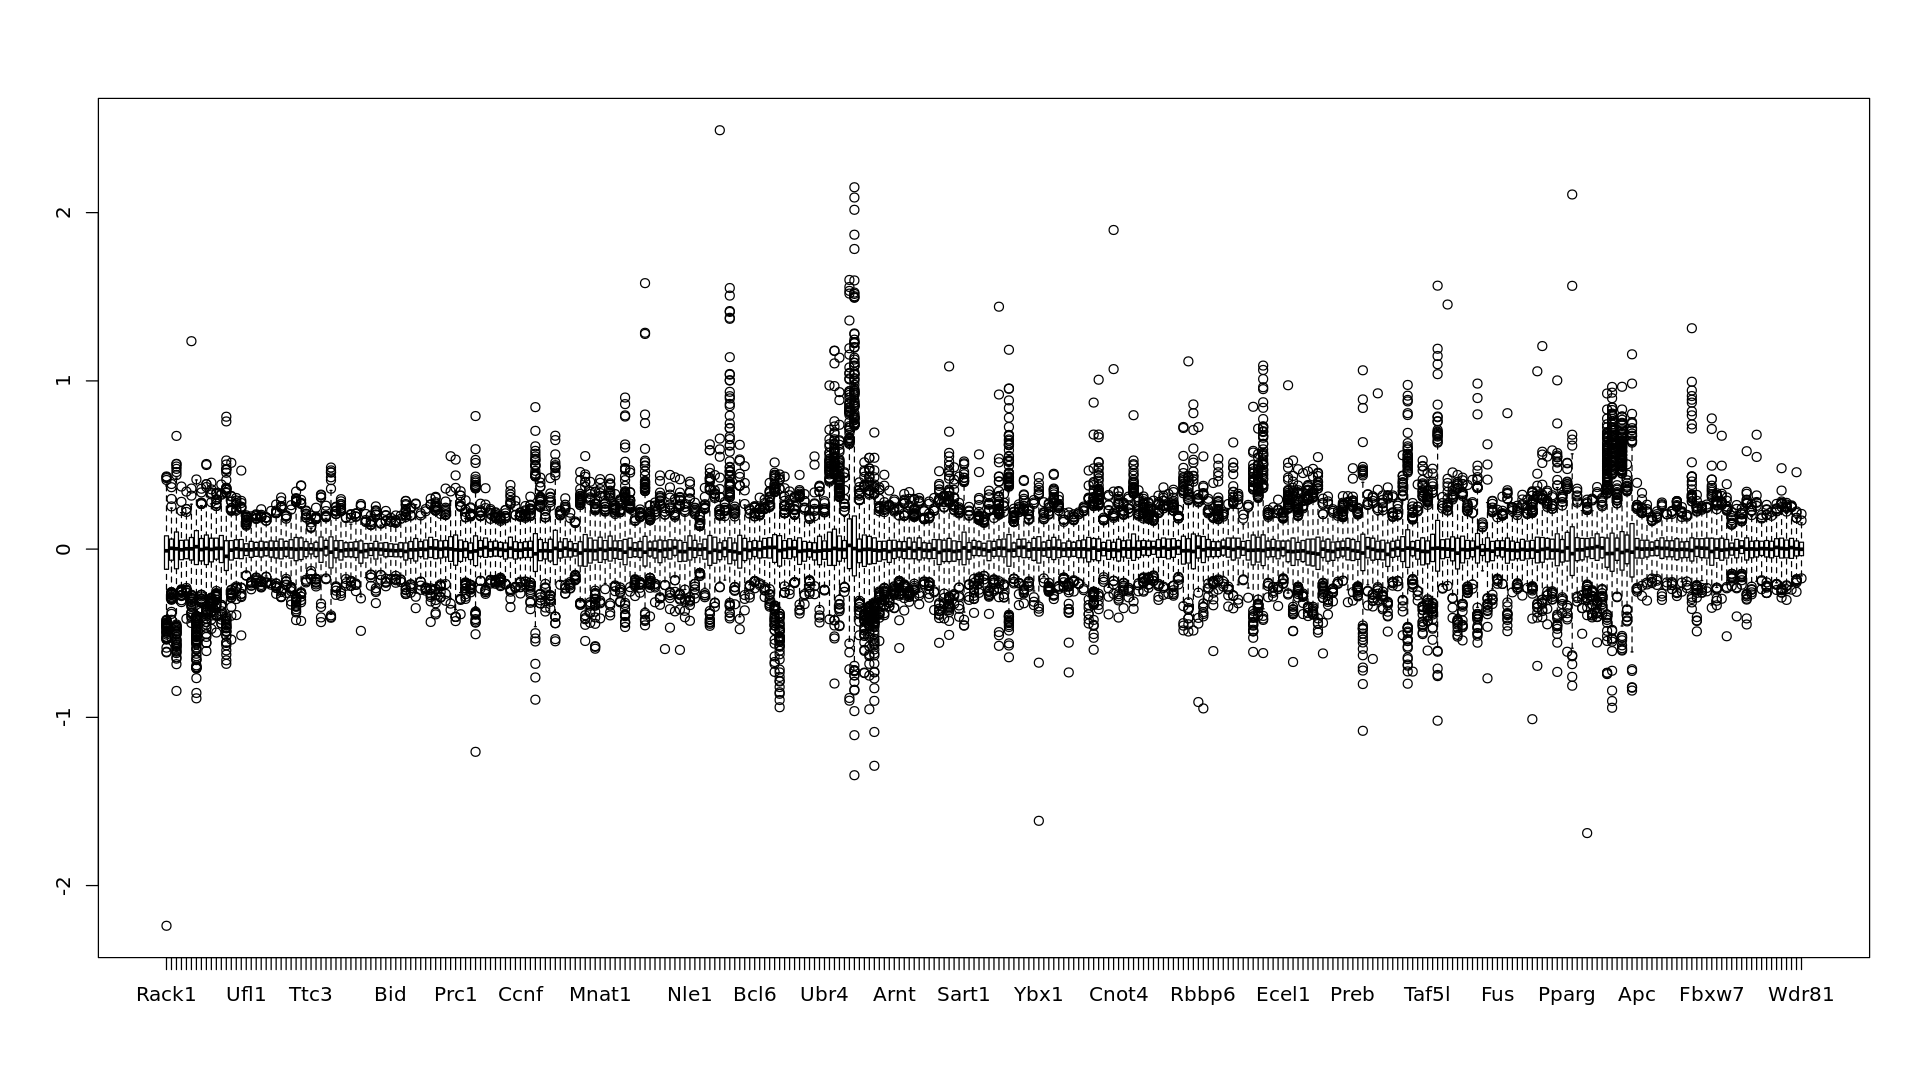

[1] "Genes in the pathway: "
[1] "############## FACTOR : 10 ##################"
[1] 31
[1] 64


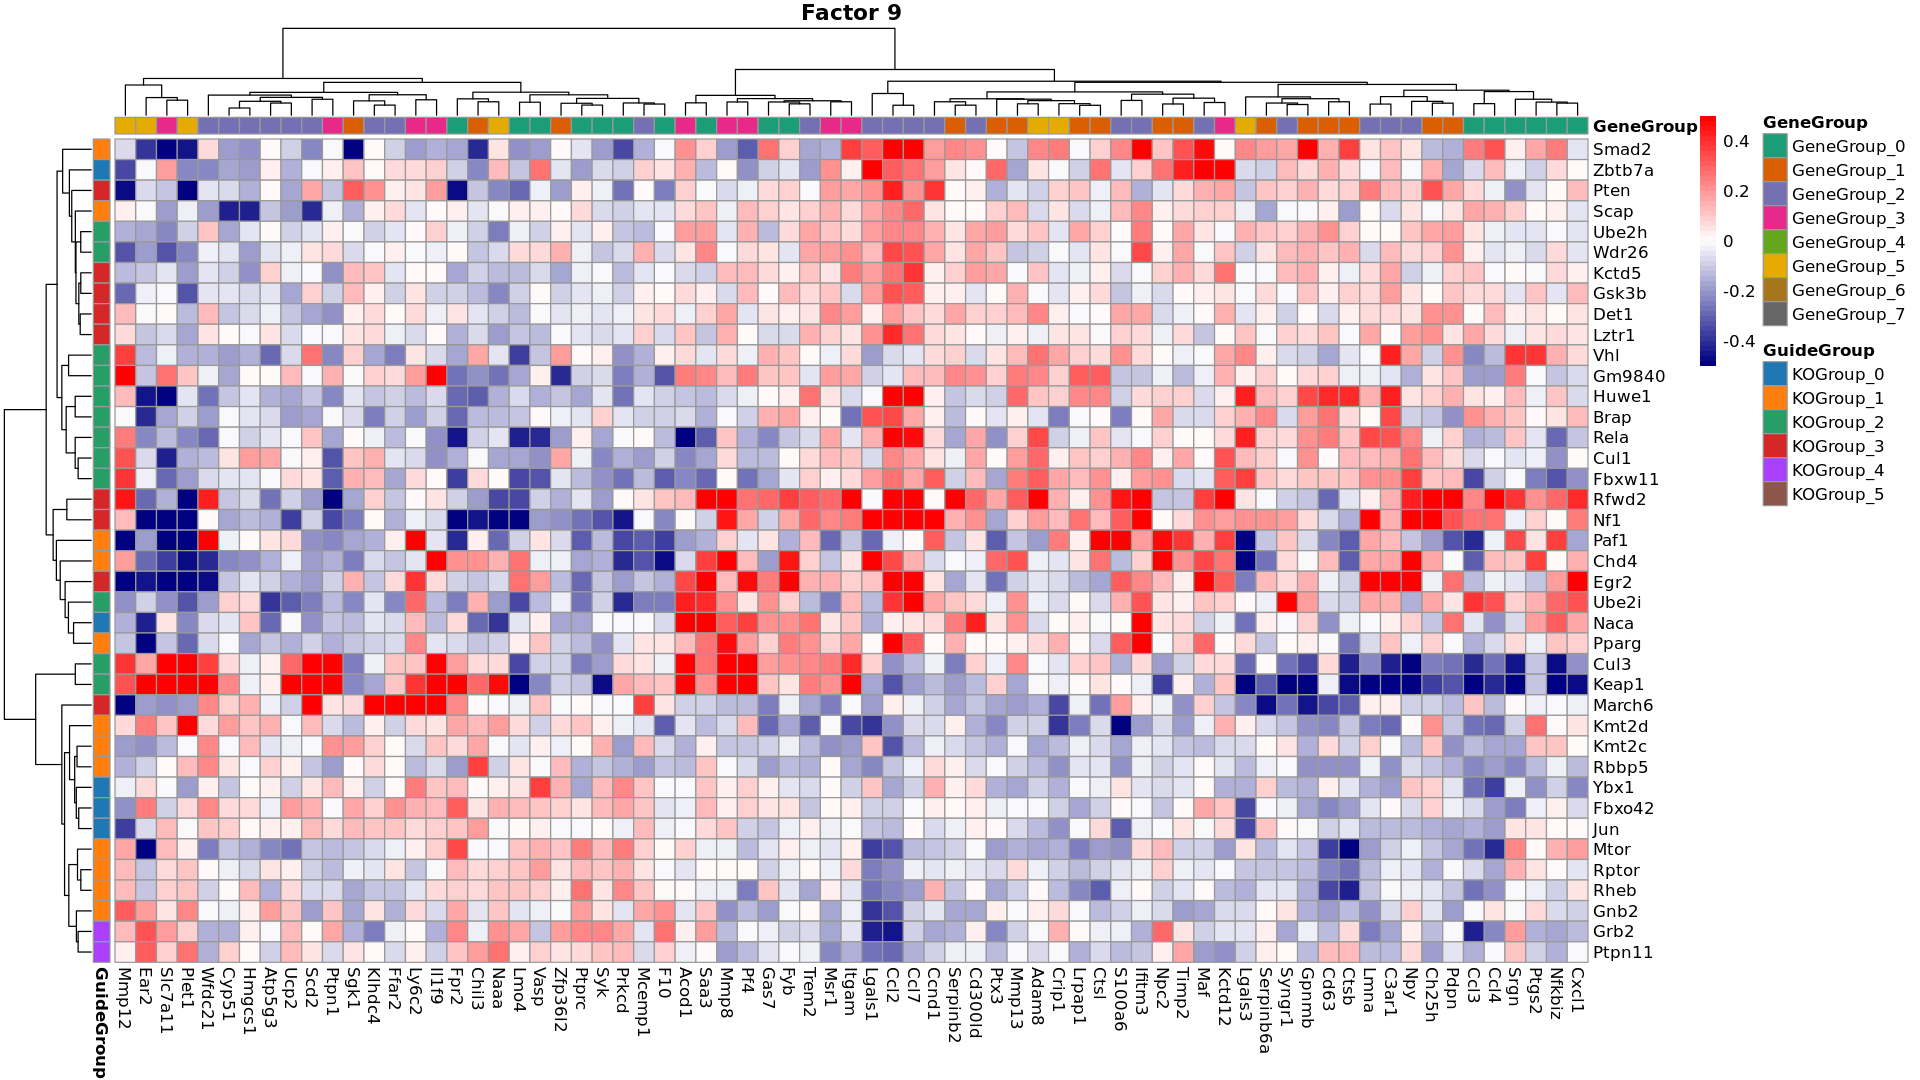

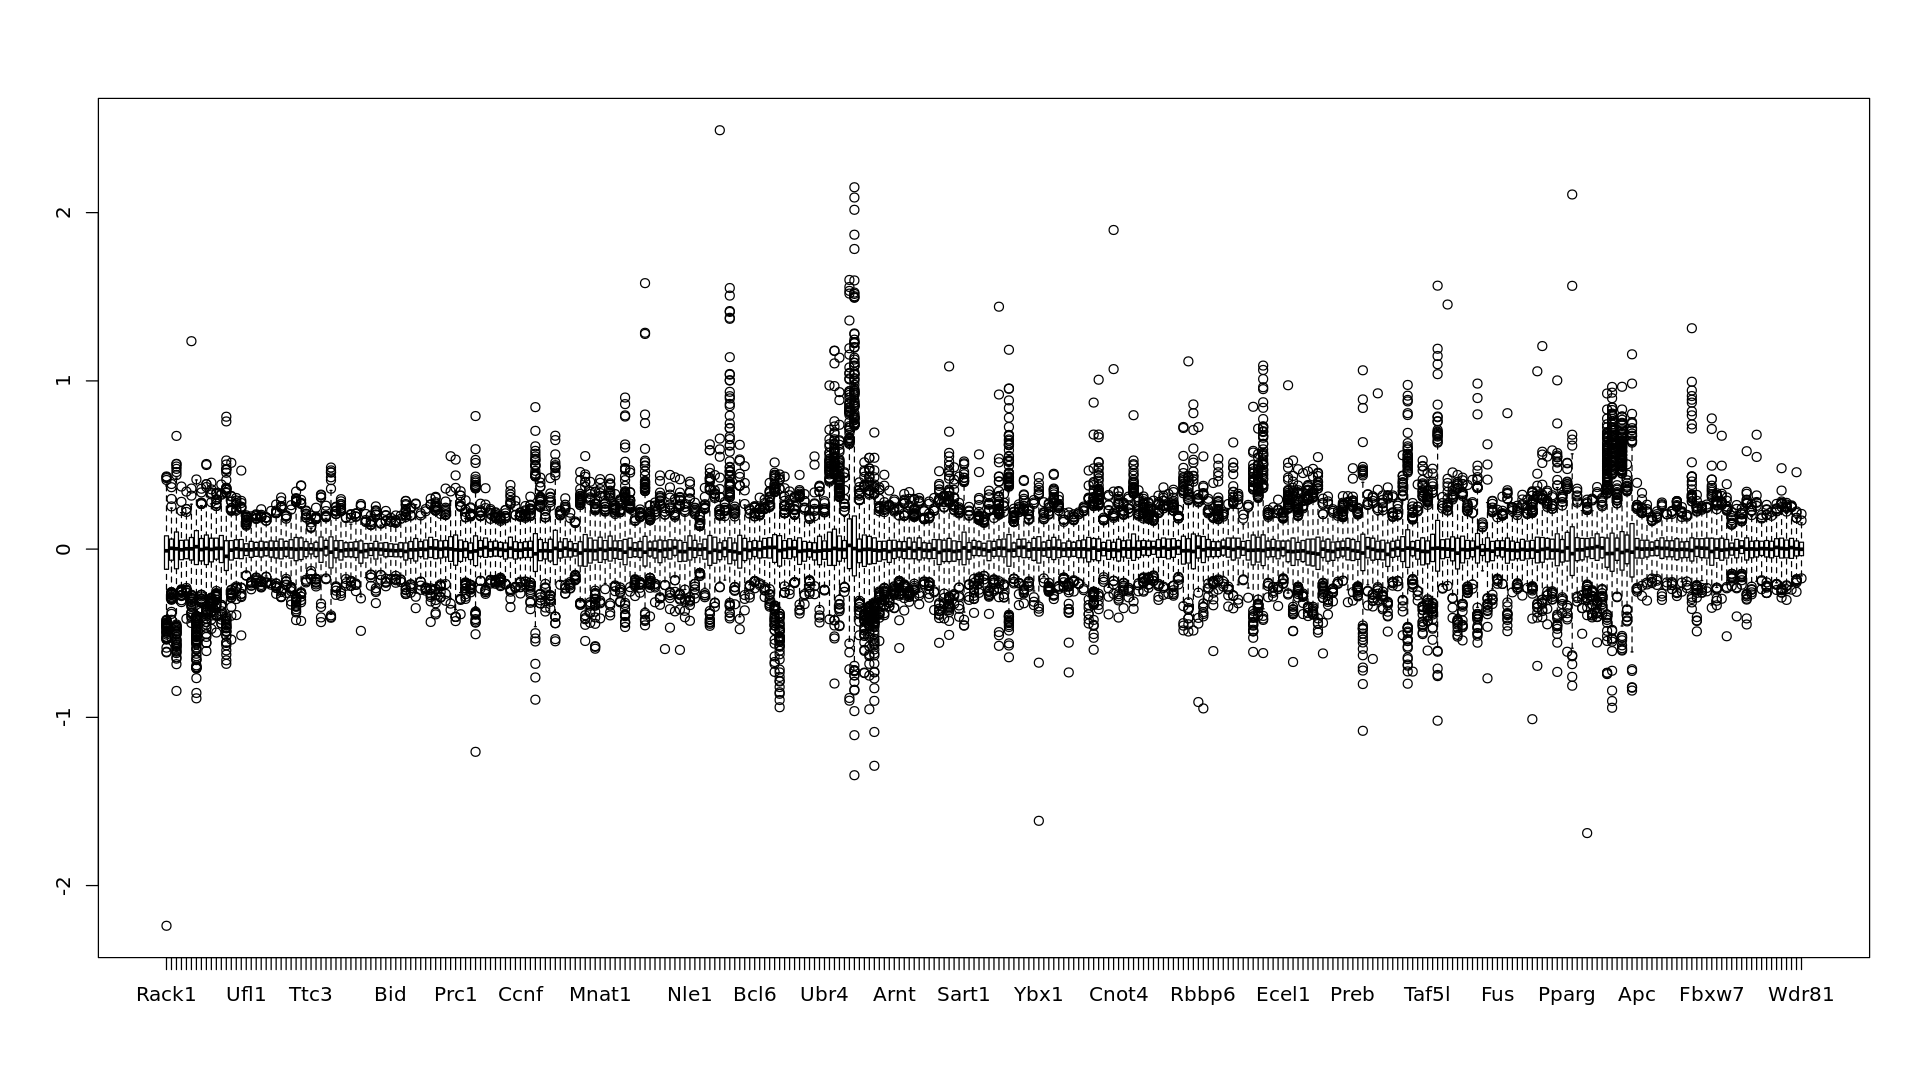

[1] "Genes in the pathway: "
[1] "############## FACTOR : 11 ##################"
[1] 38
[1] 56


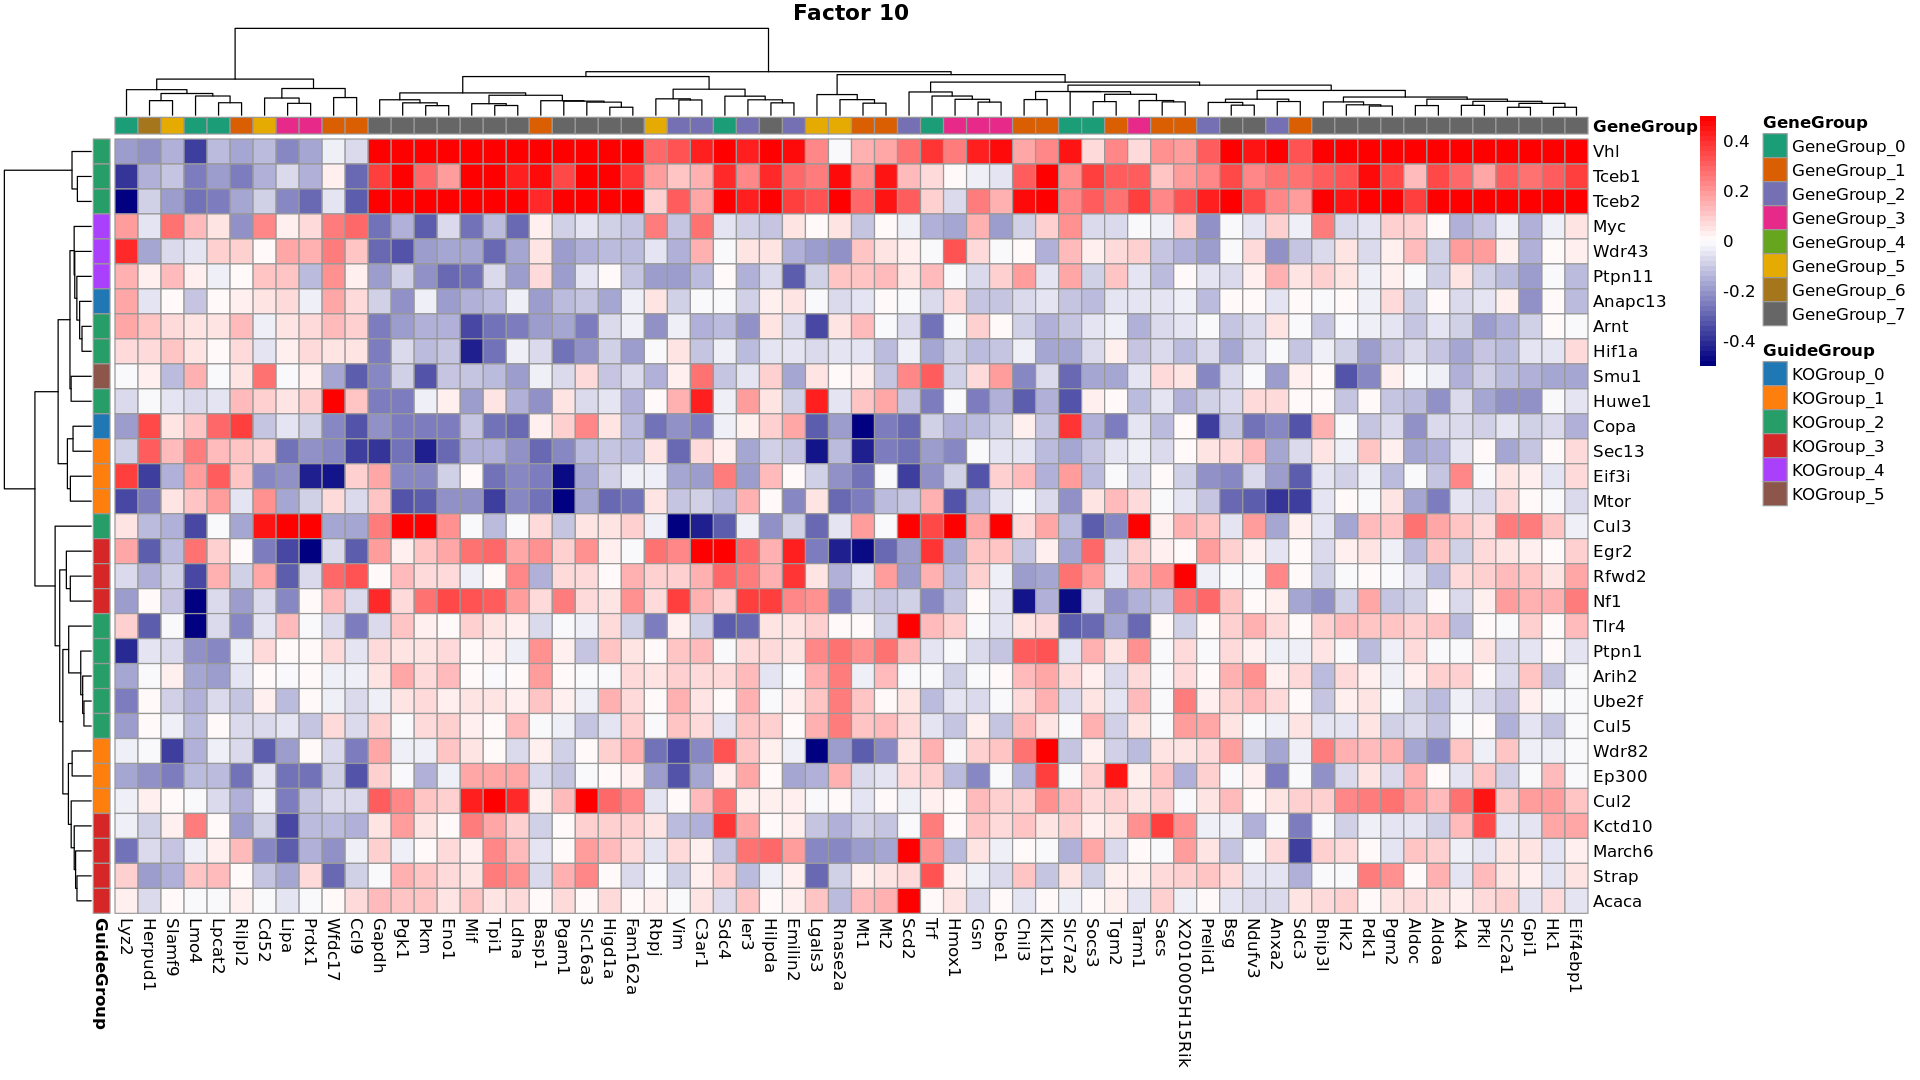

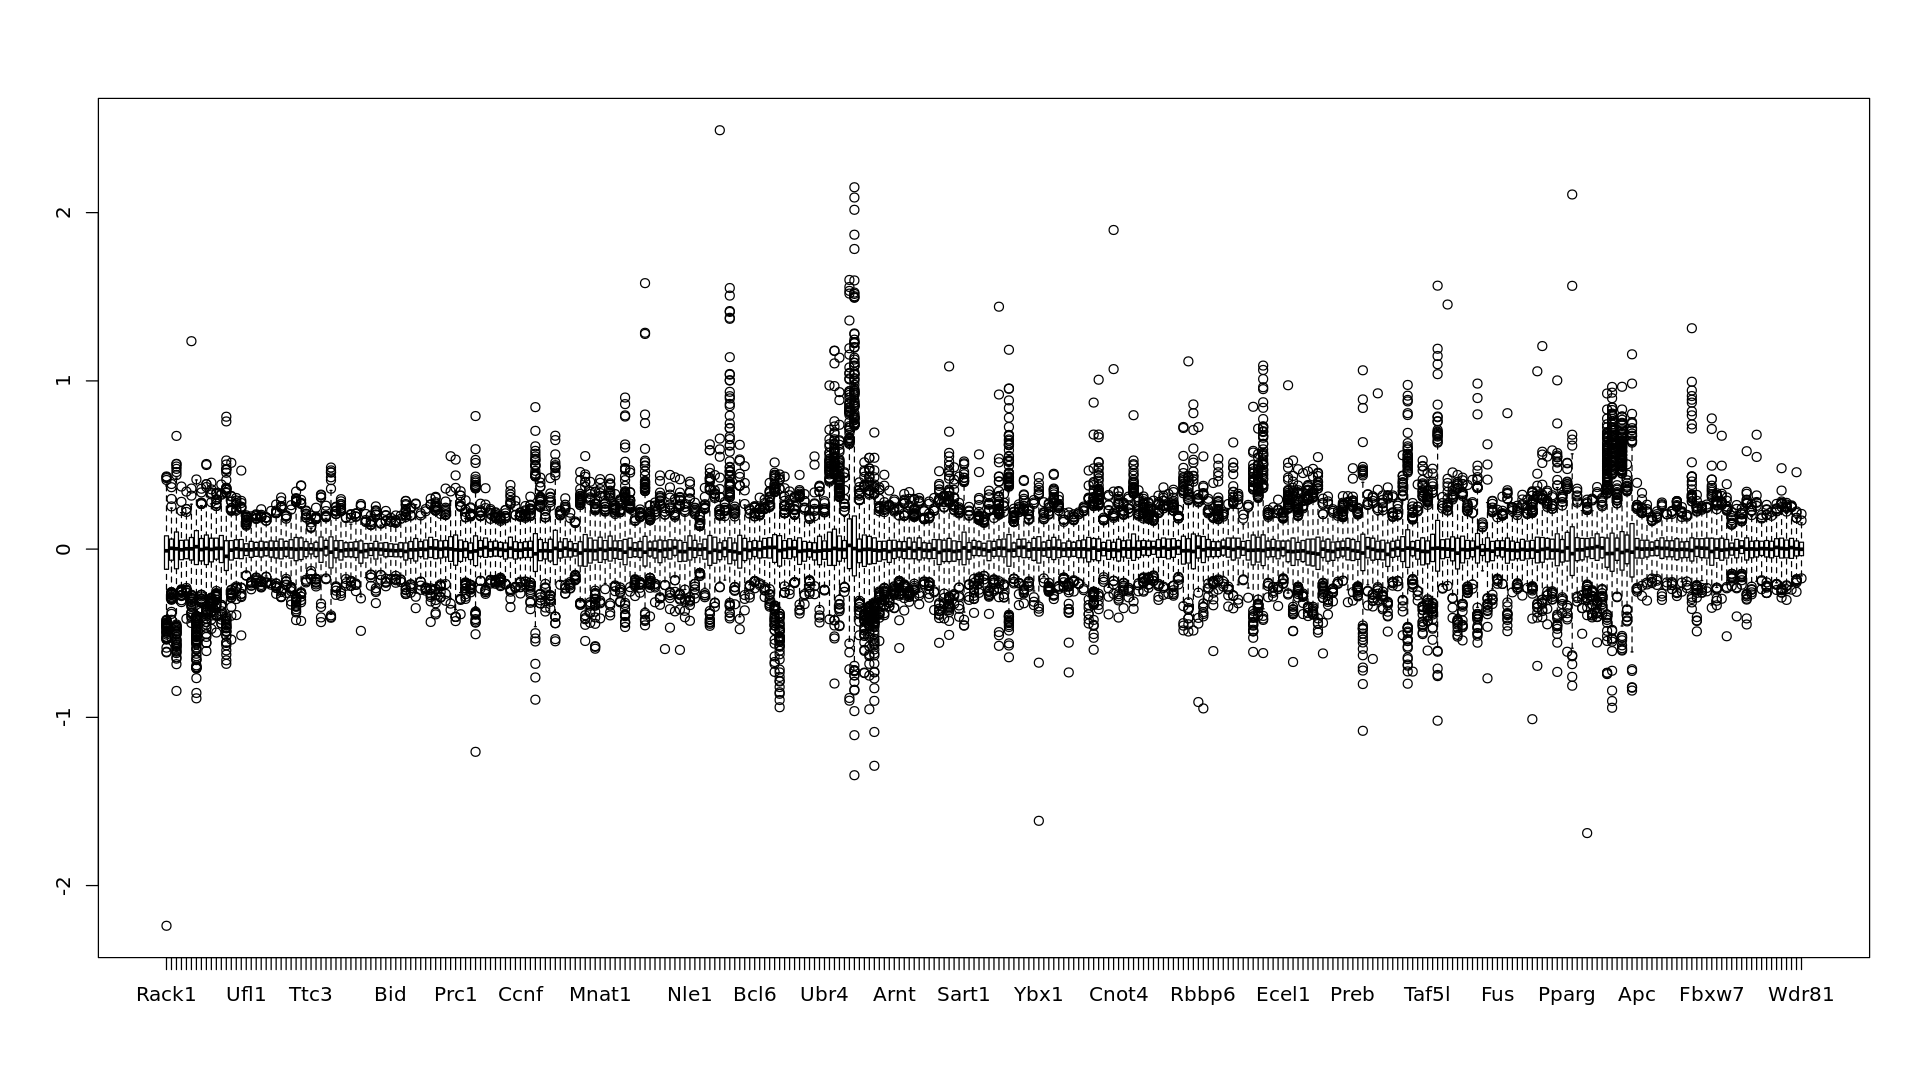

[1] "Genes in the pathway: "
[1] "############## FACTOR : 12 ##################"
[1] 23
[1] 40


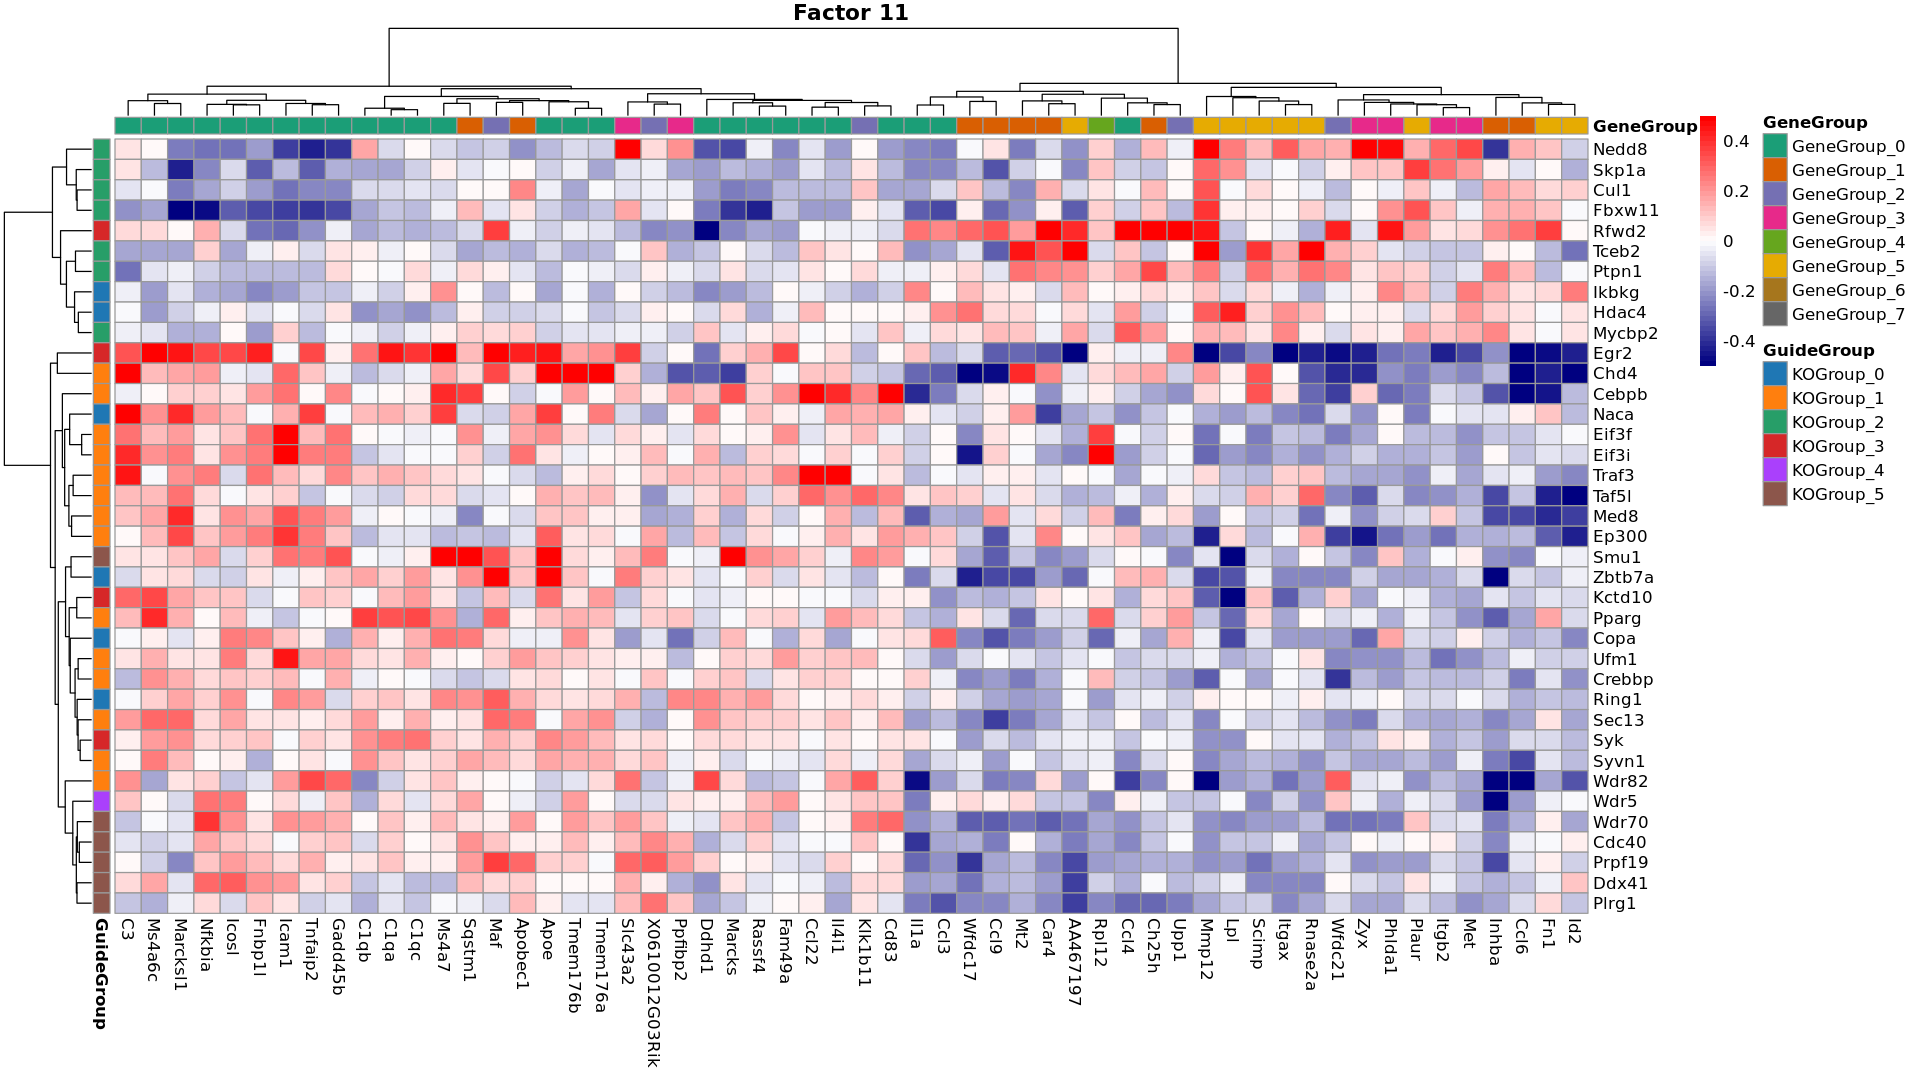

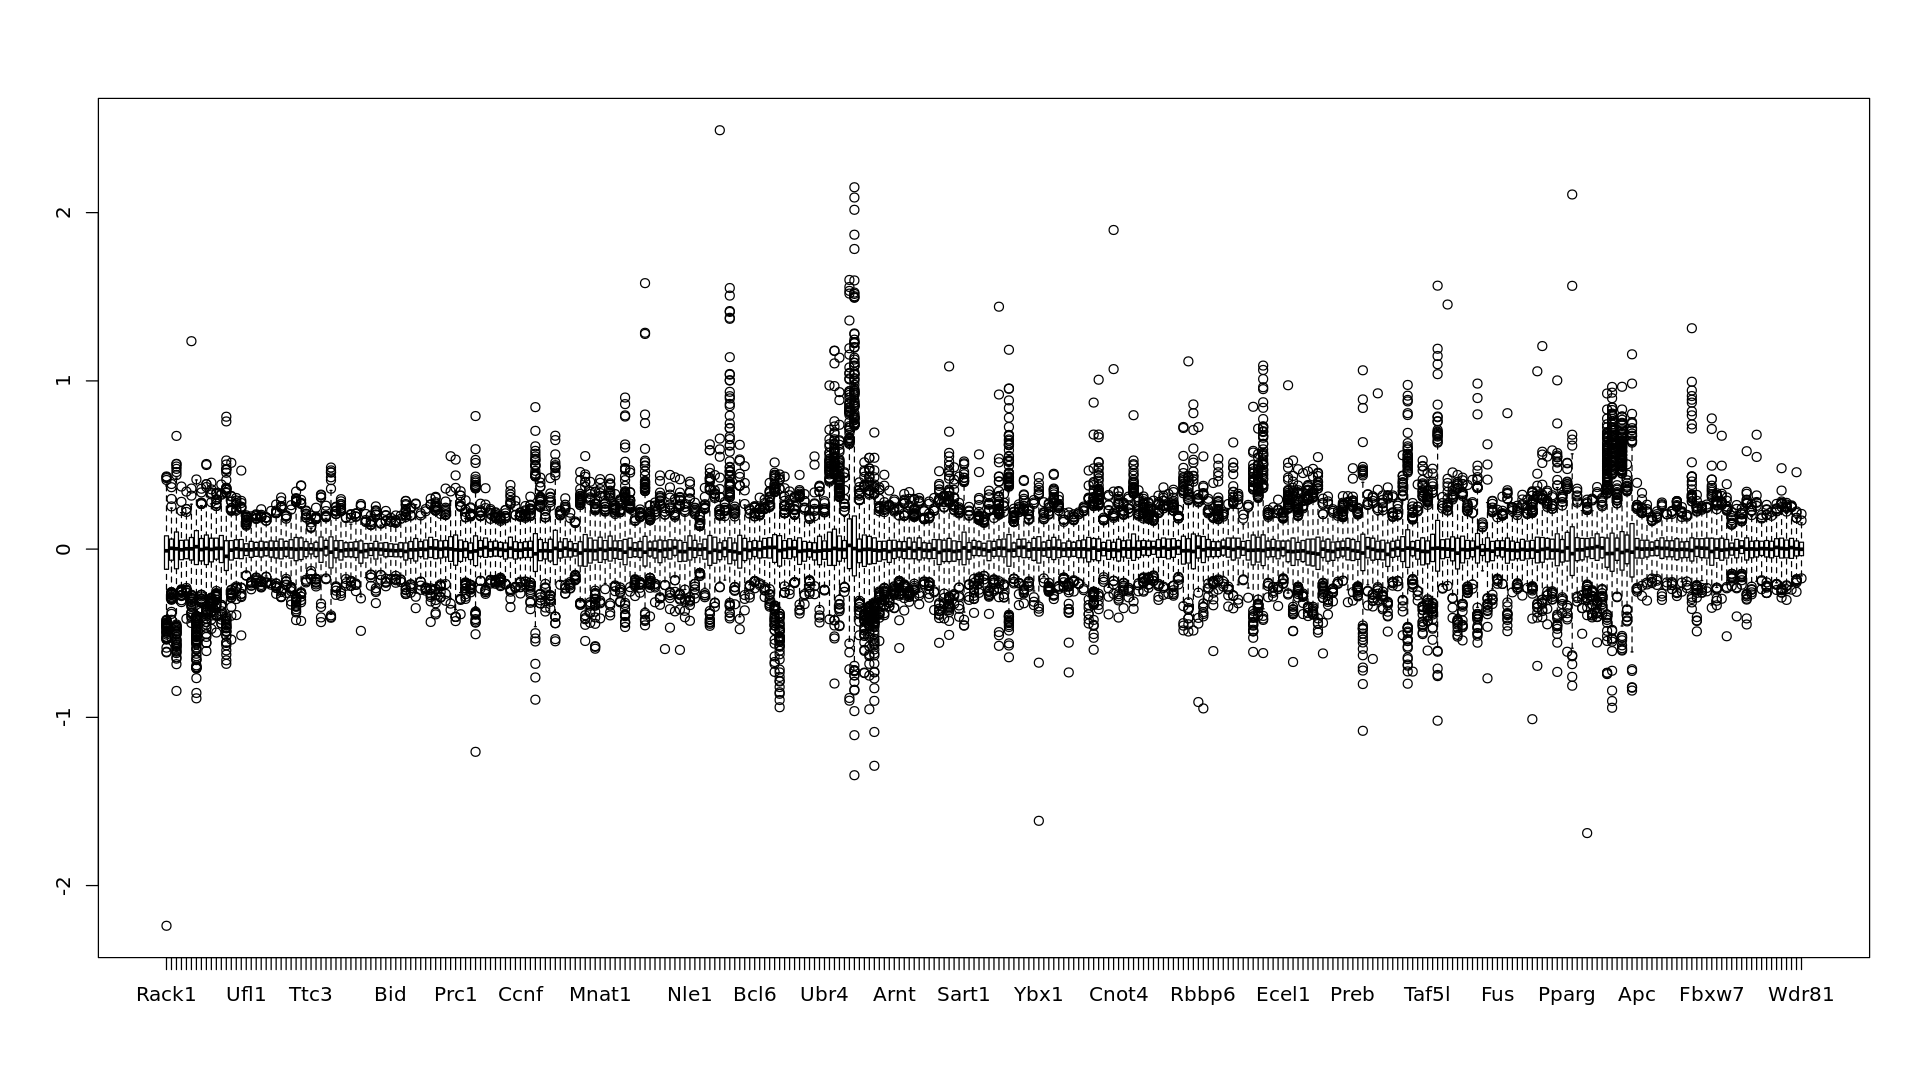

[1] "Genes in the pathway: "
[1] "############## FACTOR : 13 ##################"
[1] 38
[1] 59


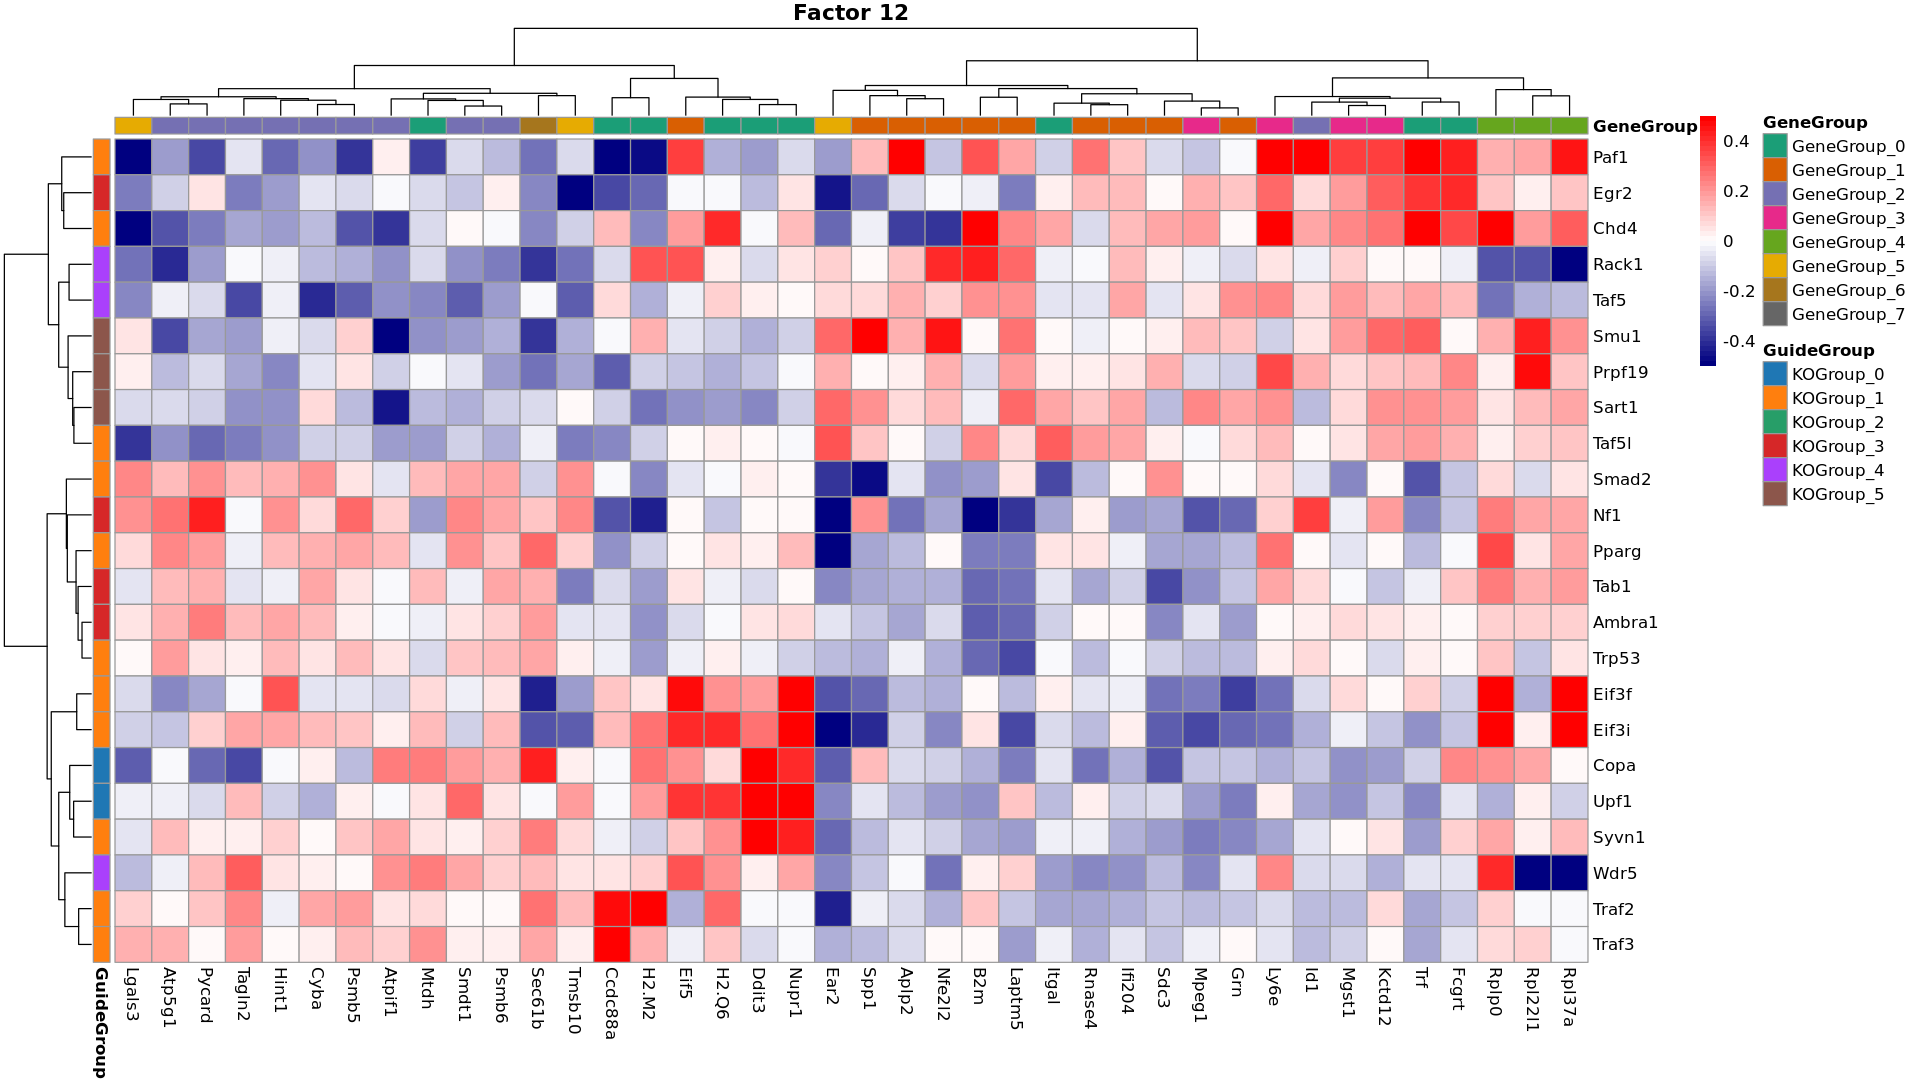

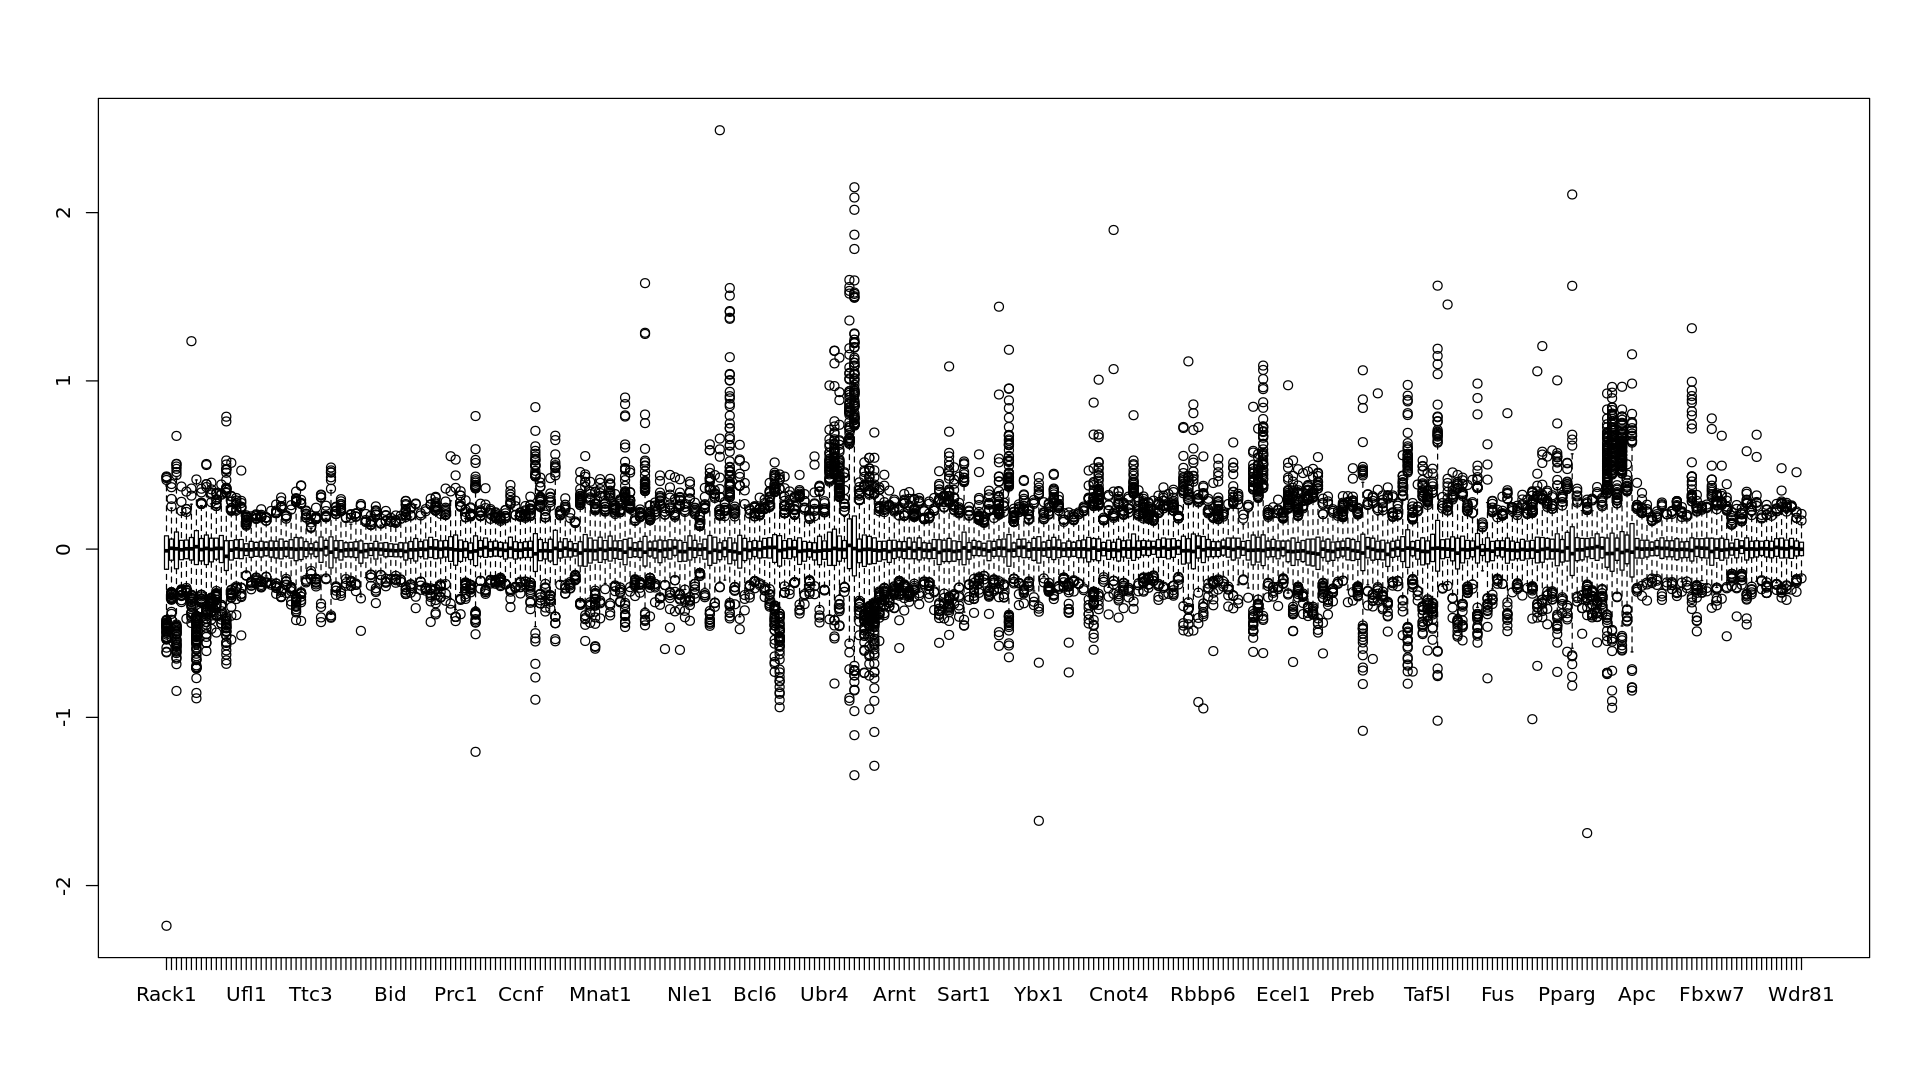

[1] "Genes in the pathway: "
[1] "############## FACTOR : 14 ##################"
[1] 34
[1] 60


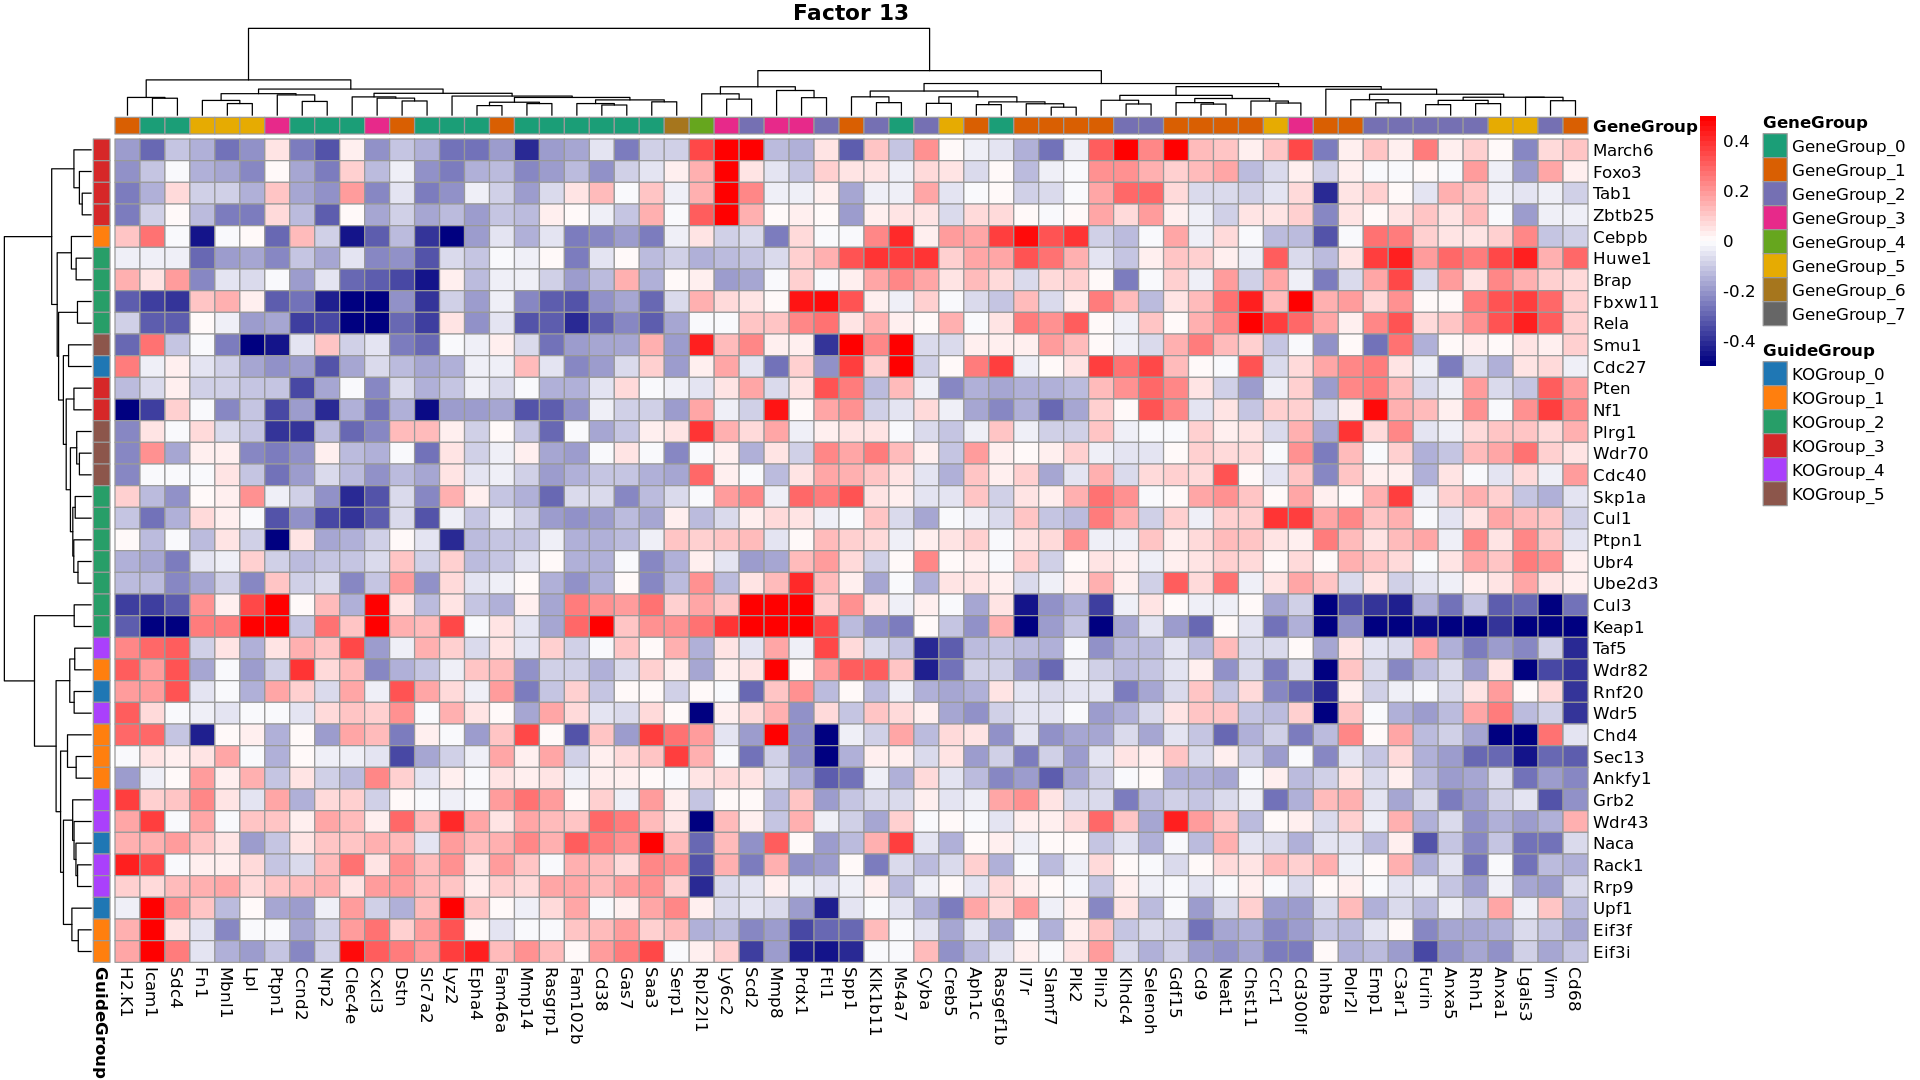

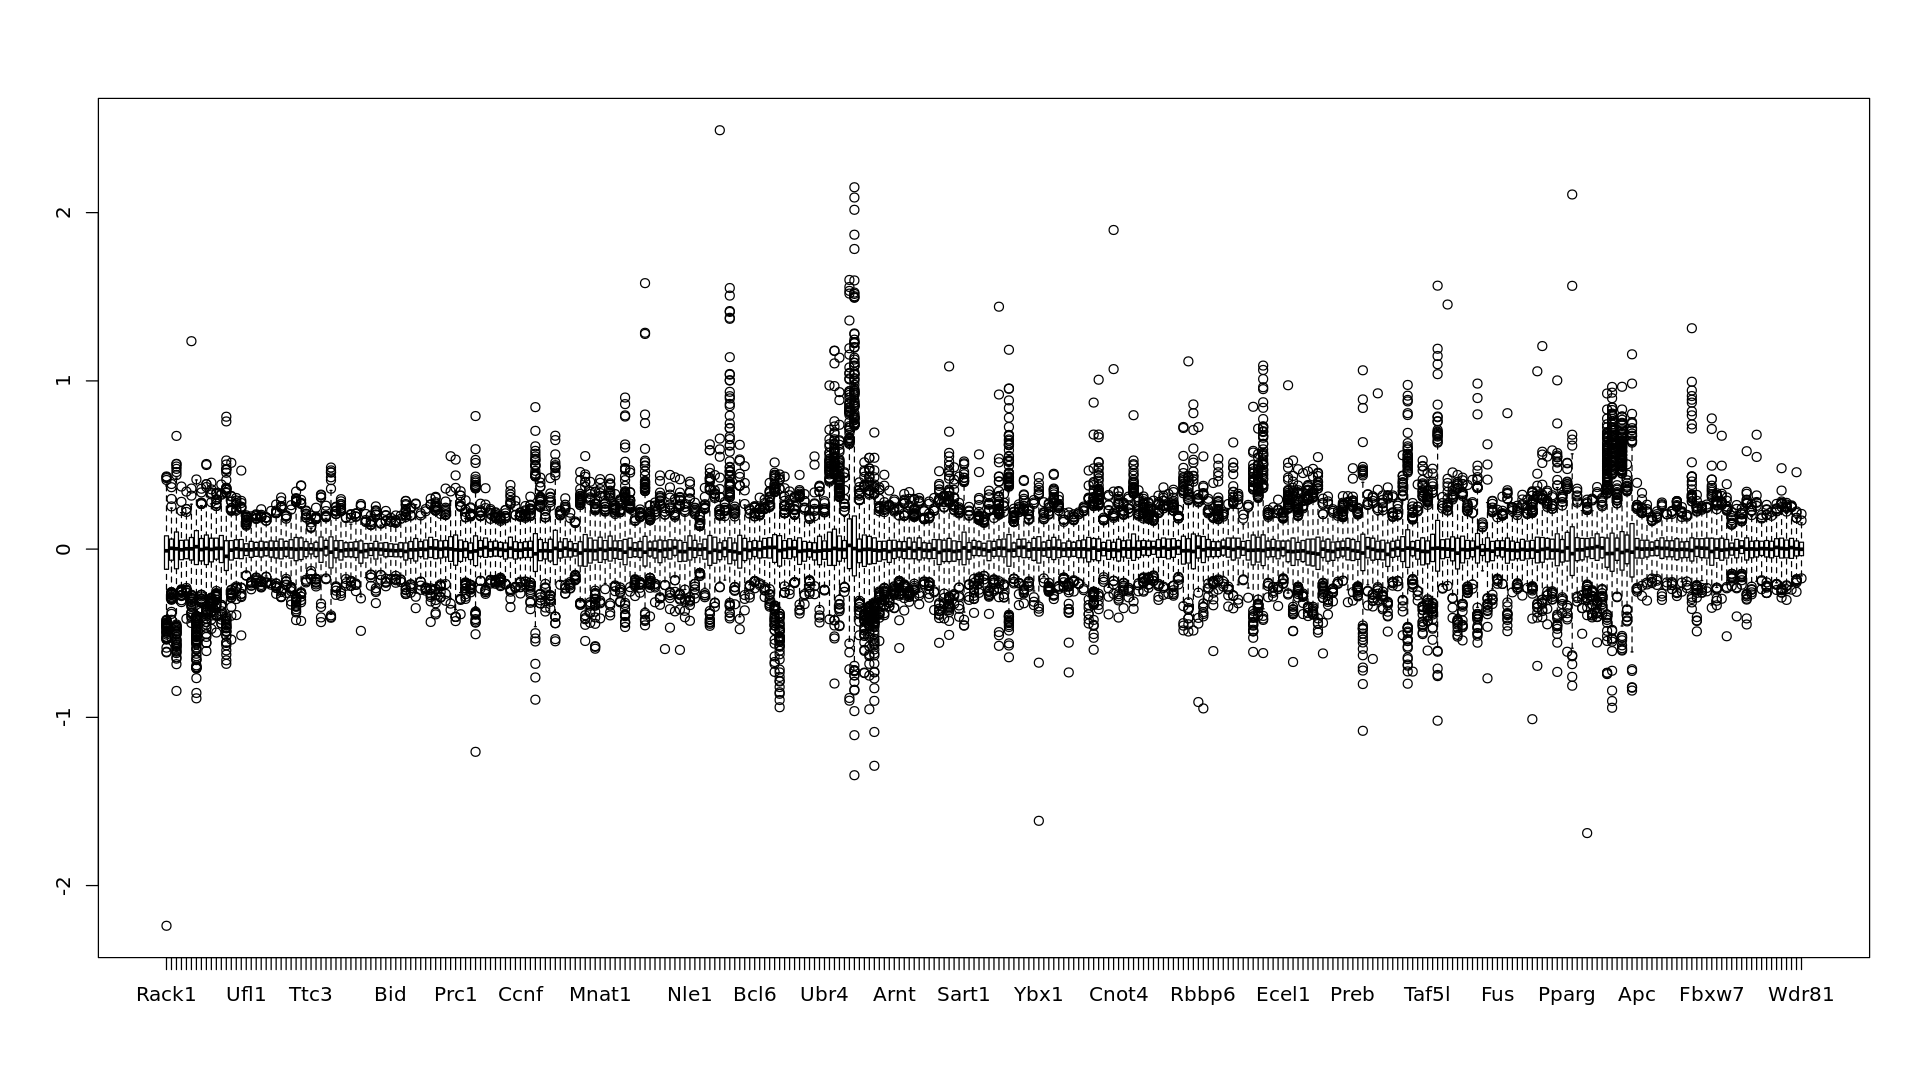

[1] "Genes in the pathway: "
[1] "############## FACTOR : 15 ##################"
[1] 47
[1] 50


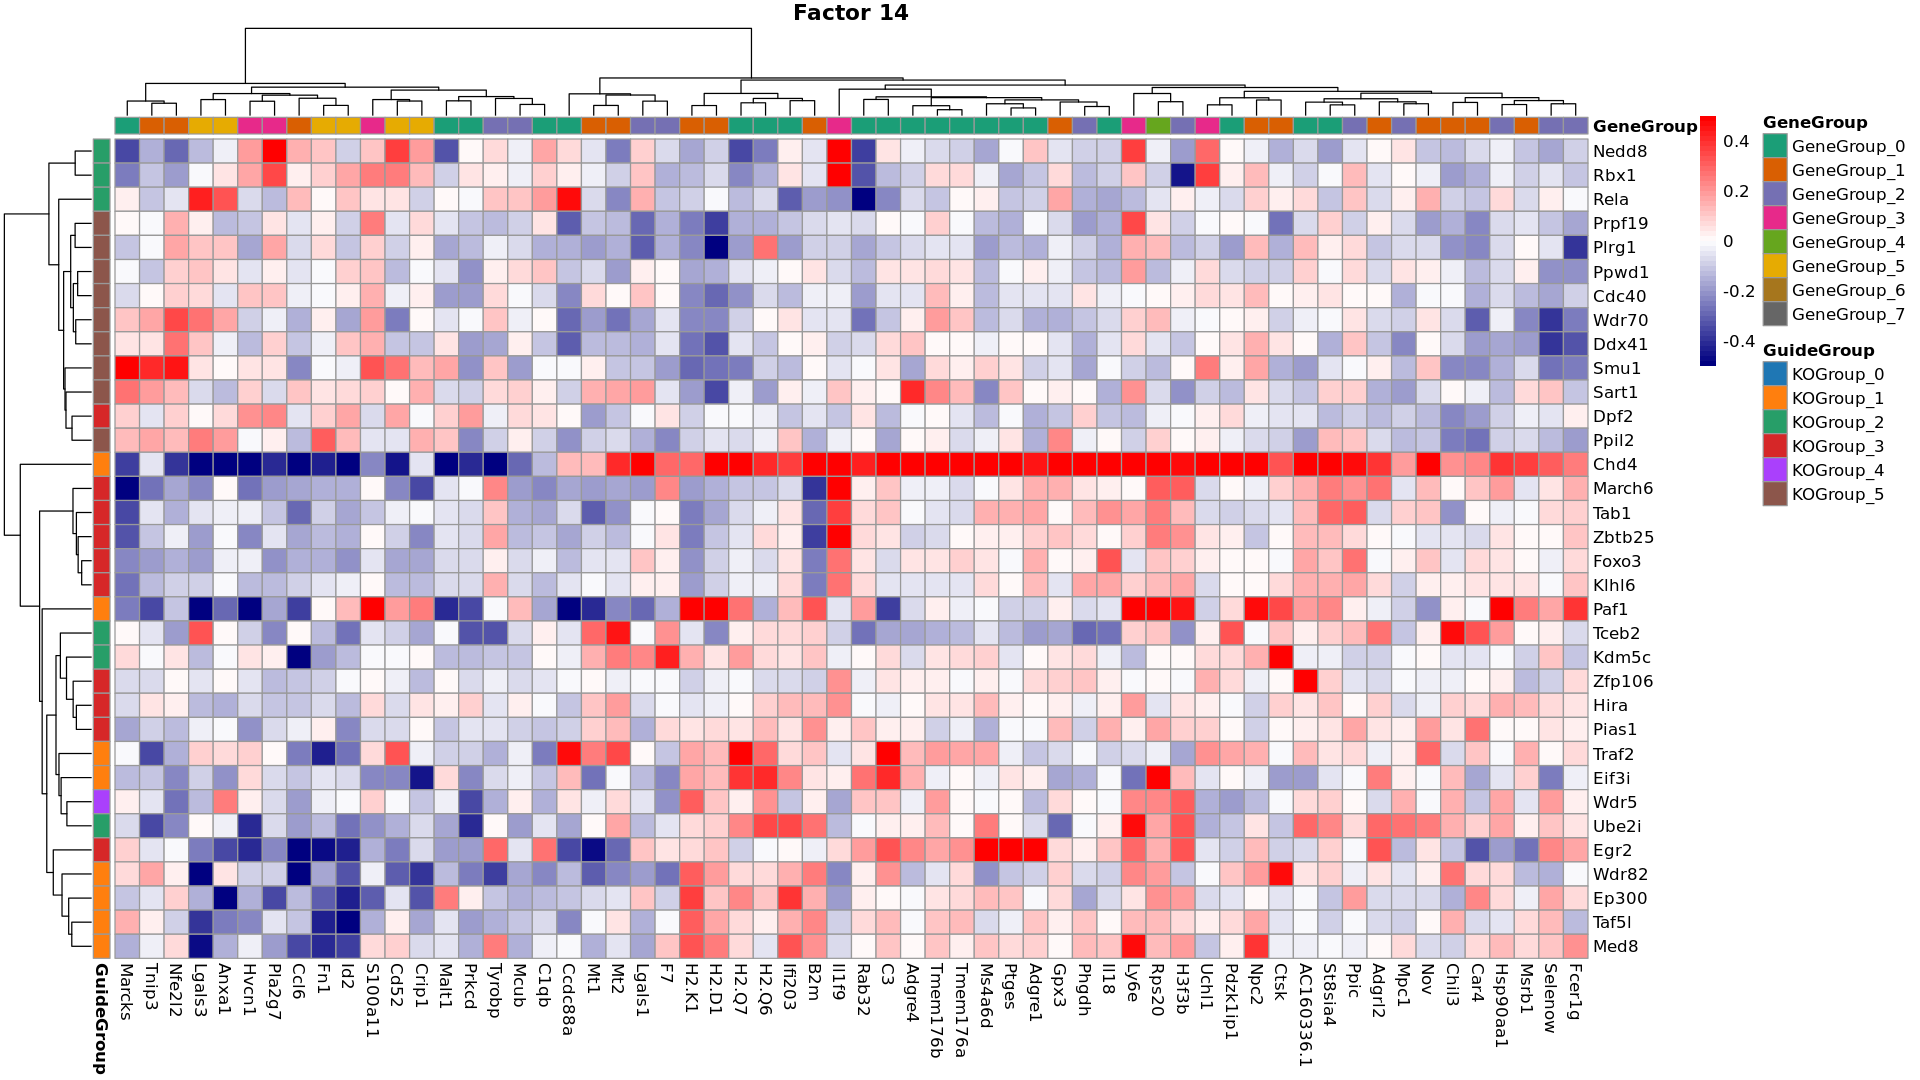

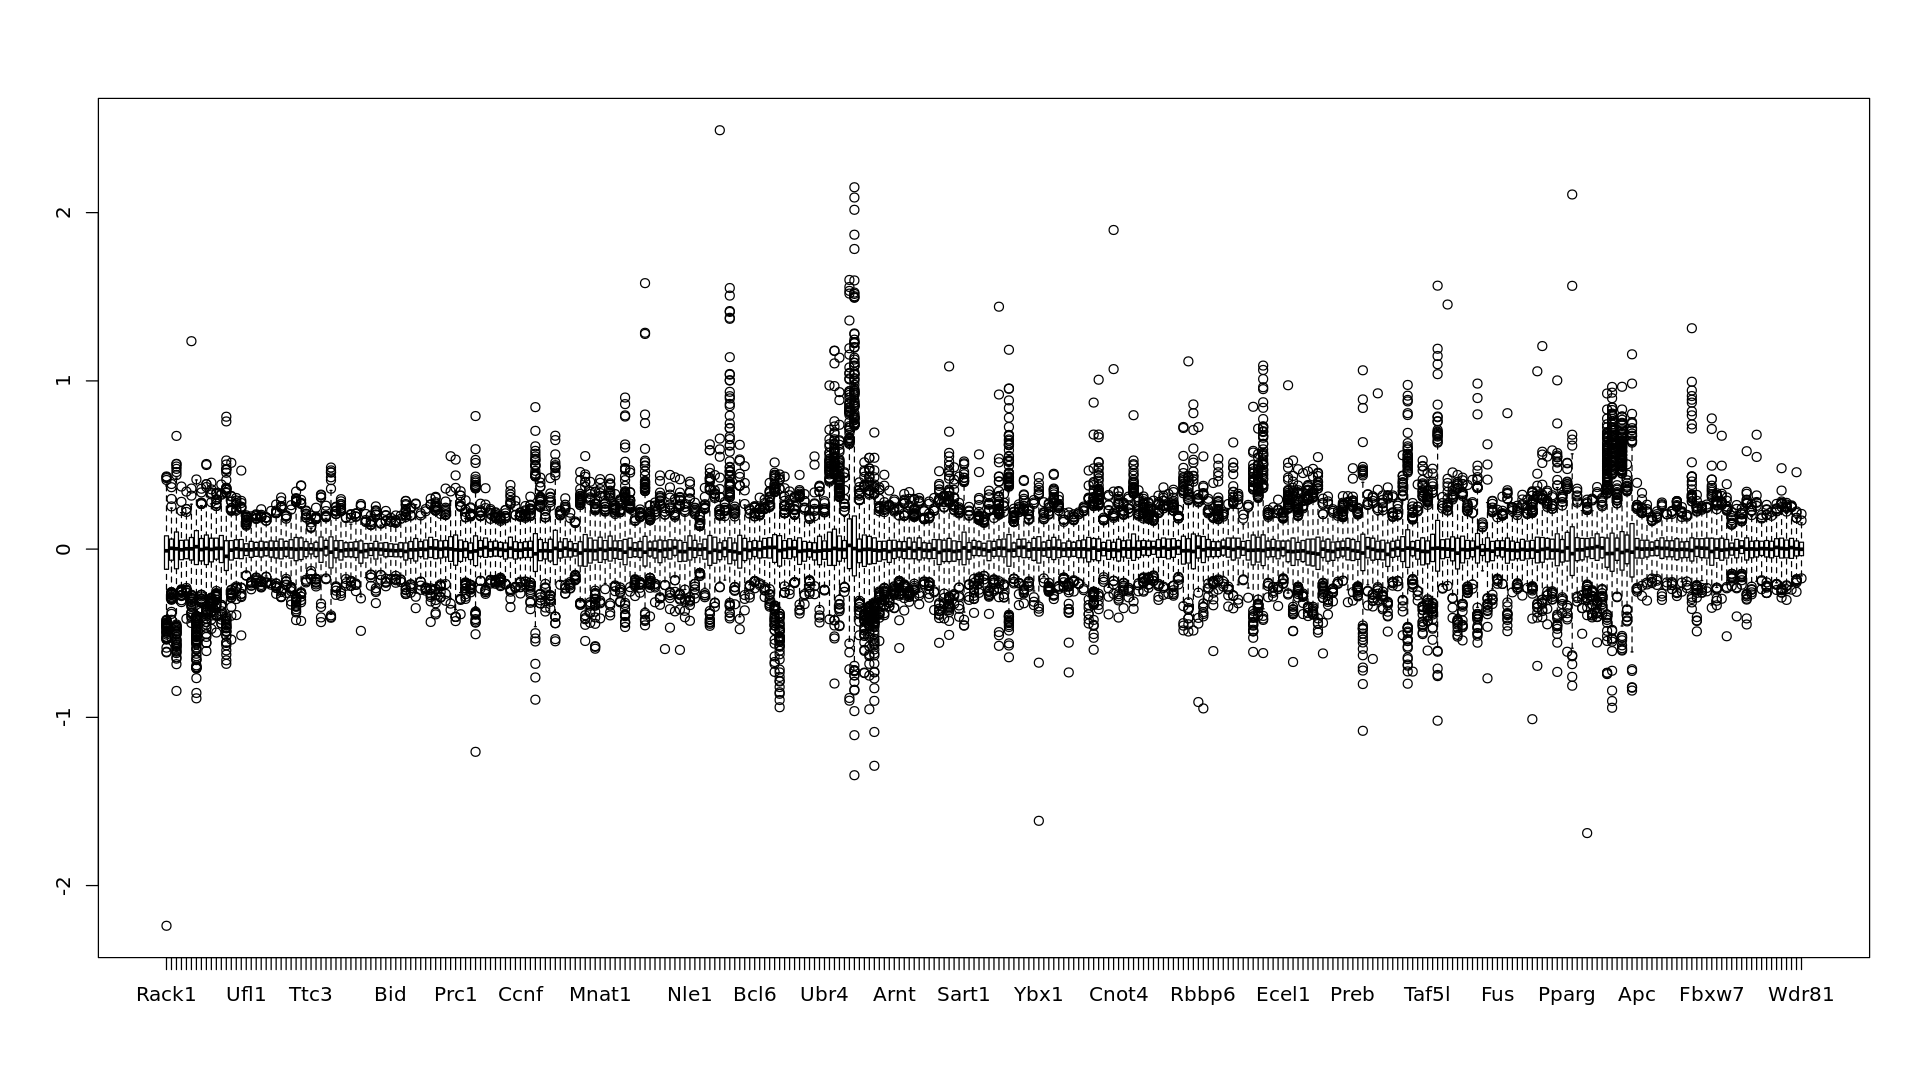

[1] "Genes in the pathway: "


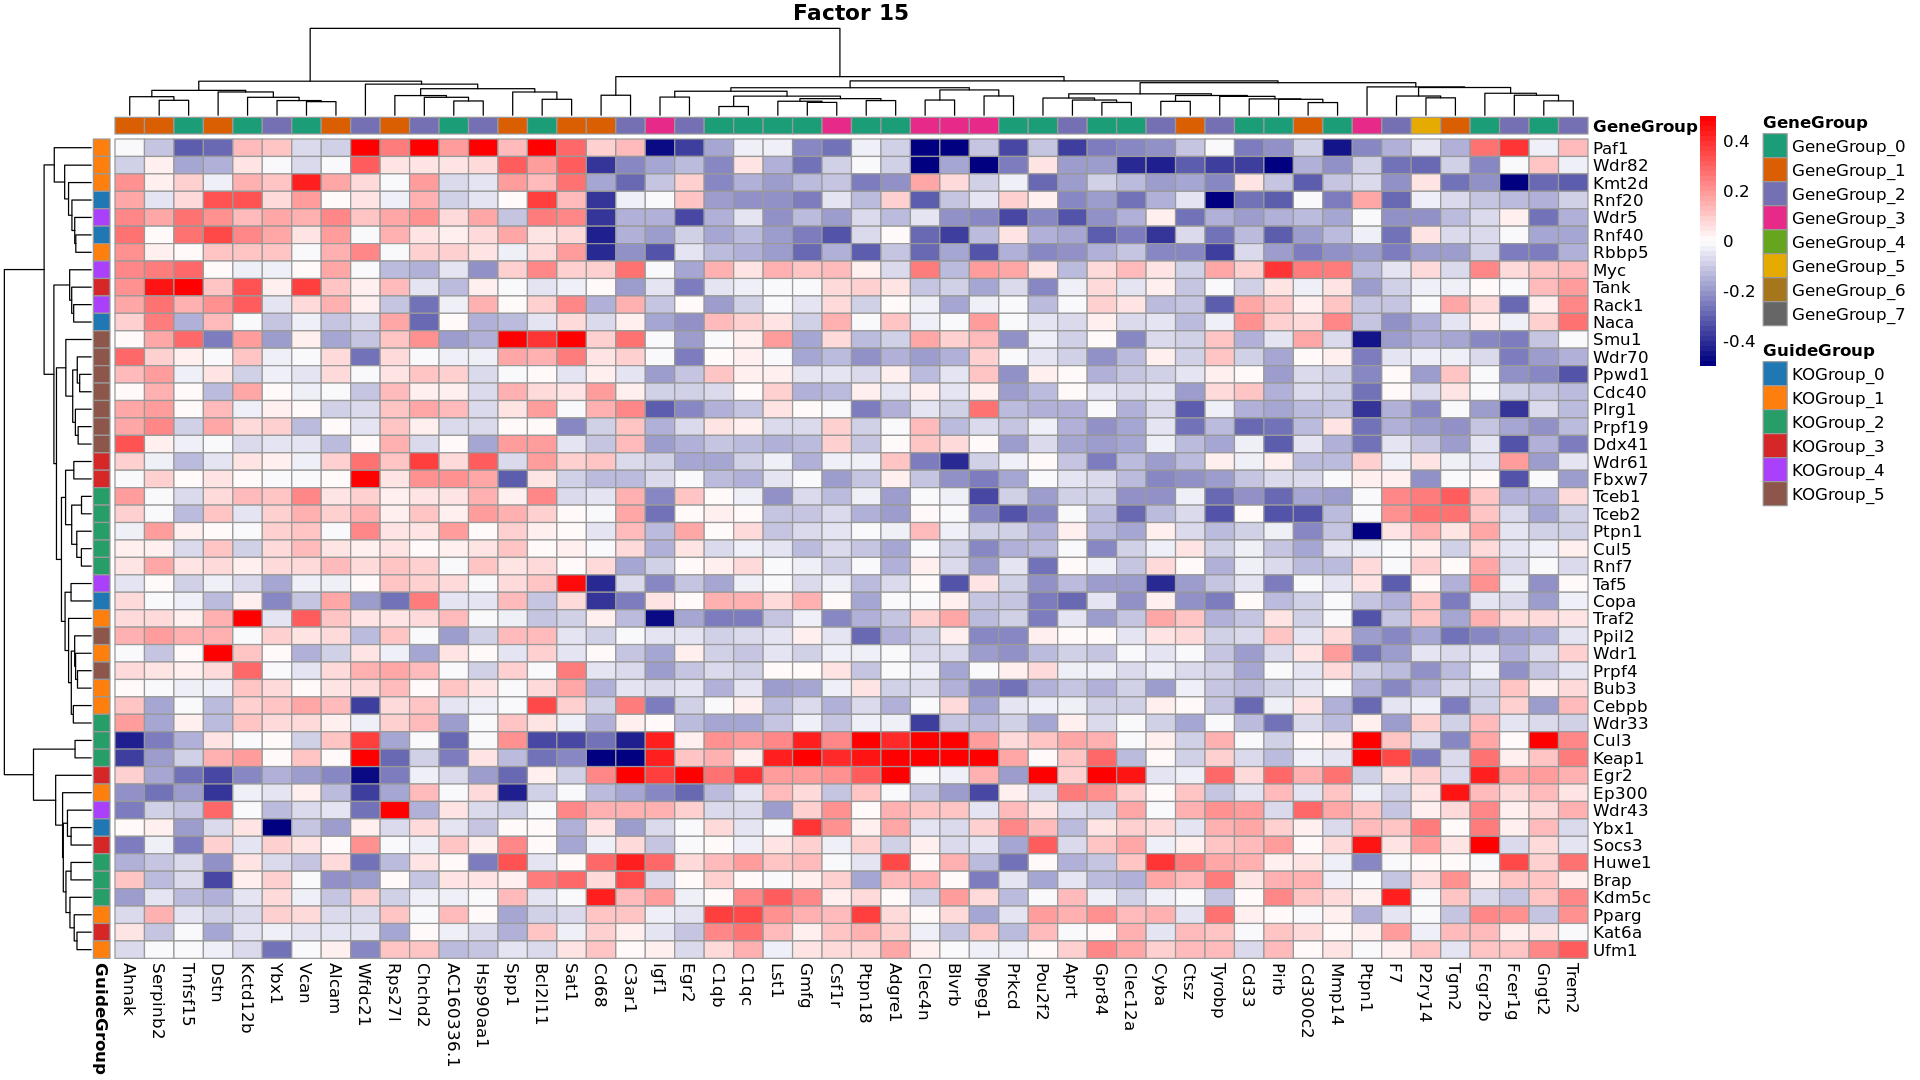

In [43]:
pathwayGenes <- list()
pathwayKOs <- list()
pathwayEffectedGenes <- list()
pathwayEffectedUpGenes <- list()
pathwayEffectedDownGenes <- list()
factorGeneGroups <- list()
geneKOOrder <- list()


for(elem in c(1:nFactors)){
  print(paste0("############## FACTOR : ",elem, " ##################"))
  
  factor0X <- myW[,elem]
  names(factor0X) <- rownames(myW)
  sKOGenes <- names(getOutliers(factor0X))
  print(length(sKOGenes))
    
  factor0Y <- myH[elem,]
  names(factor0Y) <- colnames(myH)
  sEffectGenes <- names(getOutliers2(factor0Y))
  print(length(sEffectGenes))
 
  boxplot(selCoefs)
  options(repr.plot.width=16, repr.plot.height=9)

  k <- plotFactorHeatmap(selCoefs, sKOGenes, sEffectGenes, elem)

  names(k) <- c(paste0("Factor ", elem, " gene group 1"), paste0("Factor ", elem, " gene group 2"),
                paste0("Factor ", elem, " guide group 1"),paste0("Factor ", elem, " guide group 2"),
                paste0("Factor ", elem, " gene order"), paste0("Factor ", elem, " guide order") )
  factorGeneGroups <- lappend(factorGeneGroups, k[1:4])
  geneKOOrder <- lappend(geneKOOrder, k[5:6])

  print("Genes in the pathway: ")
  pGenes = c(sEffectGenes, sKOGenes)

  pathwayGenes <- lappend(pathwayGenes, pGenes)
  pathwayKOs <- lappend(pathwayKOs, sKOGenes)
  pathwayEffectedGenes <- lappend(pathwayEffectedGenes, sEffectGenes)
  
  #getDAVIDGOTerms (pGenes, ensemblBackground, fNamePrefix=paste0("NMF_",inT, "_", elem), titleStr=paste0("Factor ",elem,))

}


In [ ]:
length(unique(unlist(pathwayKOs)))

In [ ]:
sort(unique(unlist(pathwayKOs)))

In [ ]:

length(unique(unlist(pathwayEffectedGenes)))

In [ ]:
saveRDS(geneKOOrder, paste0("/home/beraslan/jovian-work/analysisSingle/R/factorGeneGroups.rds"))

In [ ]:
KOFactorMatrix = data.frame(matrix(0, ncol = length(unique(unlist(pathwayKOs))), nrow= nFactors))
rownames(KOFactorMatrix) <- paste0("Factor ", 1:nrow(KOFactorMatrix))
colnames(KOFactorMatrix) <- sort(unique(unlist(pathwayKOs)))

In [ ]:
for(i in 1:length(pathwayKOs)){
    facKOGenes = pathwayKOs[[i]]
    KOFactorMatrix[i,facKOGenes] = 1
}

In [ ]:
head(KOFactorMatrix)

In [ ]:
options(repr.plot.width=26, repr.plot.height=6)

pheatmap(KOFactorMatrix, color = c("white","blue"), cluster_rows = F, main = "KO genes per factor")

In [ ]:
EGenesFactorMatrix = data.frame(matrix(0, ncol = length(unique(unlist(pathwayEffectedGenes))), nrow= nFactors))
rownames(EGenesFactorMatrix) <- paste0("Factor ", 1:nrow(EGenesFactorMatrix))
colnames(EGenesFactorMatrix) <- sort(unique(unlist(pathwayEffectedGenes)))

In [ ]:
for(i in 1:length(pathwayEffectedGenes)){
    facEffectedGenes = pathwayEffectedGenes[[i]]
    EGenesFactorMatrix[i,facEffectedGenes] = 1
}

In [ ]:
options(repr.plot.width=26, repr.plot.height=6)

pheatmap(EGenesFactorMatrix, color = c("white","red"), cluster_rows = F, main = "Effected genes per factor")

In [ ]:
names(pathwayGenes) <- paste0("Factor_",1:nFactors)
names(pathwayTargets) <- paste0("Factor_",1:nFactors)
names(pathwayEffectedGenes) <-  paste0("Factor_",1:nFactors)


In [ ]:
factorGeneGroups <- unlist(factorGeneGroups, recursive = F)
lLen <- unlist(lapply(factorGeneGroups, length))
factorGeneGroups <- factorGeneGroups[lLen!=0]

In [ ]:
writePathwayFile(pathwayGenes=factorGeneGroups,
                 fileName="/home/beraslan/jovian-work/analysisSingle/ICA_15_factors_effectedGenes.csv",
                 cNames= names(factorGeneGroups))

In [ ]:
length(factorGeneGroups)